# Домашнее задание №1
Клиентская аналитика на данных по заявкам на кредит в банке

## Часть 1. Исследование и обработка данных

Для начала импортируем необходимые библиотеки

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy import stats
from IPython.display import display 

Выводим все колонки и строки таблицы

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

Не показываем предупреждения

In [3]:
import warnings
warnings.filterwarnings('ignore')

Загружаем csv-файлы с правильной кодировкой

In [4]:
folder = '/Users/user/Library/Mobile Documents/com~apple~CloudDocs/HSE/2 курс/1 семестр/Методы и средства обработки больших данных/ДЗ №1'

df = pd.read_csv(folder + '/Вариант 10.csv', sep=';', encoding='utf-8-sig', on_bad_lines='skip')
df_info = pd.read_csv(folder + '/Описание параметров.csv', sep=';', encoding='cp1251')


Загрузили два файла:
- df - исходный датасет с данными по клиентам
- df_info - справочная информация по переменным в датасете

In [5]:
df.head(5)

Номер варианта       ID              INCOME_BASE_TYPE      CREDIT_PURPOSE  \
0              10  1000010                         2НДФЛ  Покупка автомобиля   
1              10  1000030  Поступление зарплаты на счет  Покупка автомобиля   
2              10  1000050                         2НДФЛ              Ремонт   
3              10  1000070                         2НДФЛ       Покупка земли   
4              10  1000090                         2НДФЛ              Ремонт   

   INSURANCE_FLAG   DTI      SEX  FULL_AGE_CHILD_NUMBER  DEPENDANT_NUMBER  \
0               1  0.39  мужской                      0                 0   
1               1  0.39  женский                      1                 0   
2               1  0.31  женский                      0                 0   
3               1   NaN  женский                      1                 0   
4               0  0.47  женский                      0                 0   

                             EDUCATION               EMPL_TYPE EMPL_SIZE  \
0                  среднее-специальное                 рабочий      < 50   
1  Высшее/Второе высшее/Ученая степень              специалист      >250   
2                 незаконченное высшее              специалист      < 50   
3                        второе высшее                  другое       NaN   
4                               высшее  торговый представитель      >250   

   BANKACCOUNT_FLAG  Period_at_work   age  EMPL_PROPERTY   EMPL_FORM  \
0               0.0           161.0  55.0  Строительство         NaN   
1               0.0             6.0  29.0         Другое         ООО   
2               3.0            18.0  24.0         Другое  Иная форма   
3               1.0            74.0  39.0        Финансы         NaN   
4               0.0            10.0  38.0          Наука         NaN   

     FAMILY_STATUS  max90days  max60days  max30days  max21days  max14days  \
0              NaN        NaN        NaN        NaN        NaN        NaN   
1  женат / замужем        1.0        1.0        1.0        1.0        1.0   
2   повторный брак        6.0        5.0        5.0        5.0        5.0   
3              NaN        NaN        NaN        NaN        NaN        NaN   
4              NaN        NaN        NaN        NaN        NaN        NaN   

   avg_num_delay  if_zalog  num_AccountActive180  num_AccountActive90  \
0            NaN       NaN                   NaN                  NaN   
1            NaN       NaN                   NaN                  NaN   
2            0.0       0.0                   1.0                  0.0   
3            NaN       NaN                   NaN                  NaN   
4            NaN       NaN                   NaN                  NaN   

   num_AccountActive60  Active_to_All_prc  numAccountActiveAll  \
0                  NaN                NaN                  NaN   
1                  NaN                NaN                  NaN   
2                  0.0                1.0                  1.0   
3                  NaN                NaN                  NaN   
4                  NaN                NaN                  NaN   

   numAccountClosed  sum_of_paym_months  all_credits  Active_not_cc  \
0               NaN                 NaN          NaN            NaN   
1               NaN                 NaN          NaN            NaN   
2               0.0                 3.0          1.0            1.0   
3               NaN                 NaN          NaN            NaN   
4               NaN                 NaN          NaN            NaN   

   own_closed  min_MnthAfterLoan  max_MnthAfterLoan  dlq_exist  \
0         NaN                NaN                NaN        NaN   
1         NaN                NaN                NaN        NaN   
2         0.0                3.0                3.0        0.0   
3         NaN                NaN                NaN        NaN   
4         NaN                NaN                NaN        NaN   

   thirty_in_a_year  sixty_in_a_year  ninety_i

In [6]:
df_info.head(5)

Атрибуты                                    Описание  \
0    Номер варианта                              Номер варианта   
1                ID                       Идентификатор клиента   
2  INCOME_BASE_TYPE                        Подтверждение дохода   
3    CREDIT_PURPOSE                      Цель получения кредита   
4    INSURANCE_FLAG  Страхование заемщика при получении кредита   

                                  Description  
0                              Variant number  
1                                   Client ID  
2                         Income verification  
3                         Purpose of the loan  
4  Borrower's insurance when receiving a loan

### Предварительный анализ датасета
Всего в исходной таблице 10243 строки и 44 столбца

In [7]:
df.shape

(10243, 44)

Выведем названия всех 44 переменных таблицы. Отметим, что в таблице есть колонка 'Номер варианта', которая не содержат информации, напрямую относящейся к клиентам банка. 

In [8]:
cols = df.columns
for i in range(len(cols)):
  print(cols[i])

Номер варианта
ID
INCOME_BASE_TYPE
CREDIT_PURPOSE
INSURANCE_FLAG
DTI
SEX
FULL_AGE_CHILD_NUMBER
DEPENDANT_NUMBER
EDUCATION
EMPL_TYPE
EMPL_SIZE
BANKACCOUNT_FLAG
Period_at_work
age
EMPL_PROPERTY
EMPL_FORM
FAMILY_STATUS
max90days
max60days
max30days
max21days
max14days
avg_num_delay
if_zalog
num_AccountActive180
num_AccountActive90
num_AccountActive60
Active_to_All_prc
numAccountActiveAll
numAccountClosed
sum_of_paym_months
all_credits
Active_not_cc
own_closed
min_MnthAfterLoan
max_MnthAfterLoan
dlq_exist
thirty_in_a_year
sixty_in_a_year
ninety_in_a_year
thirty_vintage
sixty_vintage
ninety_vintage


Для удобства анализа разделим переменные на группы:
- **Социально-демографические характеристики**

Переменные: age, SEX, EDUCATION, FAMILY_STATUS, FULL_AGE_CHILD_NUMBER, DEPENDANT_NUMBER.

- **Занятость и доход**

Переменные: EMPL_TYPE, EMPL_SIZE, EMPL_PROPERTY, EMPL_FORM, Period_at_work.

- **Банковская активность**

Переменные: BANKACCOUNT_FLAG, num_AccountActive180, num_AccountActive90, num_AccountActive60, numAccountActiveAll, numAccountClosed, Active_to_All_prc.

- **Кредитная активность**

Переменные: DTI, INCOME_BASE_TYPE, CREDIT_PURPOSE, INSURANCE_FLAG, max90days, max60days, max30days, max21days, max14days, avg_num_delay, if_zalog, sum_of_paym_months, all_credits, Active_not_cc, own_closed, min_MnthAfterLoan, max_MnthAfterLoan, dlq_exist, thirty_in_a_year, sixty_in_a_year, ninety_in_a_year, thirty_vintage, sixty_vintage, ninety_vintage.

Выведем основную статистику по уникальным, нулевым и пустым значениям.

In [9]:
def column_values(df):
    nunique_val = df.nunique()
    zeros_count = (df == 0).sum(axis=0)
    nans_count = df.isna().sum()
    
    total = len(df)
    zeros_pct = round((zeros_count / total) * 100, 1)
    nans_pct = round((nans_count / total) * 100, 1)

    row = [nunique_val, 
           zeros_count, 
           zeros_pct,
           nans_count, 
           nans_pct,
           df.dtypes]
    return row

data = []
for column in df:
    data.append([column] + column_values(df[column]))
    
print(tabulate(data, 
               headers=['Column', 'Unique', 'Zeros', '%Zeros', 'NaNs', '%NaNs', 'Type'], 
               tablefmt='orgtbl'))

| Column                |   Unique |   Zeros |   %Zeros |   NaNs |   %NaNs | Type    |
|-----------------------+----------+---------+----------+--------+---------+---------|
| Номер варианта        |        1 |       0 |      0   |      0 |     0   | int64   |
| ID                    |    10243 |       0 |      0   |      0 |     0   | int64   |
| INCOME_BASE_TYPE      |        4 |       0 |      0   |     80 |     0.8 | object  |
| CREDIT_PURPOSE        |       10 |       0 |      0   |      0 |     0   | object  |
| INSURANCE_FLAG        |        2 |    3980 |     38.9 |      0 |     0   | int64   |
| DTI                   |       60 |       0 |      0   |    143 |     1.4 | float64 |
| SEX                   |        2 |       0 |      0   |      0 |     0   | object  |
| FULL_AGE_CHILD_NUMBER |        7 |    6089 |     59.4 |      0 |     0   | int64   |
| DEPENDANT_NUMBER      |        4 |   10198 |     99.6 |      0 |     0   | int64   |
| EDUCATION             |        9 |       

Как видно из таблицы, датасет состоит из числовых и текстовых переменных, каждая из которых содержит разное количество уникальных значений, нулей и пропусков. 

Практически все значения в колонке 'DEPENDANT_NUMBER' нулевые. Однако данная ситуация объяснима отсутствием иждивенцев у большинства клиентов и не связана с ошибкой в данных. 

Наибольшее количество пропущенных значений содержится в данных по среднему количеству задержки оплаты, а также по количеству счетов и просрочке. 

### Определение типов переменных
Так как в источнике содержатся данные только двух типов - числовой и строковый, то разделим список переменных на две категории:
- категориальные переменные 
- количественные переменные 

К количественным отнесем переменные, содержащие числовые значения (типа данных int и float), а к категориальным - содержащие текстовые значения (типа данных object).

In [10]:
cols = df.columns.tolist()  # получаем список всех колонок

categorical_vars = []       # инициализируем список для категориальных переменных
numerical_vars = []         # инициализируем список для количественных переменных


# Проходим по всем колонкам и классифицируем их
for col in cols:
    dtype = df[col].dtype
    
    if dtype == 'object':
        categorical_vars.append(col)   # категориальные переменные
    
    else:
        numerical_vars.append(col)     # количественные переменные

print(f"Всего категориальных переменных: {len(categorical_vars)} ({len(categorical_vars)/len(cols)*100:.1f}%)")
print(categorical_vars)

print(f"\nВсего количественных переменных: {len(numerical_vars)} ({len(numerical_vars)/len(cols)*100:.1f}%)")
print(numerical_vars)

Всего категориальных переменных: 9 (20.5%)
['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'SEX', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS']

Всего количественных переменных: 35 (79.5%)
['Номер варианта', 'ID', 'INSURANCE_FLAG', 'DTI', 'FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER', 'BANKACCOUNT_FLAG', 'Period_at_work', 'age', 'max90days', 'max60days', 'max30days', 'max21days', 'max14days', 'avg_num_delay', 'if_zalog', 'num_AccountActive180', 'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months', 'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan', 'max_MnthAfterLoan', 'dlq_exist', 'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage']


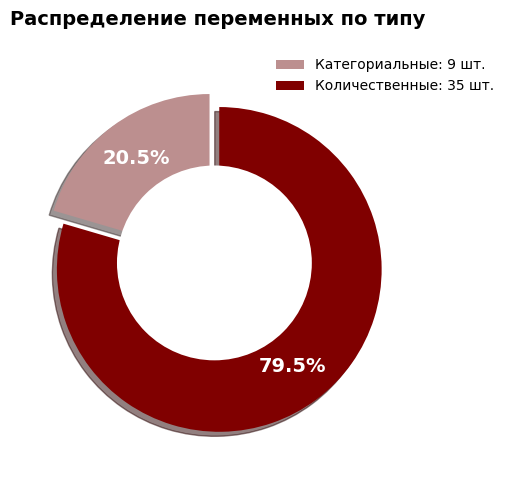

In [11]:
plt.figure(figsize=(5, 5))

sizes = [len(categorical_vars), len(numerical_vars)]
labels = ['Категориальные', 'Количественные']
colors = ['#BC8F8F', '#800000']

wedges, texts, autotexts = plt.pie(sizes, colors=colors, startangle=90,
                                    autopct='%1.1f%%', pctdistance=0.75,
                                    explode=(0.05, 0.05), shadow=True)

centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

for text in texts:
    text.set_fontsize(12)

plt.title(f'Распределение переменных по типу', fontsize=14, pad=15, fontweight='bold')
plt.axis('equal')

legend_labels = [f'{label}: {size} шт.' for label, size in zip(labels, sizes)]
plt.legend(wedges, legend_labels, loc="upper right", bbox_to_anchor=(1.3, 1), frameon=False)

plt.tight_layout()
plt.show()

### Статистический анализ количественных переменных 
Посчитаем основные статистические показатели по числовым переменным из датасета:
- среднее
- мода
- медиана 
- стандартное отклонение
- минимум
- максимум

In [12]:
def basic_numeric_stats(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    stats_data = []
    
    for col in numeric_cols:
        col_data = df[col].dropna()
        
        if len(col_data) > 0:
            mode_str = f"{col_data.mode().iloc[0]:.2f}" if not col_data.mode().empty else "—"
            
            stats_data.append({
                'Колонка': col,
                'Количество': f"{len(col_data):,}",
                'Среднее': f"{col_data.mean():.2f}",
                'Медиана': f"{col_data.median():.2f}",
                'Мода': mode_str,
                'Стандартное отклонение': f"{col_data.std():.2f}",
                'Минимум': f"{col_data.min():.2f}",
                'Максимум': f"{col_data.max():.2f}",
            })
    
    stats_df = pd.DataFrame(stats_data)
    display(stats_df) 
    return stats_df

basic_numeric_stats(df)

Колонка Количество     Среднее     Медиана        Мода  \
0          Номер варианта     10,243       10.00       10.00       10.00   
1                      ID     10,243  1102430.00  1102430.00  1000010.00   
2          INSURANCE_FLAG     10,243        0.61        1.00        1.00   
3                     DTI     10,100        0.38        0.40        0.59   
4   FULL_AGE_CHILD_NUMBER     10,243        0.56        0.00        0.00   
5        DEPENDANT_NUMBER     10,243        0.01        0.00        0.00   
6        BANKACCOUNT_FLAG      7,939        0.38        0.00        0.00   
7          Period_at_work      7,937       66.54       46.00        6.00   
8                     age      7,939       36.22       34.00       27.00   
9               max90days      3,829        1.63        1.00        1.00   
10              max60days      3,829        1.16        1.00        0.00   
11              max30days      3,829        0.87        0.00        0.00   
12              max21days      3,829        0.65        0.00        0.00   
13              max14days      3,829        0.53        0.00        0.00   
14          avg_num_delay      3,568        0.06        0.02        0.00   
15               if_zalog      3,580        0.34        0.00        0.00   
16   num_AccountActive180      3,580        0.38        0.00        0.00   
17    num_AccountActive90      3,580        0.17        0.00        0.00   
18    num_AccountActive60      3,580        0.10        0.00        0.00   
19      Active_to_All_prc      3,580        0.43        0.40        0.50   
20    numAccountActiveAll      3,580        2.23        2.00        1.00   
21       numAccountClosed      3,580        3.59        3.00        1.00   
22     sum_of_paym_months      3,580       82.71       65.00       17.00   
23            all_credits      3,580        5.81        5.00        3.00   
24          Active_not_cc      3,580        1.10        1.00        1.00   
25             own_closed      3,580        0.74        0.00        0.00   
26      min_MnthAfterLoan      3,580       13.76        9.00        6.00   
27      max_MnthAfterLoan      3,580       61.67       67.00       83.00   
28              dlq_exist      3,580        0.58        1.00        1.00   
29       thirty_in_a_year      3,580        0.16        0.00        0.00   
30        sixty_in_a_year      3,580        0.09        0.00        0.00   
31       ninety_in_a_year      3,580        0.06        0.00        0.00   
32         thirty_vintage      3,580        0.03        0.00        0.00   
33          sixty_vintage      3,580        0.01        0.00        0.00   
34         ninety_vintage      3,580        0.01        0.00        0.00   

   Стандартное отклонение     Минимум    Максимум  
0                    0.00       10.00       10.00  
1                59140.87  1000010.00  1204850.00  
2                    0.49        0.00        1.00  
3                    0.14        0.01        0.68  
4                    0.77        0.00        6.00  
5                    0.09        0.00        3.00  
6                    0.86        0.00        4.00  
7                   66.46        4.00      521.00  
8                    8.66       23.00       61.00  
9                    1.95        0.00       29.00  
10                   1.61        0.00       29.00  
11                   1.40        0.00       29.00  
12                   1.19        0.00       29.00  
13                   1.06        0.00       27.00  
14                   0.12        0.00        1.00  
15                   0.47        0.00        1.00  
16                   0.67        0.00        4.00  
17                   0.45        0.00        3.00  
18                   0.35        0.00        3.00  
19                   0.29        0.00        1.00  
20                   1.66        0.00       13.00  
21                   3.21        0.00       28.00  
22                  71.16        0.00      584.00  
23                   4.08        

Колонка Количество     Среднее     Медиана        Мода  \
0          Номер варианта     10,243       10.00       10.00       10.00   
1                      ID     10,243  1102430.00  1102430.00  1000010.00   
2          INSURANCE_FLAG     10,243        0.61        1.00        1.00   
3                     DTI     10,100        0.38        0.40        0.59   
4   FULL_AGE_CHILD_NUMBER     10,243        0.56        0.00        0.00   
5        DEPENDANT_NUMBER     10,243        0.01        0.00        0.00   
6        BANKACCOUNT_FLAG      7,939        0.38        0.00        0.00   
7          Period_at_work      7,937       66.54       46.00        6.00   
8                     age      7,939       36.22       34.00       27.00   
9               max90days      3,829        1.63        1.00        1.00   
10              max60days      3,829        1.16        1.00        0.00   
11              max30days      3,829        0.87        0.00        0.00   
12              max21days      3,829        0.65        0.00        0.00   
13              max14days      3,829        0.53        0.00        0.00   
14          avg_num_delay      3,568        0.06        0.02        0.00   
15               if_zalog      3,580        0.34        0.00        0.00   
16   num_AccountActive180      3,580        0.38        0.00        0.00   
17    num_AccountActive90      3,580        0.17        0.00        0.00   
18    num_AccountActive60      3,580        0.10        0.00        0.00   
19      Active_to_All_prc      3,580        0.43        0.40        0.50   
20    numAccountActiveAll      3,580        2.23        2.00        1.00   
21       numAccountClosed      3,580        3.59        3.00        1.00   
22     sum_of_paym_months      3,580       82.71       65.00       17.00   
23            all_credits      3,580        5.81        5.00        3.00   
24          Active_not_cc      3,580        1.10        1.00        1.00   
25             own_closed      3,580        0.74        0.00        0.00   
26      min_MnthAfterLoan      3,580       13.76        9.00        6.00   
27      max_MnthAfterLoan      3,580       61.67       67.00       83.00   
28              dlq_exist      3,580        0.58        1.00        1.00   
29       thirty_in_a_year      3,580        0.16        0.00        0.00   
30        sixty_in_a_year      3,580        0.09        0.00        0.00   
31       ninety_in_a_year      3,580        0.06        0.00        0.00   
32         thirty_vintage      3,580        0.03        0.00        0.00   
33          sixty_vintage      3,580        0.01        0.00        0.00   
34         ninety_vintage      3,580        0.01        0.00        0.00   

   Стандартное отклонение     Минимум    Максимум  
0                    0.00       10.00       10.00  
1                59140.87  1000010.00  1204850.00  
2                    0.49        0.00        1.00  
3                    0.14        0.01        0.68  
4                    0.77        0.00        6.00  
5                    0.09        0.00        3.00  
6                    0.86        0.00        4.00  
7                   66.46        4.00      521.00  
8                    8.66       23.00       61.00  
9                    1.95        0.00       29.00  
10                   1.61        0.00       29.00  
11                   1.40        0.00       29.00  
12                   1.19        0.00       29.00  
13                   1.06        0.00       27.00  
14                   0.12        0.00        1.00  
15                   0.47        0.00        1.00  
16                   0.67        0.00        4.00  
17                   0.45        0.00        3.00  
18                   0.35        0.00        3.00  
19                   0.29        0.00        1.00  
20                   1.66        0.00       13.00  
21                   3.21        0.00       28.00  
22                  71.16        0.00      584.00  
23                   4.08        

#### Выводы по статистике количественных переменных:
- общее количество значений варьируется в зависимости от типа переменной: общая информация о клиентах в большинстве случаев заполнена в отличие от данных о его кредитной активности 
- медианное и модальное значения в большинстве переменных равны 0 (большинство клиентов не обращаются в бюро кредитных историй, не оставляют залог, не имеют активных счетов и просрочек)
- в некоторых колонках есть отрицательные значения

### Анализ нулевых значений
Выведем колонки, в которых встречается наибольшее число нулевых значений. Помимо уже рассмотренного количества иждивенцев, большое количество нулей содержится в колонках:
- количество аккаунтов - больше, чем у половины клиентов, нет онлайн-кабинета
- возраст детей - почти 60% клиентов не имеют детей 
- страховка - свыше трети клиентов не застрахованы (может быть связано с отсутствием кредитов) 

In [13]:
results = []

# Проходим по всем числовым колонкам
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        # Считаем процент нулей
        zeros = (df[col] == 0).sum()
        percent = (zeros / len(df)) * 100
        
        # Отбираем переменные, где нулей >35%
        if percent > 35:
            results.append((col, percent))

# Сортируем по убыванию долей
results.sort(key=lambda x: x[1], reverse=True)

print(f"Количество переменных с наибольшим количеством нулей:")
for col, percent in results:
    print(f"{col:25} {percent:.1f}%")

Количество переменных с наибольшим количеством нулей:
DEPENDANT_NUMBER          99.6%
BANKACCOUNT_FLAG          61.1%
FULL_AGE_CHILD_NUMBER     59.4%
INSURANCE_FLAG            38.9%


### Анализ пустых значений
Посмотрим детальнее на пустые значения переменных. Для начала соберем общую статистику по всем колонкам и условно разделим их по группам в зависимости от количества пропусков:
- нет пропусков (0%)
- минимальные пропуски (<5%)
- начительные пропуски (5-30%)
- критичные пропуски (>30%)

In [14]:
missing_groups = {
    "Нет пропусков": [],
    "Минимальные пропуски": [],
    "Значительные пропуски": [],
    "Критичные пропуски": []
}

In [15]:
for col in df.columns:
    missing_pct = df[col].isna().sum() / len(df) * 100
    if missing_pct == 0:
        missing_groups["Нет пропусков"].append(col)
    elif missing_pct < 5:
        missing_groups["Минимальные пропуски"].append(col)
    elif missing_pct < 30:
        missing_groups["Значительные пропуски"].append(col)
    else:
        missing_groups["Критичные пропуски"].append(col)

for group, columns in missing_groups.items():
    print(f"\n{group}: {len(columns)} колонок")
    if columns:
        print(f"{', '.join(columns)}")


Нет пропусков: 8 колонок
Номер варианта, ID, CREDIT_PURPOSE, INSURANCE_FLAG, SEX, FULL_AGE_CHILD_NUMBER, DEPENDANT_NUMBER, EDUCATION

Минимальные пропуски: 4 колонок
INCOME_BASE_TYPE, DTI, EMPL_TYPE, EMPL_SIZE

Значительные пропуски: 4 колонок
BANKACCOUNT_FLAG, Period_at_work, age, EMPL_PROPERTY

Критичные пропуски: 28 колонок
EMPL_FORM, FAMILY_STATUS, max90days, max60days, max30days, max21days, max14days, avg_num_delay, if_zalog, num_AccountActive180, num_AccountActive90, num_AccountActive60, Active_to_All_prc, numAccountActiveAll, numAccountClosed, sum_of_paym_months, all_credits, Active_not_cc, own_closed, min_MnthAfterLoan, max_MnthAfterLoan, dlq_exist, thirty_in_a_year, sixty_in_a_year, ninety_in_a_year, thirty_vintage, sixty_vintage, ninety_vintage


В датасете присутствуют три основные группы пропусков:
- **22%** - кол-во аккаунтов, время работы, возраст,  сфера деятельности
- **62%** - организационно-правовая форма, семейный статус, кол-во запросов в бюро кредитных историй
- **65%** - наличие залога, кол-во счетов, сумма платежей, кол-во кредитов, период от последнего взятия кредита, наличие просрочки по кредитам

Так как у многих клиентов в принципе отсутствует кредитная история (в 65% случаев), то у них нет и залога, платежей, просрочки.  

### Анализ уникальных значений

Как видно из итогового распределения, в датасете преобладают числовые переменные (их доля составляет почти 80%), в то время как категориальных переменных всего 9 штук:
- подтверждение дохода
- цель получения кредита
- пол
- образование
- должность
- зарплата
- сфера бизнеса работодателя
- организационно-правовая форма
- семейный статус

Посмотрим уникальные значения для этих категориальных переменных.

In [16]:
for var in categorical_vars:
    print(f"\nПеременная: {var}")
    unique_vals = df[var].dropna().unique()
    print(f"Количество уникальных значений: {len(unique_vals)}")
    print(f"{list(unique_vals)}")


Переменная: INCOME_BASE_TYPE
Количество уникальных значений: 4
['2НДФЛ', 'Поступление зарплаты на счет', 'Свободная форма с печатью работодателя', 'Форма банка (без печати работодателя)']

Переменная: CREDIT_PURPOSE
Количество уникальных значений: 10
['Покупка автомобиля', 'Ремонт', 'Покупка земли', 'Покупка недвижимости/ строительство', 'Другое', 'Покупка мебели', 'Обучение', 'Отпуск', 'Лечение', 'Покупка бытовой техники']

Переменная: SEX
Количество уникальных значений: 2
['мужской', 'женский']

Переменная: EDUCATION
Количество уникальных значений: 9
['среднее-специальное', 'Высшее/Второе высшее/Ученая степень', 'незаконченное высшее', 'второе высшее', 'высшее', 'среднее', '*n.a.*', 'ученая степень', 'Неполное среднее']

Переменная: EMPL_TYPE
Количество уникальных значений: 9
['рабочий', 'специалист', 'другое', 'торговый представитель', 'менеджер среднего звена', 'вспомогательный персонал', 'менеджер высшего звена', 'менеджер по продажам', 'страховой агент']

Переменная: EMPL_SIZE
К

### Визуализация распределения категориальных данных
Построим графики для более наглядного анализа распределения категориальных данных. 

Для переменных 'подтверждение дохода' и 'пол' построим круговые диаграммы, так как в них содержится небольшое количество уникальных значений. Для остальных переменных построим гистограммы. 

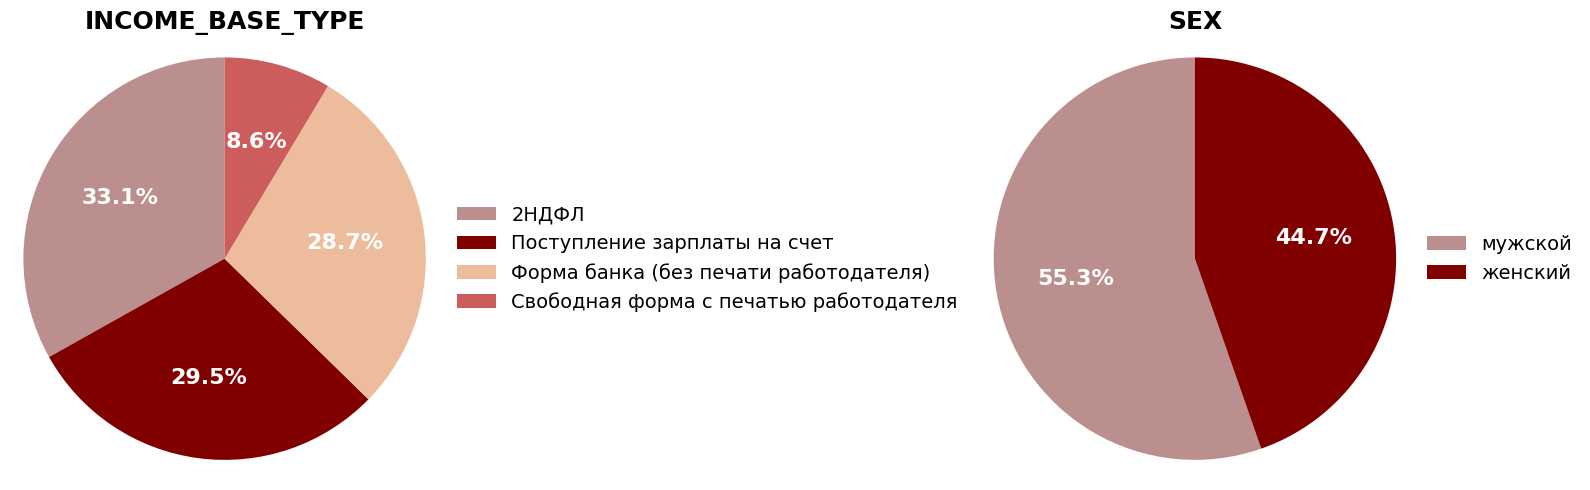

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

variables = ['INCOME_BASE_TYPE', 'SEX']
colors = ['#BC8F8F', '#800000', '#ECBC9D', '#CD5C5C']

for i, var in enumerate(variables):
    ax = axes[i]
    counts = df[var].value_counts()
    
    ax.pie(counts.values, colors=colors[:len(counts)], autopct='%1.1f%%', startangle=90,
           textprops={'color': 'white', 'fontsize': 16, 'fontweight': 'bold'})
    
    ax.set_title(var, fontsize=18, fontweight='bold')
    ax.legend(counts.index, fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False) 
    ax.axis('equal')

plt.tight_layout()
plt.show()

Для оставшихся переменных строим гистограммы, так как у них уже больше уникальных значений, и на круговой диаграмме их распределение выглядит не так наглядно. 

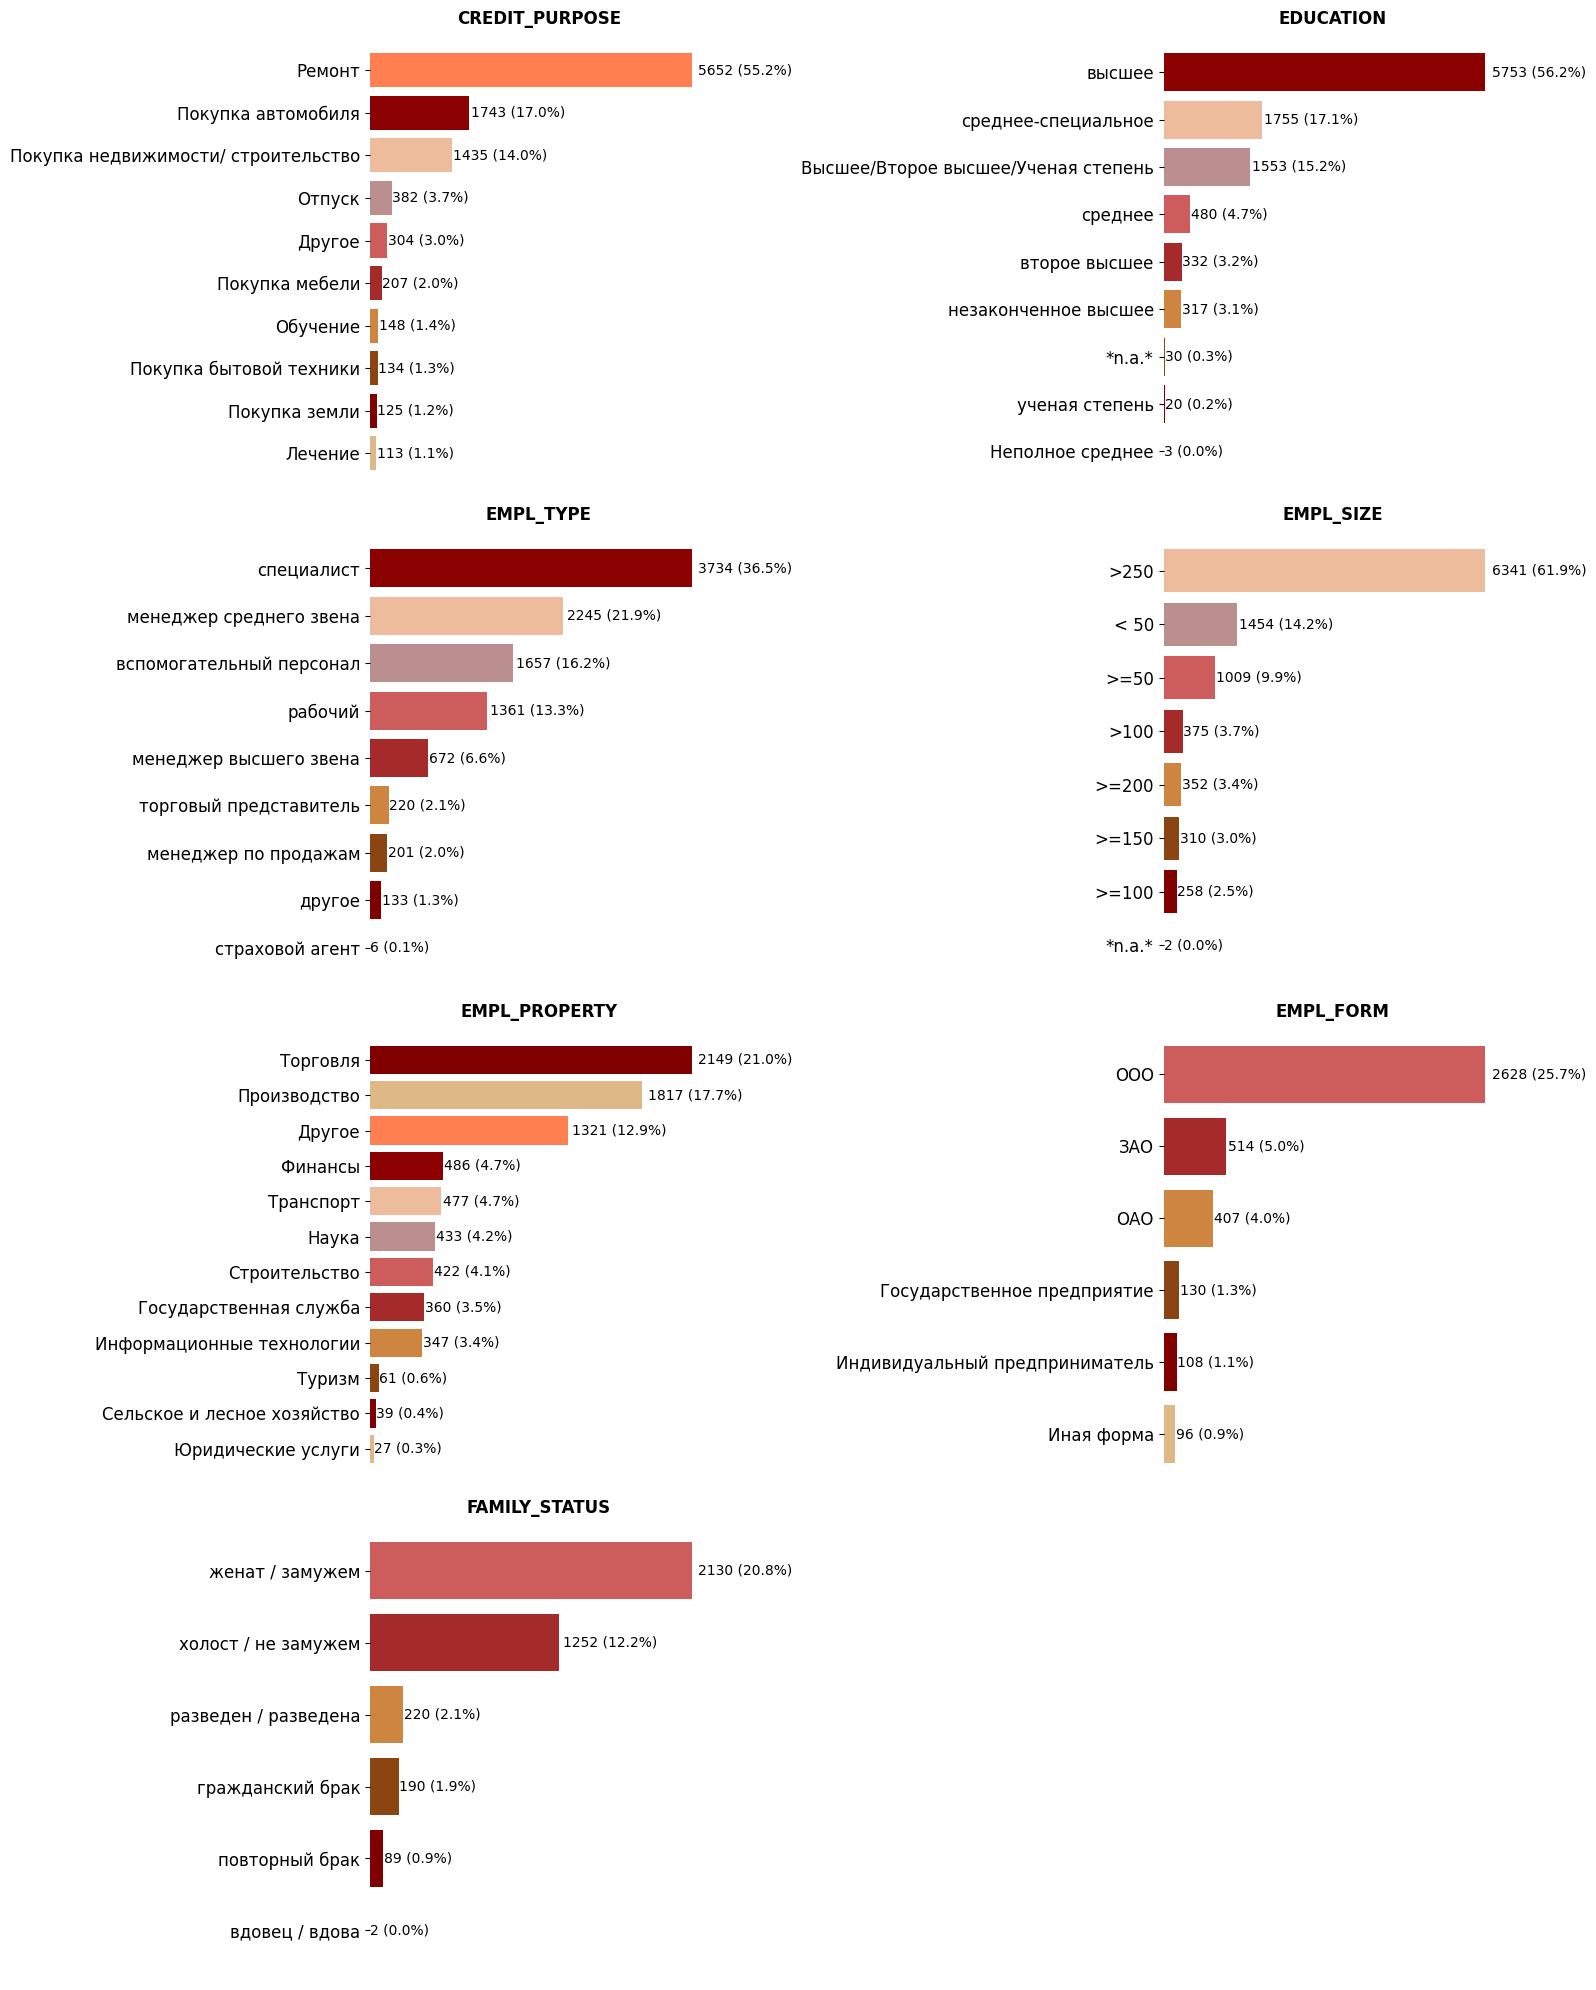

In [18]:
variables = ['CREDIT_PURPOSE', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 
             'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS']

colors = ['#DEB887', '#800000', '#8B4513', '#CD853F', '#A52A2A',
          '#CD5C5C', '#BC8F8F', '#ECBC9D', '#8B0000', '#FF7F50']

n_cols = 2
n_rows = math.ceil(len(variables) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
fig.patch.set_color('white')

if n_rows > 1:
    axes_flat = axes.flatten()
else:
    axes_flat = axes

for idx, var in enumerate(variables):
    ax = axes_flat[idx]
    ax.set_facecolor('white')
    
    counts = df[var].value_counts().sort_values()
    
    # Строим горизонтальные гистограммы 
    bars = ax.barh(range(len(counts)), counts.values, 
                   color=colors[:len(counts)])
    
    ax.set_title(var, fontweight='bold')
    
    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.set_xticks([])
    ax.set_yticks(range(len(counts)))
    ax.set_yticklabels(counts.index, fontsize=12)
    
    # Добавляем подписи значений справа от бара
    total = len(df)
    for bar, count in zip(bars, counts.values):
        pct = count / total * 100
        ax.text(count * 1.02, bar.get_y() + bar.get_height()/2,
                f'{count} ({pct:.1f}%)',
                va='center', ha='left')

for idx in range(len(variables), len(axes_flat)):
    axes_flat[idx].set_visible(False)

plt.tight_layout()
plt.show()

#### Выводы по графикам распределений категориальных переменных:
1. Переменная `INCOME_BASE_TYPE` (подтверждение дохода)

Самая частая форма подтверждения дохода - предоставление справки 2НДФЛ или поступление зарплаты на счет.


2. Переменная `SEX` (пол) 

Доля мужчин незначительно превышает долю женщин среди клиентов банка, отклонение от 50/50 свыше 5%.


3. Переменная `CREDIT_PURPOSE` (цель получения кредита)

Больше половины клиентов берут кредит на ремонт. Также многие покупают автомобили и недвижимость в кредит. Наименее популярные категории: лечение, обучение, покупка бытовой техники и земли.
В данных также есть категория 'Другое', которая агрегирует все оставшиеся значения.


4. Переменная `EDUCATION` (образование)

Больше половины клиентов имеют высшее образование. При этом в таблице есть некорректные значения '*n.a.*', а также совмещенное значение 'Высшее/Второе высшее/Ученая степень', что тоже не совсем корректно объединять в одну категорию, учитывая, что эти категории есть по-отдельности.


5. Переменная `EMPL_TYPE` (должность)

Примерно треть клиентов являются специалистами, дальше идут менеджеры среднего звена и вспомогательный персонал. Здесь тоже есть категория 'Другое', которая составляет 1,3% от всех данных.


6. Переменная `EMPL_SIZE` (зарплата)

Большая часть клиентов зарабатывают свыше 250 тысяч. При этом есть пересекающиеся категории >100 и >=100.


7. Переменная `EMPL_PROPERTY` (сфера бизнеса работодателя)

Здесь есть три относительно крупные группы: торговля, производство и агрегированная группа 'Другое'. наименее распространены туризм, с/х деятельность и юридические услуги. Остальные категории составляют около 4% от всех данных.


8. Переменная `EMPL_FORM` (организационно-правовая форма)

Самая частая форма бизнеса - ООО. Самые редкие формы объединены в категорию 'Иная форма'.


9. Переменная `FAMILY_STATUS` (семейный статус)

Наибольшая доля клиентов находится в браке. 

### Визуализация распределения количественных данных
Из таблицы, в которой посчитано количество уникальных значений в каждой категории, видно, что есть столбцы с количественными данными, где содержится не так много уникальных значений:
- INSURANCE_FLAG (2 уникальных значения)
- FULL_AGE_CHILD_NUMBER (7 уникальных значений)
- DEPENDANT_NUMBER (4 уникальных значения)
- BANKACCOUNT_FLAG (5 уникальных значений)
- age (39 уникальных значения)
- max90days (21 уникальных значений)
- max60days (18 уникальных значений)
- max30days (16 уникальных значений)
- max21days (14 уникальных значений)
- max14days (12 уникальных значений)
- if_zalog (2 уникальных значения)
- num_AccountActive180 (5 уникальных значений)
- num_AccountActive90 (4 уникальных значения)
- num_AccountActive60 (4 уникальных значения)
- numAccountActiveAll (14 уникальных значений)
- numAccountClosed (24 уникальных значений)
- all_credits (29 уникальных значений)
- Active_not_cc (8 уникальных значений)
- own_closed (8 уникальных значений)
- dlq_exist (2 уникальных значения)
- thirty_in_a_year (2 уникальных значения)
- sixty_in_a_year (2 уникальных значения)
- ninety_in_a_year (2 уникальных значения)
- thirty_vintage (2 уникальных значения)
- sixty_vintage (2 уникальных значения)
- ninety_vintage (2 уникальных значения)

Построим графики по этим переменным тоже, чтобы наглядно посмотреть, как распределены в них значения. Для бинарных переменных (имеющих только два уникальных значения - 0 и 1) построим круговые диаграммы. 

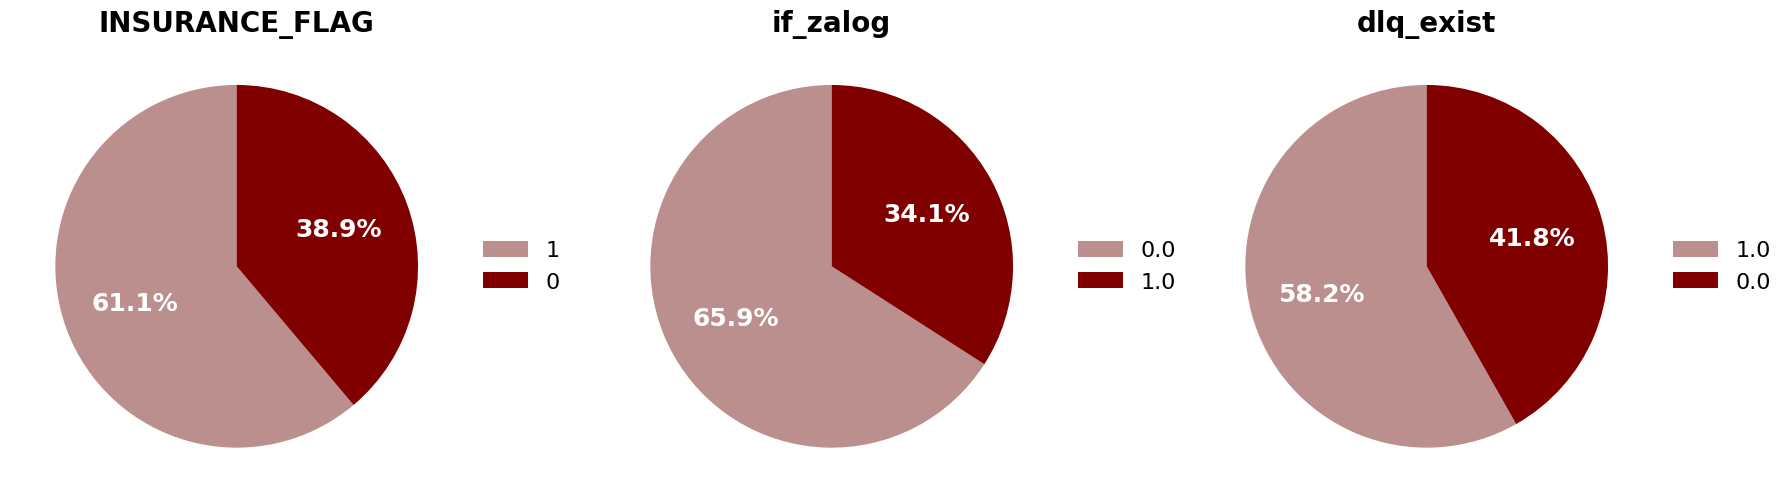

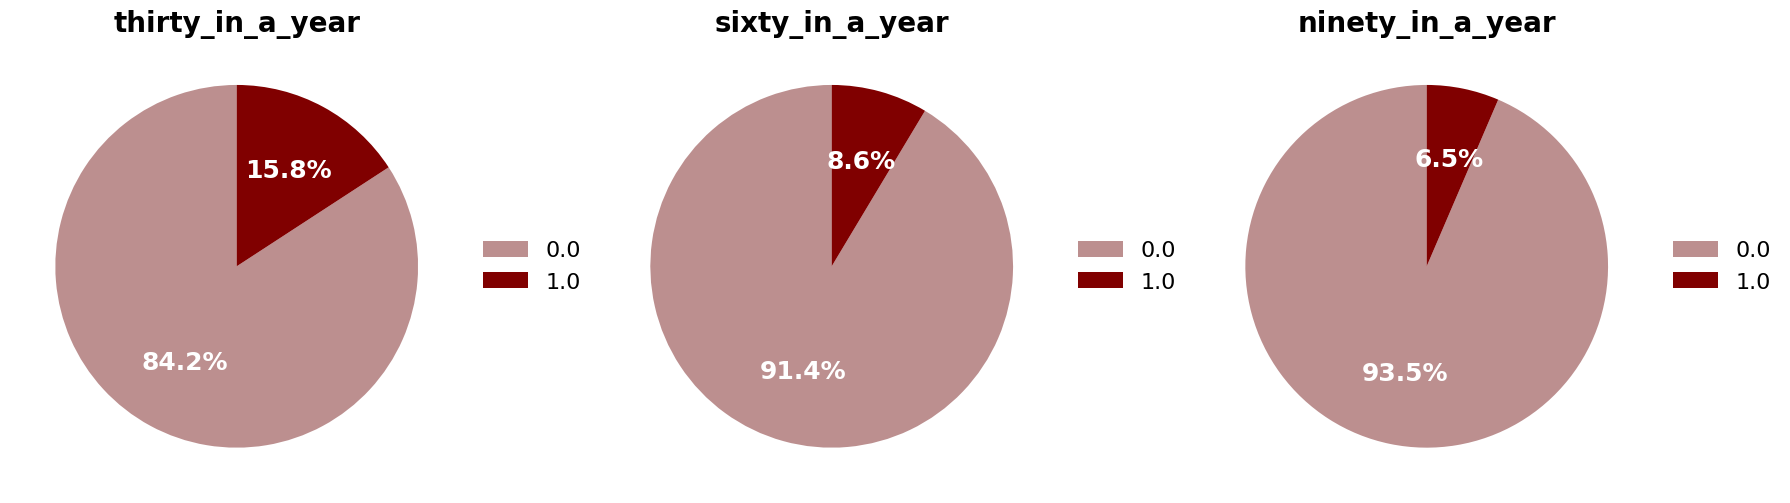

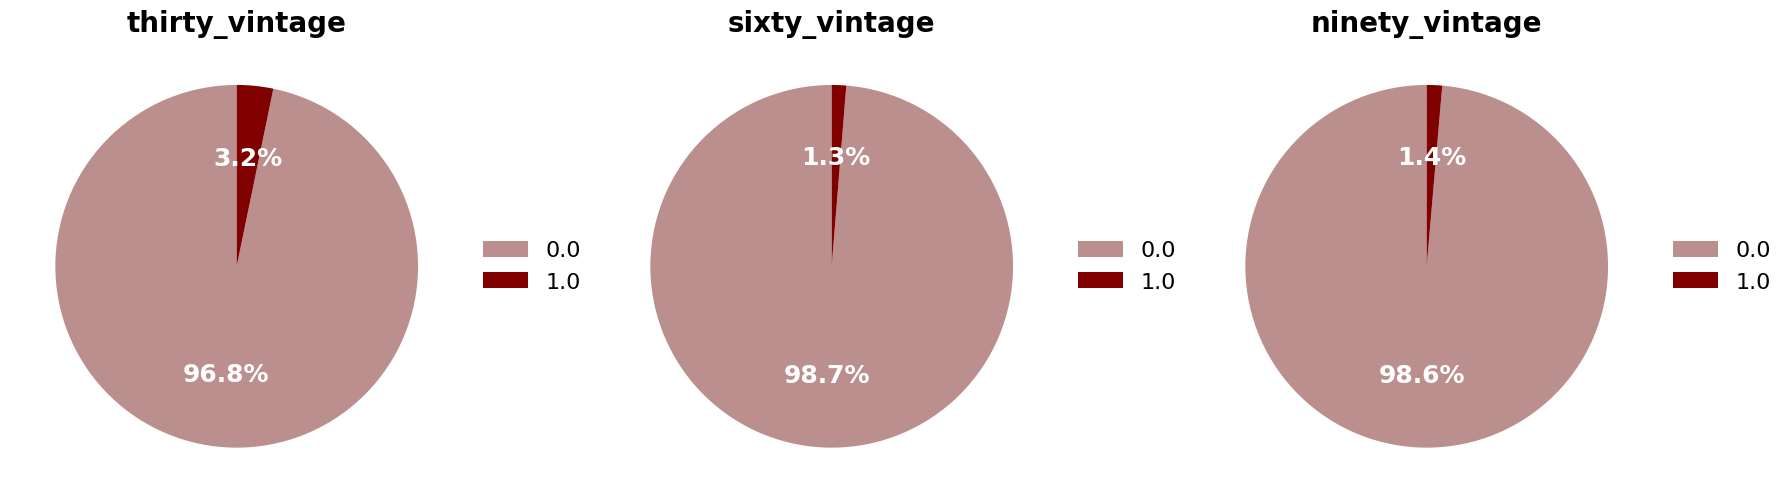

In [19]:
variables = ['INSURANCE_FLAG', 'if_zalog', 'dlq_exist', 'thirty_in_a_year', 'sixty_in_a_year',
             'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage']

colors = ['#BC8F8F', '#800000']

for i in range(0, len(variables), 3):
    group = variables[i:i+3]
    
    fig, axs = plt.subplots(1, len(group), figsize=(6*len(group), 6))
    
    for j, var in enumerate(group):
        ax = axs[j] if len(group) > 1 else axs
        counts = df[var].value_counts()
        
        ax.pie(counts.values, colors=colors[:len(counts)], 
               autopct='%1.1f%%', startangle=90,
               textprops={'fontsize': 18, 'color': 'white', 'fontweight': 'bold'})
        
        ax.set_title(var, fontsize=20, fontweight='bold')
        ax.legend(counts.index, fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)  
        
    plt.tight_layout()
    plt.show()

#### Выводы по графикам распределения количественных переменных:
- среди клиентов банка преобладают люди без страховки (61%) и залога (66%) с просрочкой до 30 дней
- доля клиентов, не имеющих просрочки по кредитам свыше 1 месяца, в текущем году составляет порядка 85%
- количество клиентов с просрочкой свыше 30 дней когда-либо минимально (меньше 5%)

Для количественных переменных с большим количеством уникальных значений построим гистограммы распределения.

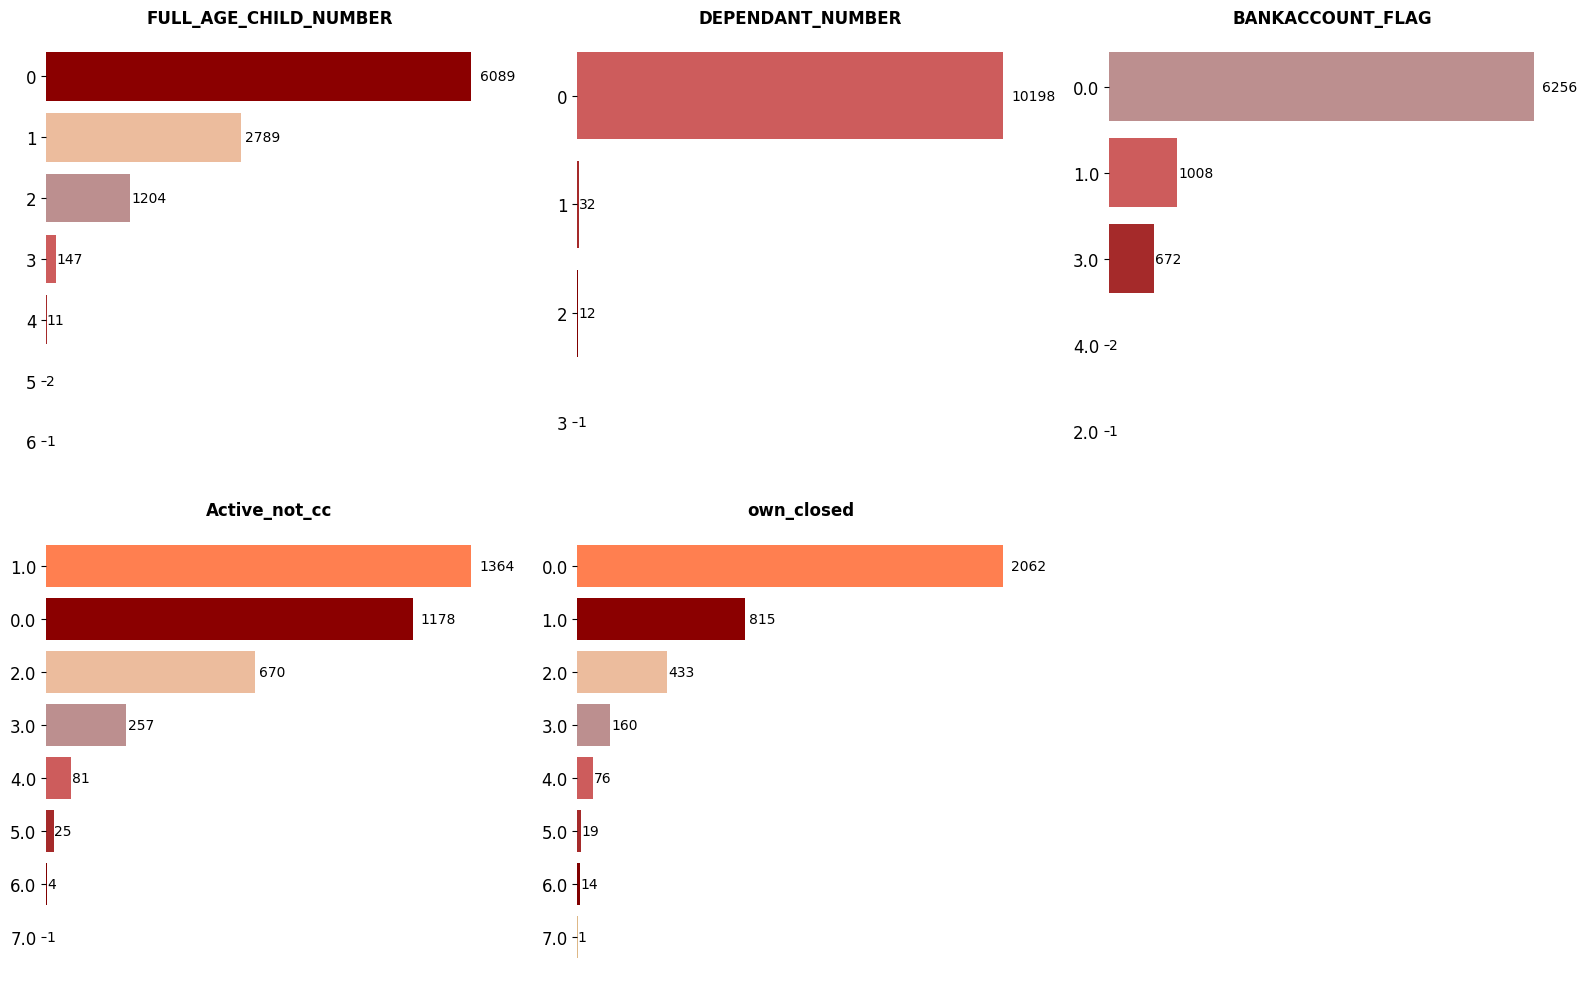

In [20]:
variables = ['FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER', 'BANKACCOUNT_FLAG', 
             'Active_not_cc', 'own_closed']

colors = ['#DEB887', '#800000', '#A52A2A', '#CD5C5C', '#BC8F8F', '#ECBC9D', '#8B0000', '#FF7F50']

n_cols = 3
n_vars = len(variables)
n_rows = int(np.ceil(n_vars / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
fig.patch.set_color('white')

if n_rows > 1:
    axes_flat = axes.flatten()
else:
    axes_flat = axes

for idx, var in enumerate(variables):
    ax = axes_flat[idx]
    ax.set_facecolor('white')
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    counts = df[var].value_counts().sort_values()
    
    # Строим горизонтальные гистограммы
    bars = ax.barh(range(len(counts)), counts.values, 
                   color=colors[:len(counts)])
    
    ax.set_title(var, fontweight='bold')
    
    ax.set_yticks(range(len(counts)))
    ax.set_yticklabels(counts.index, fontsize=12)
    
    ax.set_xticks([])
    
    # Добавляем подписи значений справа от баров
    for bar, count in zip(bars, counts.values):
        ax.text(count * 1.02, bar.get_y() + bar.get_height()/2,
                f'{count}',
                va='center', ha='left')

for idx in range(len(variables), len(axes_flat)):
    axes_flat[idx].set_visible(False)

plt.tight_layout()
plt.show()

#### Выводы по графикам распределения количественных переменных:
- наибольшее число клиентов не имеют детей, поэтому самый частый возраст детей - 0 лет
- у клиентов с детьми в основном младенцы и новорожденные, самый старший возраст ребенка - 6 лет (1 человек) 
- только у одного клиента 3 иждивенца, у остальных меньше (у большинства их нет вообще)
- у большинства клиентов нет онлайн-аккаунта, значительная часть заходит с другого устройства
- чаще всего у клиентов есть по 1-2 кредитному счету, у многих их нет вообще
- большая часть клиентов не имеет закрытых кредитов (вероятно, так как в принципе не является кредитным клиентом)

Распределение оставшихся количественных переменных визуализируем с помощью гистограмм и диаграмм плотности.


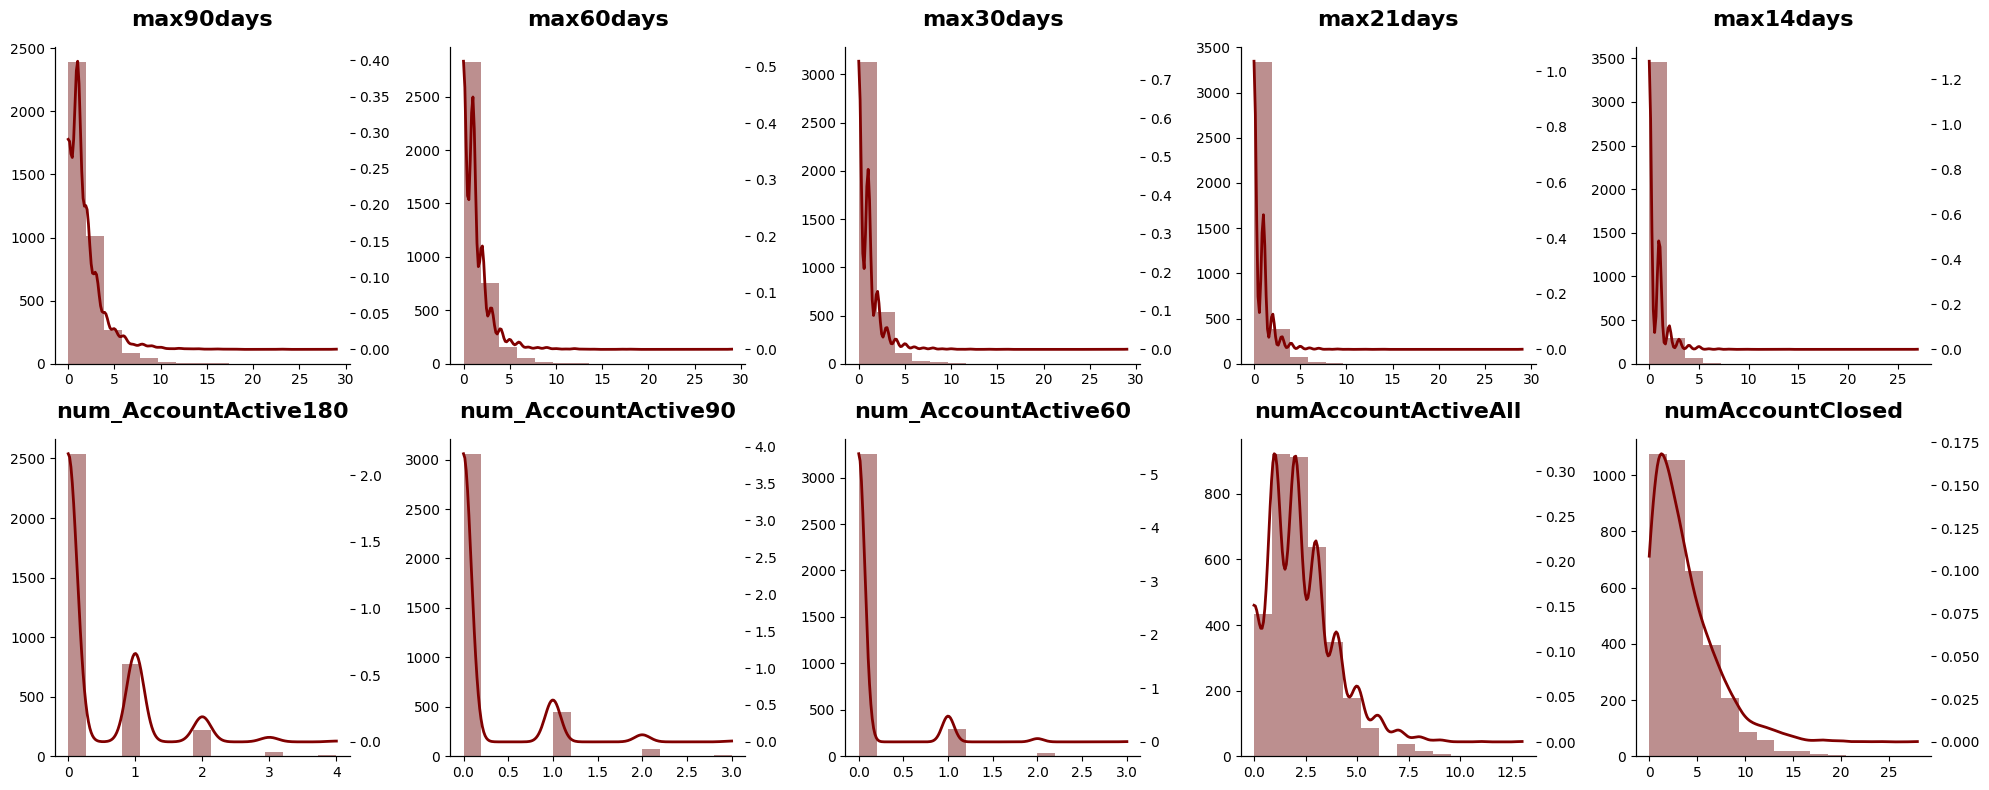

In [21]:
variables = ['max90days', 'max60days', 'max30days', 'max21days', 'max14days',
             'num_AccountActive180', 'num_AccountActive90', 'num_AccountActive60',
             'numAccountActiveAll', 'numAccountClosed']

fig1, axes1 = plt.subplots(2, 5, figsize=(20, 8))
axes_flat1 = axes1.flatten()

for idx, var in enumerate(variables):
    ax = axes_flat1[idx]
    ax.set_facecolor('white')
    
    data = df[var].dropna()
    
    # Гистограмма
    ax.hist(data, bins=15, color='#BC8F8F')
    
    # Плотность распределения
    ax2 = ax.twinx()
    
    kde = stats.gaussian_kde(data)
    x = np.linspace(data.min(), data.max(), 200)
    ax2.plot(x, kde(x), color='#800000', linewidth=2)
    
    ax.set_title(var, fontsize=16, pad=15, fontweight='bold')
    
    ax.tick_params(axis='both', labelsize=10)
    ax2.tick_params(axis='y', labelsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#### Выводы по графикам распределения количественных переменных:
- большинство значений количества запросов в бюро кредитных историй сконцентрированы возле 0
- чем меньше ретроспектива анализа количества обращений в бюро кредитных историй, тем меньше людей попадают в выборку

Количество обращений за последние 3 месяца в основном распределено от 0 до 10, в то время как обращений за последние 2 недели в два раза меньше - от 0 до 5.

- аналогично больше клиентов имели >1 активного счета в течение всего года, нежели в последние 2 месяца
- активных счетов у клиентов больше, чем закрытых (многие имеют по несколько открытых счетов, и ни одного закрытого)

Рассмотрим детальнее распределение переменных возраста клиента и количества кредитов, так как они являются важными характеристиками.

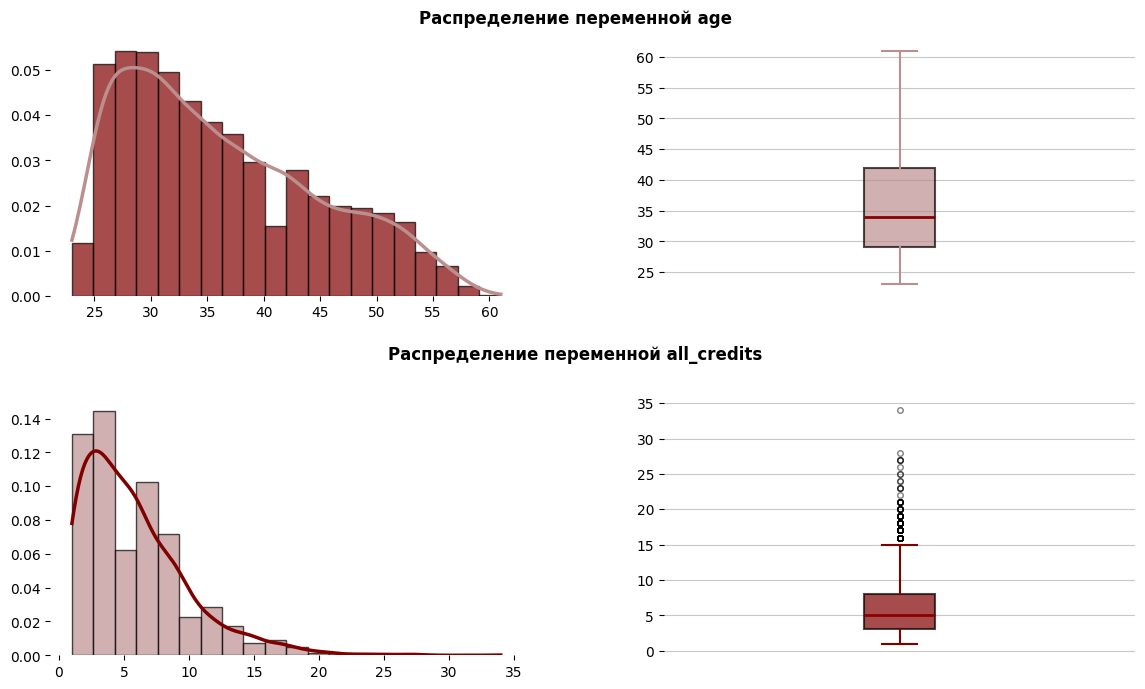

In [22]:
variables = ['age', 'all_credits']

fig, axes = plt.subplots(2, 2, figsize=(14, 8), 
                         gridspec_kw={'hspace': 0.4, 'wspace': 0.3})

for idx, var in enumerate(variables):
    ax_hist, ax_box = axes[idx]
    
    ax_hist.set_facecolor('white')
    ax_box.set_facecolor('white')
    
    data = df[var].dropna()
    
    hist_color = '#800000' if var == 'age' else '#BC8F8F'
    kde_color = '#BC8F8F' if var == 'age' else '#800000'
    box_color = '#BC8F8F' if var == 'age' else '#800000'
    
    title_y = 0.9 - idx*0.42 
    fig.text(0.5, title_y,  
             f'Распределение переменной {var}', fontsize=12, ha='center', fontweight='bold')
    
    # График 1 - гистограмма
    ax_hist.hist(data, bins=20, color=hist_color, 
                 edgecolor='black', alpha=0.7, density=True)
    
    kde = stats.gaussian_kde(data)
    x = np.linspace(data.min(), data.max(), 200)
    ax_hist.plot(x, kde(x), color=kde_color, linewidth=2.5)
    
    # График 2 - ящик с усами
    ax_box.boxplot(data, patch_artist=True,
                   boxprops=dict(facecolor=box_color, alpha=0.7, linewidth=1.5),
                   medianprops=dict(color='#8B0000', linewidth=2),
                   whiskerprops=dict(color=box_color, linewidth=1.5),
                   capprops=dict(color=box_color, linewidth=1.5),
                   flierprops=dict(marker='o', markersize=4, alpha=0.5))

    ax_box.set_xticks([])
    
    ax_box.tick_params(axis='y', labelsize=10)
    ax_box.yaxis.grid(True, linestyle='-', alpha=0.7)
    
    for spine in ax_box.spines.values():
        spine.set_visible(False)
    for spine in ax_hist.spines.values():
        spine.set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Выводы по графикам распределения количественных переменных:
- значения возраста не принимают аномально высоких или, наоборот, низких значений (клиенты банка - люди в возрасте от 23 до 61 года)
- медианный возраст - 34 года, большая часть клиентов - молодежь или люди среднего возраста 
- многие клиенты имеют в основном до 5 кредитов
- встречаются случаи наличия целых 34 кредитов, из-за чего среднее значение для переменной равно 6

### Анализ распределения переменных
Рассмотрим распределение переменных во взаимосвязи с другими переменными. Начнем с распределения ключевых переменных по полу.

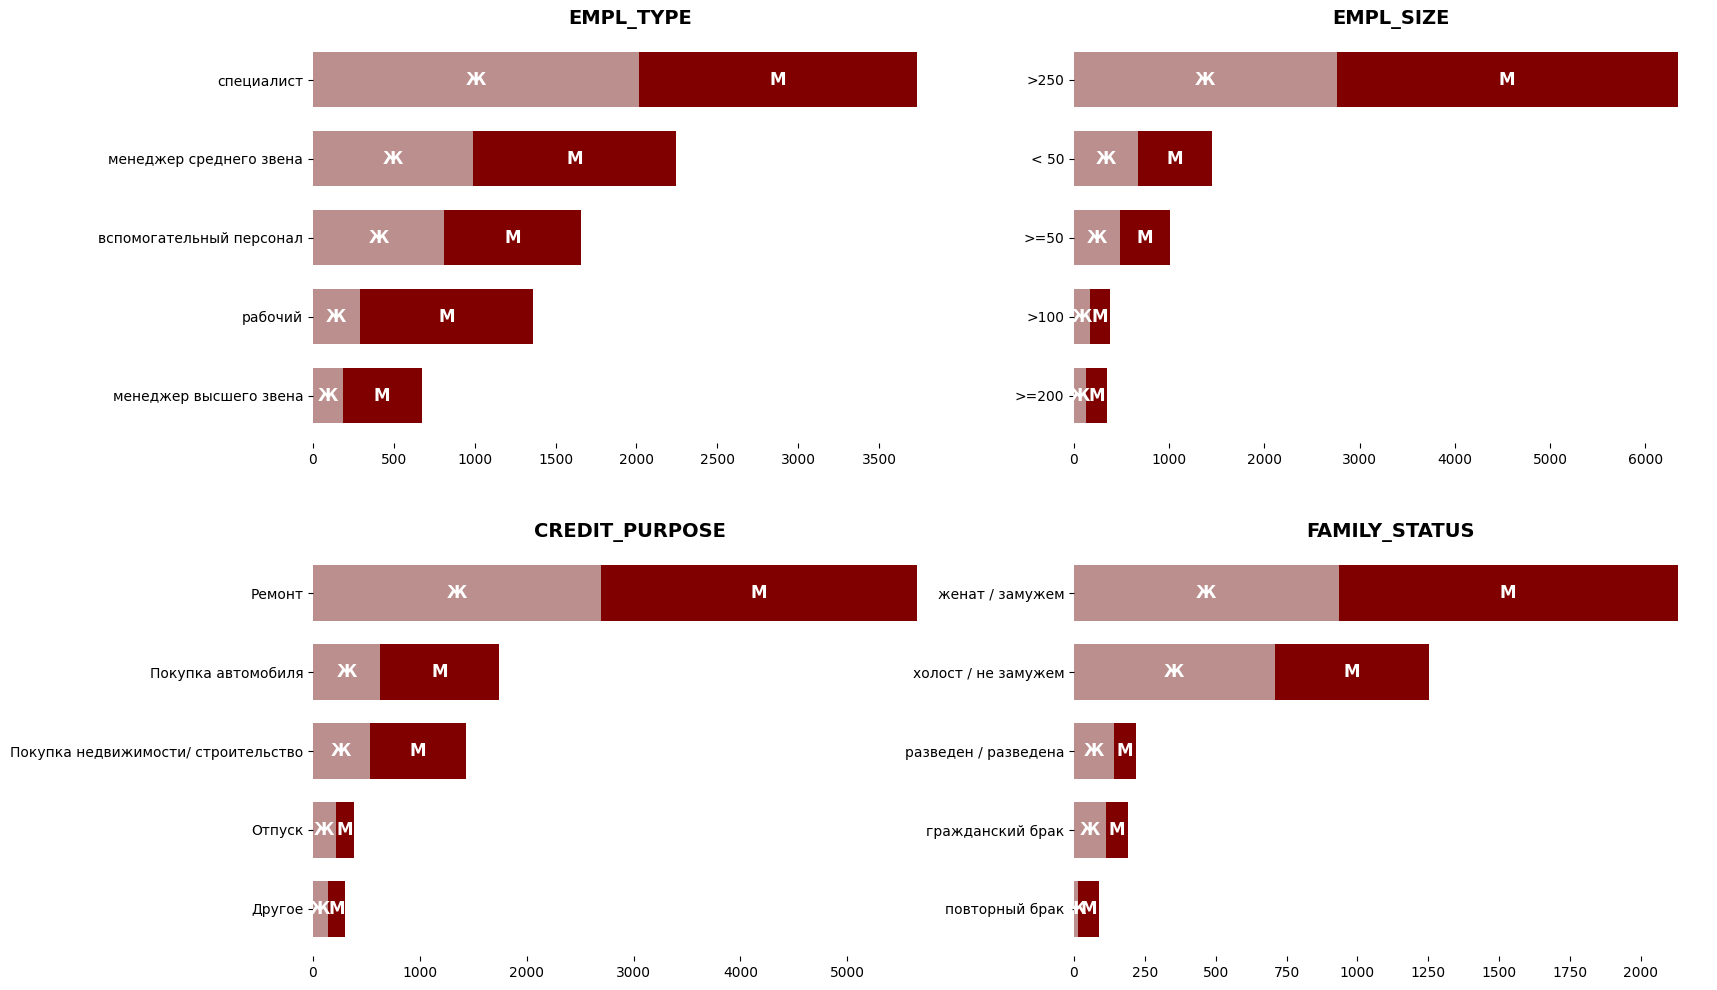

In [23]:
def plot_gender_distribution(var_name, top_n=5, ax=None):
    if ax is None:
        ax = plt.gca()
    
    top_categories = df[var_name].value_counts().head(top_n).index
    filtered_df = df[df[var_name].isin(top_categories)]
    
    # Группируем значения по полу
    gender_dist = filtered_df.groupby([var_name, 'SEX']).size().unstack(fill_value=0)
    
    # Сортируем по убыванию общего количества
    gender_dist['total'] = gender_dist.sum(axis=1)
    gender_dist = gender_dist.sort_values('total', ascending=True).drop('total', axis=1)
    
    # Строим горизонтальную гистограмму
    gender_dist.plot(kind='barh', stacked=True, 
                     color=['#BC8F8F', '#800000'], 
                     width=0.7, ax=ax)
    
    ax.set_title(var_name, fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Добавляем подписи М и Ж внутри баров
    for i, (idx, row) in enumerate(gender_dist.iterrows()):
        male_count = row.get('мужской', 0)
        female_count = row.get('женский', 0)
        total = male_count + female_count
        
        if female_count > 0:
            x_pos_f = female_count / 2
            ax.text(x_pos_f, i, 'Ж', 
                   ha='center', va='center', 
                   color='white', fontweight='bold', fontsize=12)
        
        if male_count > 0:
            if female_count > 0:
                x_pos_m = female_count + (male_count / 2)
            else:
                x_pos_m = male_count / 2
            ax.text(x_pos_m, i, 'М', 
                   ha='center', va='center', 
                   color='white', fontweight='bold', fontsize=12)

    ax.get_legend().remove()
    
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', labelsize=10)
    
    for spine in ax.spines.values():
        spine.set_visible(False)

    max_value = gender_dist.sum(axis=1).max()
    ax.set_xlim(0, max_value * 1.05)
    
    return ax

# Размещаем по два графика в ряд
fig, axes = plt.subplots(2, 2, figsize=(18, 12), facecolor='white')

variables = ['EMPL_TYPE', 'EMPL_SIZE', 'CREDIT_PURPOSE', 'FAMILY_STATUS']      

for idx, var in enumerate(variables):
    row = idx // 2
    col = idx % 2
    plot_gender_distribution(var, top_n=5, ax=axes[row, col])

fig.subplots_adjust(hspace=0.25) 

plt.show()

#### Выводы по графикам распределения переменных по полу:
- среди специалистов и вспомогательного персонала превалируют женщины, а среди оставшихся профессий - мужчины
- женщины занимают в основном средние позиции, в то время как мужчины - высокие (менеджер) или наоборот низкие (рабочий)
- зарплата мужчин, как правило, выше, а среди работников, получающих меньше 250 распределение мужчин и женщин одинаковое
- мужчины чаще женщин берут кредиты на ремонт, покупку автомобиля или недвижимости, но реже на отпуск или другие цели
- больше мужчин в выборке состоят в браке, а женщины чаще свободны (не состояли в браке вообще или разведены)
- доля мужчин в повторном браке выше, чем женщин, а доля тех, кто находится в гражданском браке, наоборот ниже

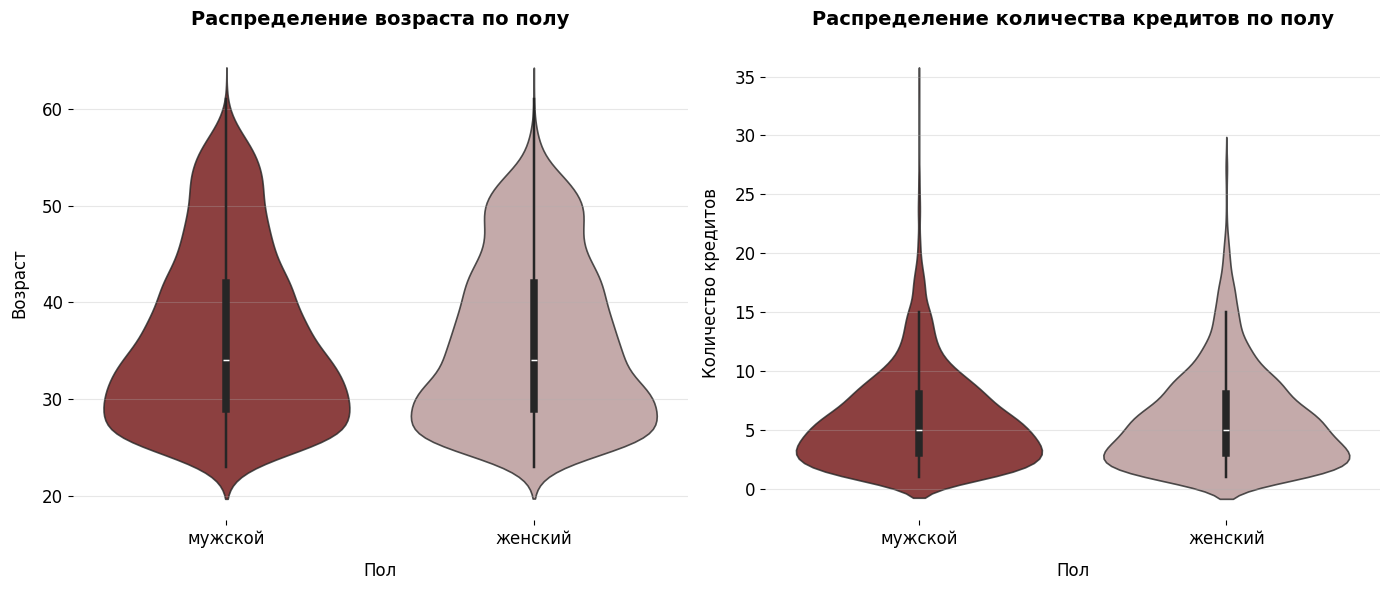

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax in axes:
    ax.set_facecolor('white')

colors = ['#800000', '#BC8F8F']

# График 1 - возраст по полу
sns.violinplot(
    data=df,
    x="SEX",
    y="age",
    inner="box",
    palette=colors,
    ax=axes[0],
    linewidth=1.2  
)

axes[0].set_title('Распределение возраста по полу', fontsize=14, pad=15, fontweight='bold')
axes[0].set_xlabel('Пол', fontsize=12, labelpad=10)
axes[0].set_ylabel('Возраст', fontsize=12, labelpad=10)


# График 2 - количество кредитов по полу
sns.violinplot(
    data=df,
    x="SEX",
    y="all_credits",
    inner="box",
    palette=colors,
    ax=axes[1],
    linewidth=1.2 
)

axes[1].set_title('Распределение количества кредитов по полу', fontsize=14, pad=15, fontweight='bold')
axes[1].set_xlabel('Пол', fontsize=12, labelpad=10)
axes[1].set_ylabel('Количество кредитов', fontsize=12, labelpad=10)


for ax in axes:
    ax.grid(axis='y', alpha=0.3, linestyle='-')
    ax.tick_params(axis='both', labelsize=12)
    
    for collection in ax.collections:
        collection.set_alpha(0.8)
    
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()

#### Выводы по графикам распределения переменных по полу:
- в целом, доли мужчин и женщин распределены примерно одинаково
- распределение по возрасту среди мужчин более вытянутое (например, среди клиентов пожилого возраста превалируют мужчины)
- количество кредитов у мужчин также существенно больше (примерно на 5 кредитов)

Посмотрим распределение возраста, пола, DTI, количества кредитов в зависимости от наличия просрочки у клиента.

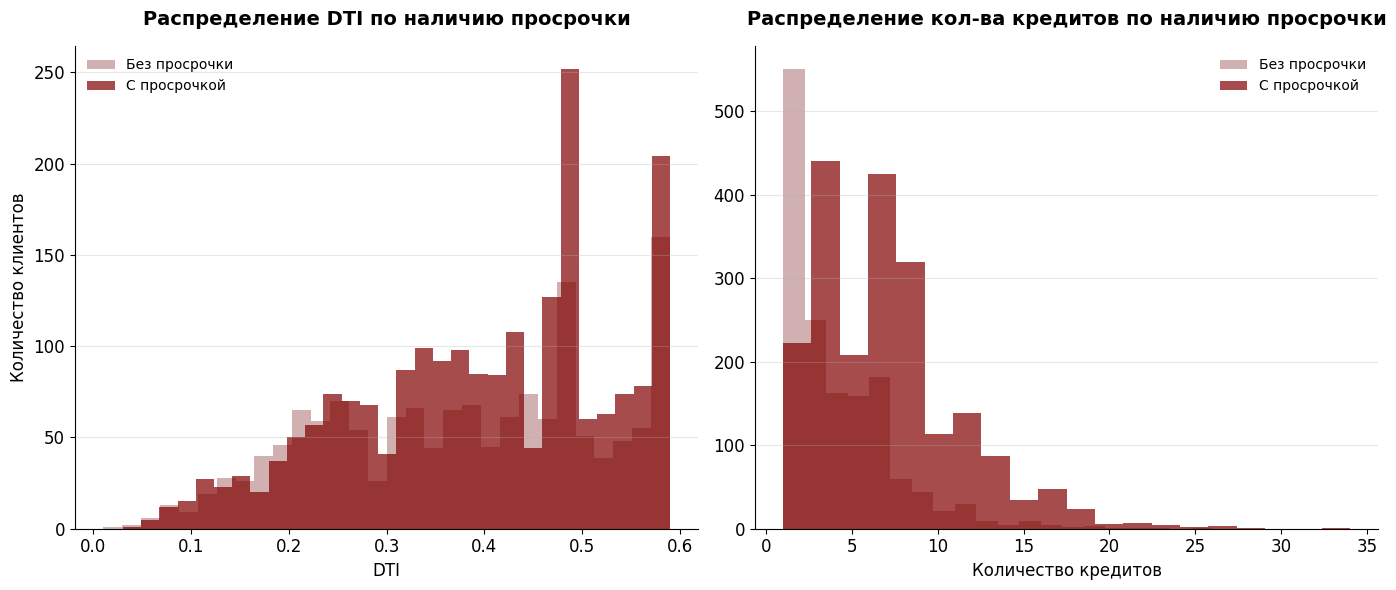

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax in axes:
    ax.set_facecolor('white')

# График 1 — DTI
for value, label, color in zip(
    [0, 1],
    ['Без просрочки', 'С просрочкой'],
    ['#BC8F8F', '#800000']
):
    axes[0].hist(
        df.loc[df['dlq_exist'] == value, 'DTI'],
        bins=30,
        alpha=0.7,
        label=label,
        color=color
    )

axes[0].set_title('Распределение DTI по наличию просрочки', fontsize=14, pad=15, fontweight='bold')
axes[0].set_xlabel('DTI', fontsize=12)
axes[0].set_ylabel('Количество клиентов', fontsize=12)
axes[0].legend(frameon=False)
axes[0].grid(axis='y', alpha=0.3, linestyle='-')

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# График 2 — количество кредитов
for value, label, color in zip(
    [0, 1],
    ['Без просрочки', 'С просрочкой'],
    ['#BC8F8F', '#800000']
):
    axes[1].hist(
        df.loc[df['dlq_exist'] == value, 'all_credits'],
        bins=20,
        alpha=0.7,
        label=label,
        color=color
    )

axes[1].set_title('Распределение кол-ва кредитов по наличию просрочки', fontsize=14, pad=15, fontweight='bold')
axes[1].set_xlabel('Количество кредитов', fontsize=12)
axes[1].legend(frameon=False)
axes[1].grid(axis='y', alpha=0.3, linestyle='-')

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

for ax in axes:
    ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

#### Выводы по графику распределения:
- долговая нагрузка существенно выше у клиентов с просрочкой, что подтверждает связь между кредитной нагрузкой и риском возникновения просрочек
- у клиентов с просрочками больше кредитов, что может указывать на высокий риск возникновения финансовых затруднений при наличии большого числа кредитов

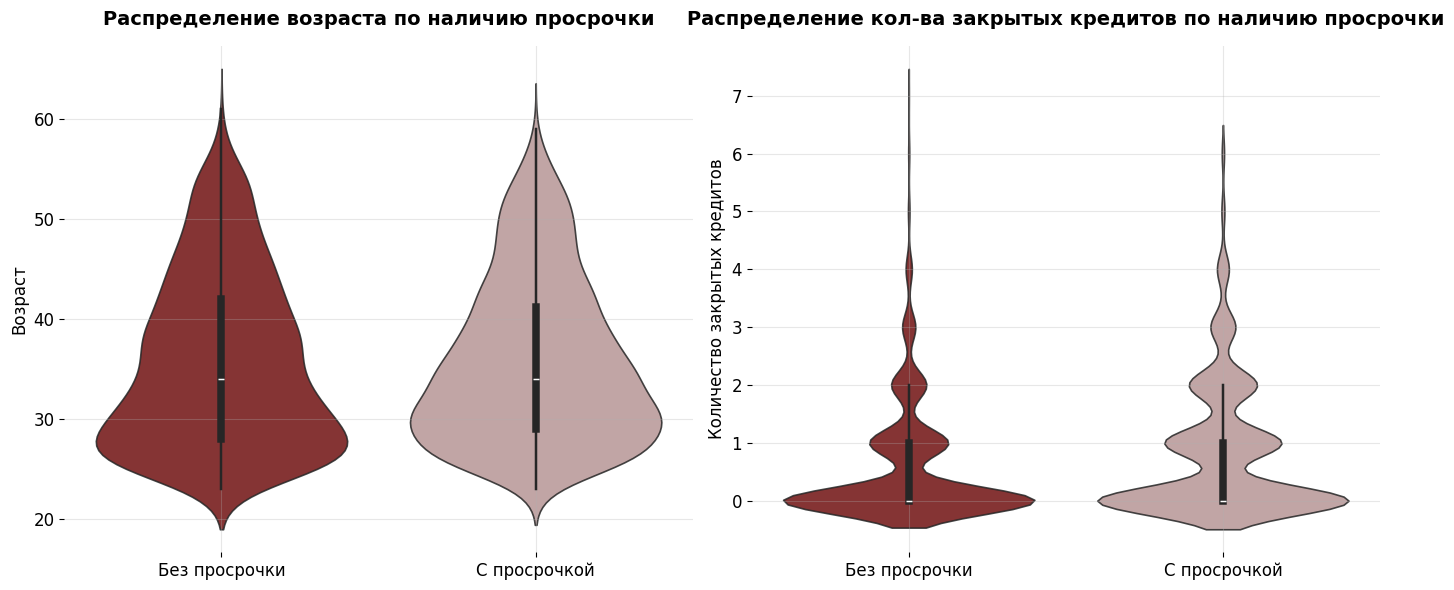

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax in axes:
    ax.set_facecolor('white')

colors = ['#800000', '#BC8F8F']

# График 1 — распределение возраста по наличию просрочки
sns.violinplot(
    data=df,
    x="dlq_exist",
    y="age",
    inner="box",
    palette=colors,
    ax=axes[0],
    linewidth=1.2
)

axes[0].set_title('Распределение возраста по наличию просрочки', fontsize=14, pad=15, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('Возраст', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Без просрочки', 'С просрочкой'])


# График 2 — распределение кол-ва закрытых кредитов по наличию просрочки
sns.violinplot(
    data=df,
    x="dlq_exist",
    y="own_closed",
    inner="box",
    palette=colors,
    ax=axes[1],
    linewidth=1.2
)

axes[1].set_title('Распределение кол-ва закрытых кредитов по наличию просрочки', fontsize=14, pad=15, fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('Количество закрытых кредитов', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Без просрочки', 'С просрочкой'])

for ax in axes:
    ax.grid(axis='x', alpha=0.3, linestyle='-')
    ax.grid(axis='y', alpha=0.3, linestyle='-')
    
    ax.tick_params(axis='both', labelsize=12)
    
    for collection in ax.collections:
        collection.set_alpha(0.85)
    
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()

#### Выводы по графику распределения:
- молодежь реже допускает просрочку по кредитам, чем клиенты в возрасте от 30 лет и старше
- чем больше у клиента закрытых кредитов, тем чаще он сталкивался с проблемой просрочки платежей по ним

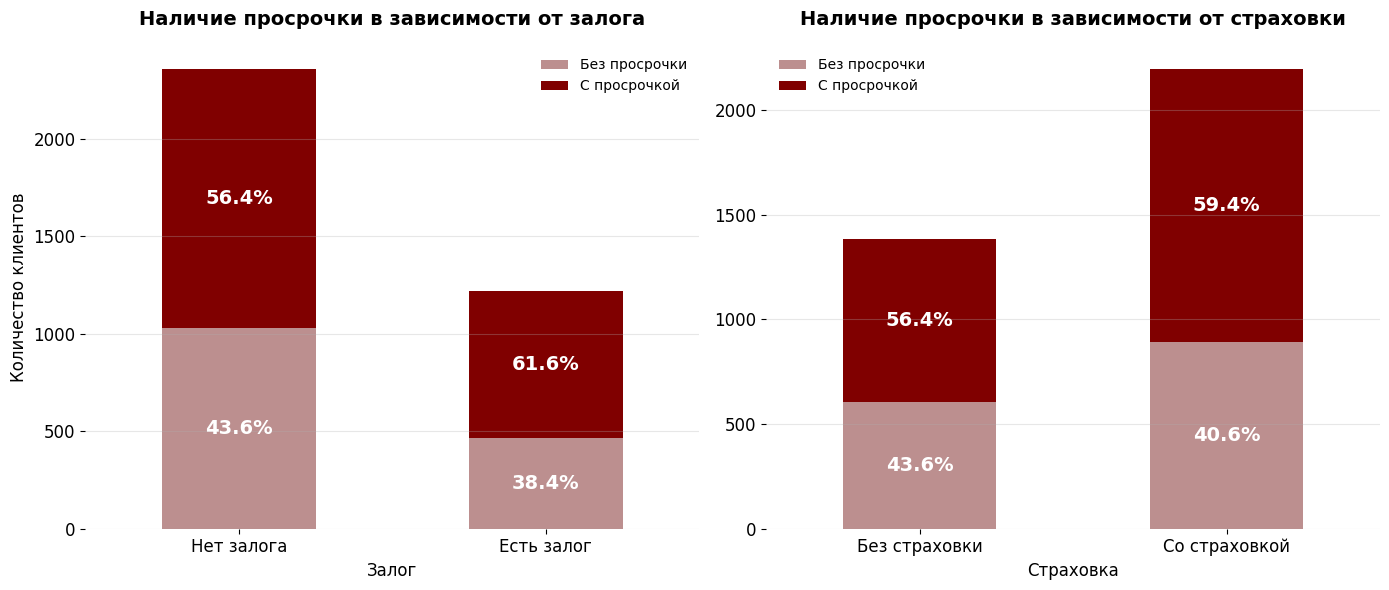

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax in axes:
    ax.set_facecolor('white')

# Гистограмма распределения залог
zalog_dlq = df.groupby(['if_zalog', 'dlq_exist']).size().unstack(fill_value=0)

zalog_dlq.plot(kind='bar', stacked=True, color=['#BC8F8F', '#800000'], ax=axes[0])

axes[0].set_title('Наличие просрочки в зависимости от залога', fontsize=14, pad=15, fontweight='bold')
axes[0].set_xlabel('Залог', fontsize=12)
axes[0].set_ylabel('Количество клиентов', fontsize=12)
axes[0].set_xticklabels(['Нет залога', 'Есть залог'], rotation=0)
axes[0].legend(['Без просрочки', 'С просрочкой'], frameon=False)
axes[0].grid(axis='y', alpha=0.3, linestyle='-')

# Добавляем подписи процентов посередине бара
for i, row in zalog_dlq.iterrows():
    total = row.sum()
    bottom = 0
    for j, value in enumerate(row):
        if value > 0:
            pct = value / total * 100
            axes[0].text(
                x=i, 
                y=bottom + value/2, 
                s=f'{pct:.1f}%', 
                ha='center', 
                va='center',
                color='white',
                fontsize=14,
                fontweight='bold'
            )
        bottom += value

for spine in axes[0].spines.values():
    spine.set_visible(False)


# Гистограмма распределения страховки
insurance_dlq = df.groupby(['INSURANCE_FLAG', 'dlq_exist']).size().unstack(fill_value=0)

insurance_dlq.plot(kind='bar', stacked=True, color=['#BC8F8F', '#800000'], ax=axes[1])

axes[1].set_title('Наличие просрочки в зависимости от страховки', fontsize=14, pad=15, fontweight='bold')
axes[1].set_xlabel('Страховка', fontsize=12)
axes[1].set_xticklabels(['Без страховки', 'Со страховкой'], rotation=0)
axes[1].legend(['Без просрочки', 'С просрочкой'], frameon=False)
axes[1].grid(axis='y', alpha=0.3, linestyle='-')

# Добавляем подписи процентов посередине бара
for i, row in insurance_dlq.iterrows():
    total = row.sum()
    bottom = 0
    for j, value in enumerate(row):
        if value > 0:
            pct = value / total * 100
            axes[1].text(
                x=i, 
                y=bottom + value/2, 
                s=f'{pct:.1f}%', 
                ha='center', 
                va='center',
                color='white',
                fontsize=14,
                fontweight='bold'
            )
        bottom += value

for spine in axes[1].spines.values():
    spine.set_visible(False)

for ax in axes:
    ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

#### Выводы по графику распределения:
- наличие имущества в залоге не останавливает людей от просрочки по кредитам 
- наличие страховки по кредиту так же сподвигает людей чаще просрачивать платежи 

### Риск-профиль клиента
На основе данных по наличию просрочки можно составить риск-профиль клиента. Включим в него основные переменные, характеризующие демографию, финансовое положение, активность счетов и платежную дисциплину.

In [35]:
# Для категориальных переменных считаем моду 
cat_cols = ['INCOME_BASE_TYPE', 'SEX', 'EMPL_SIZE']

# Для бинарных переменных считаем долю 1 в %
binary_cols = ['INSURANCE_FLAG', 'if_zalog']

# Для числовых переменных считаем медиану
num_cols = ['DTI', 'BANKACCOUNT_FLAG', 'age', 'all_credits', 'sum_of_paym_months', 
            'Active_to_All_prc', 'avg_num_delay']

def create_risk_profile(df, group_col='dlq_exist'):
    profile_num = df.groupby(group_col)[num_cols].median()
    profile_bin = df.groupby(group_col)[binary_cols].mean() * 100
    profile_cat = df.groupby(group_col)[cat_cols].agg(lambda x: x.mode()[0])
    
    profile = pd.concat([profile_cat, profile_bin, profile_num], axis=1)
    
    profile[num_cols] = profile[num_cols].round(1)
    profile[binary_cols] = profile[binary_cols].round(1).astype(str) + '%'
    
    profile.index = ['Без просрочки', 'С просрочкой']
    
    return profile

risk_profile = create_risk_profile(df)

# Определяем порядок колонок, как в исходном датасете
columns = [
    'INCOME_BASE_TYPE', 'INSURANCE_FLAG', 'DTI', 'SEX',
    'EMPL_SIZE', 'BANKACCOUNT_FLAG', 'age',
    'avg_num_delay', 'if_zalog', 'Active_to_All_prc', 'sum_of_paym_months', 
    'all_credits']
columns = [col for col in columns if col in risk_profile.columns]

risk_profile = risk_profile[columns]

display(risk_profile)

INCOME_BASE_TYPE INSURANCE_FLAG  DTI  \
Без просрочки           Поступление зарплаты на счет          59.6%  0.4   
С просрочкой   Форма банка (без печати работодателя)          62.6%  0.4   

                   SEX EMPL_SIZE  BANKACCOUNT_FLAG   age  avg_num_delay  \
Без просрочки  женский      >250               0.0  34.0            0.0   
С просрочкой   мужской      >250               0.0  34.0            0.1   

              if_zalog  Active_to_All_prc  sum_of_paym_months  all_credits  
Без просрочки    31.3%                0.4                38.0          3.0  
С просрочкой     36.1%                0.4                88.0          6.0

#### Типичный риск-клиент банка:
- мужчина в возрасте 34 года с зарплатой больше 250 тысяч рублей
- имеет умеренную долговую нагрузку (debt-to-income ratio) 
- имеет 6 кредитов со страховкой и без залога
- не пользуется услугами банка через онлайн-кабинет 
- имеет больше закрытых, чем открытых счетов (60%)
- ежемесячно платит по кредитам почти 90 тысяч рублей

### Проверка качества данных
В таблице с общей статистикой было видно, что минимальные значения в некоторых переменных отрицательные. Посчитаем количество таких значений в каждой переменной.

In [36]:
for col in numeric_cols:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(col, neg_count)

min_MnthAfterLoan 16
max_MnthAfterLoan 1


Мы видим, что значения меньше 0 есть в двух переменных, обозначающих количество месяцев, прошедших с момента выдачи последнего / первого кредита. Посмотрим, что это за конкретные значения.

In [37]:
df.loc[df['min_MnthAfterLoan'] < 0, 'min_MnthAfterLoan'].unique()

array([-1.])

In [38]:
df.loc[df['max_MnthAfterLoan'] < 0, 'max_MnthAfterLoan'].unique()

array([-1.])

Скорее всего, значение -1 в количестве месяцев с последней выдачи кредита означает, что кредит будет выдан клиенту в следующем месяце. 

Проверим данные на отсуствие выбросов и аномальных значений. Все значения возраста клиентов соотвествуют реальным.

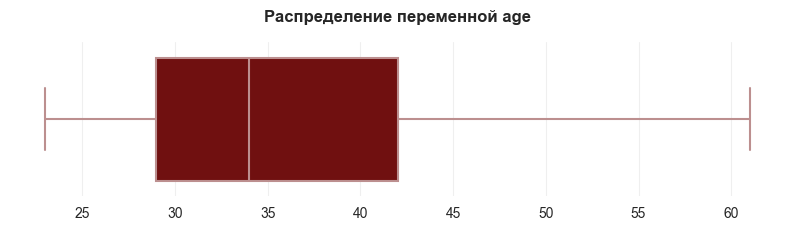

In [39]:
sns.set_style("white")

plt.figure(figsize=(10, 2))
ax = sns.boxplot(
    x=df['age'], 
    color='#800000',  
    linecolor='#BC8F8F', 
    linewidth=1.5
)

plt.xlabel('')
plt.title('Распределение переменной age', fontsize=12, pad=15, fontweight='bold')
plt.grid(axis='x', alpha=0.3, linestyle='-')

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

Проверим, что значения долей находятся в разумных пределах. Среди значений этих двух переменных нет значений <0 и >1. 

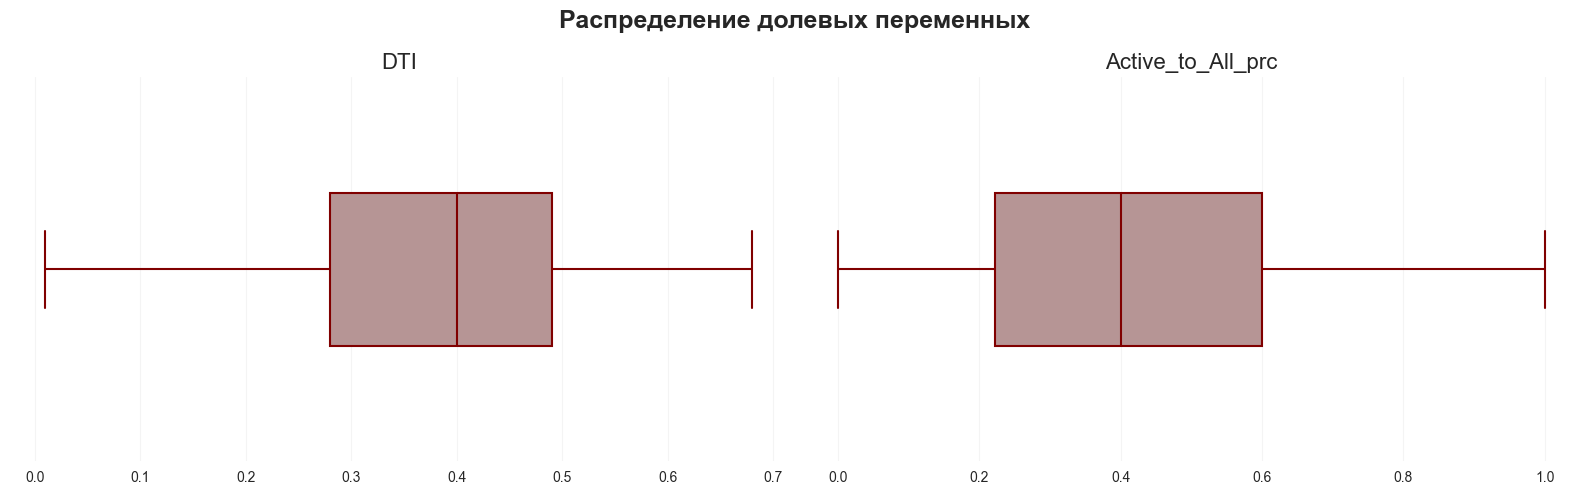

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.set_style("white")
colors = ['#800000', '#DEB887']

# График 1 - DTI
ax1 = axes[0]
ax1.set_facecolor('white')

sns.boxplot(
    x=df['DTI'], 
    ax=ax1,
    color='#BC8F8F',
    linecolor='#800000',
    linewidth=1.5,
    width=0.4,
    fliersize=4
)

ax1.set_title('DTI', fontsize=16)
ax1.set_xlabel('')

for spine in ax1.spines.values():
    spine.set_visible(False)

# График 2 - Active_to_All_prc
ax2 = axes[1]
ax2.set_facecolor('white')

sns.boxplot(
    x=df['Active_to_All_prc'], 
    ax=ax2,
    color='#BC8F8F',
    linecolor='#800000',
    linewidth=1.5,
    width=0.4,
    fliersize=4
)

ax2.set_title('Active_to_All_prc', fontsize=16)
ax2.set_xlabel('')

for spine in ax2.spines.values():
    spine.set_visible(False)

for ax in axes:
    ax.grid(axis='x', alpha=0.2, linestyle='-')
    ax.tick_params(axis='both', labelsize=10)

plt.suptitle('Распределение долевых переменных', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

### Корреляционный анализ количественных переменных
Так как мы уже выяснили, что переменные 'ID' и 'Номер варианта' не содержат непосредственной информации о клиентах, мы можем не включать их в корреляционную матрицу. Постмотрим корреляцию по оставшимся количественным переменным.

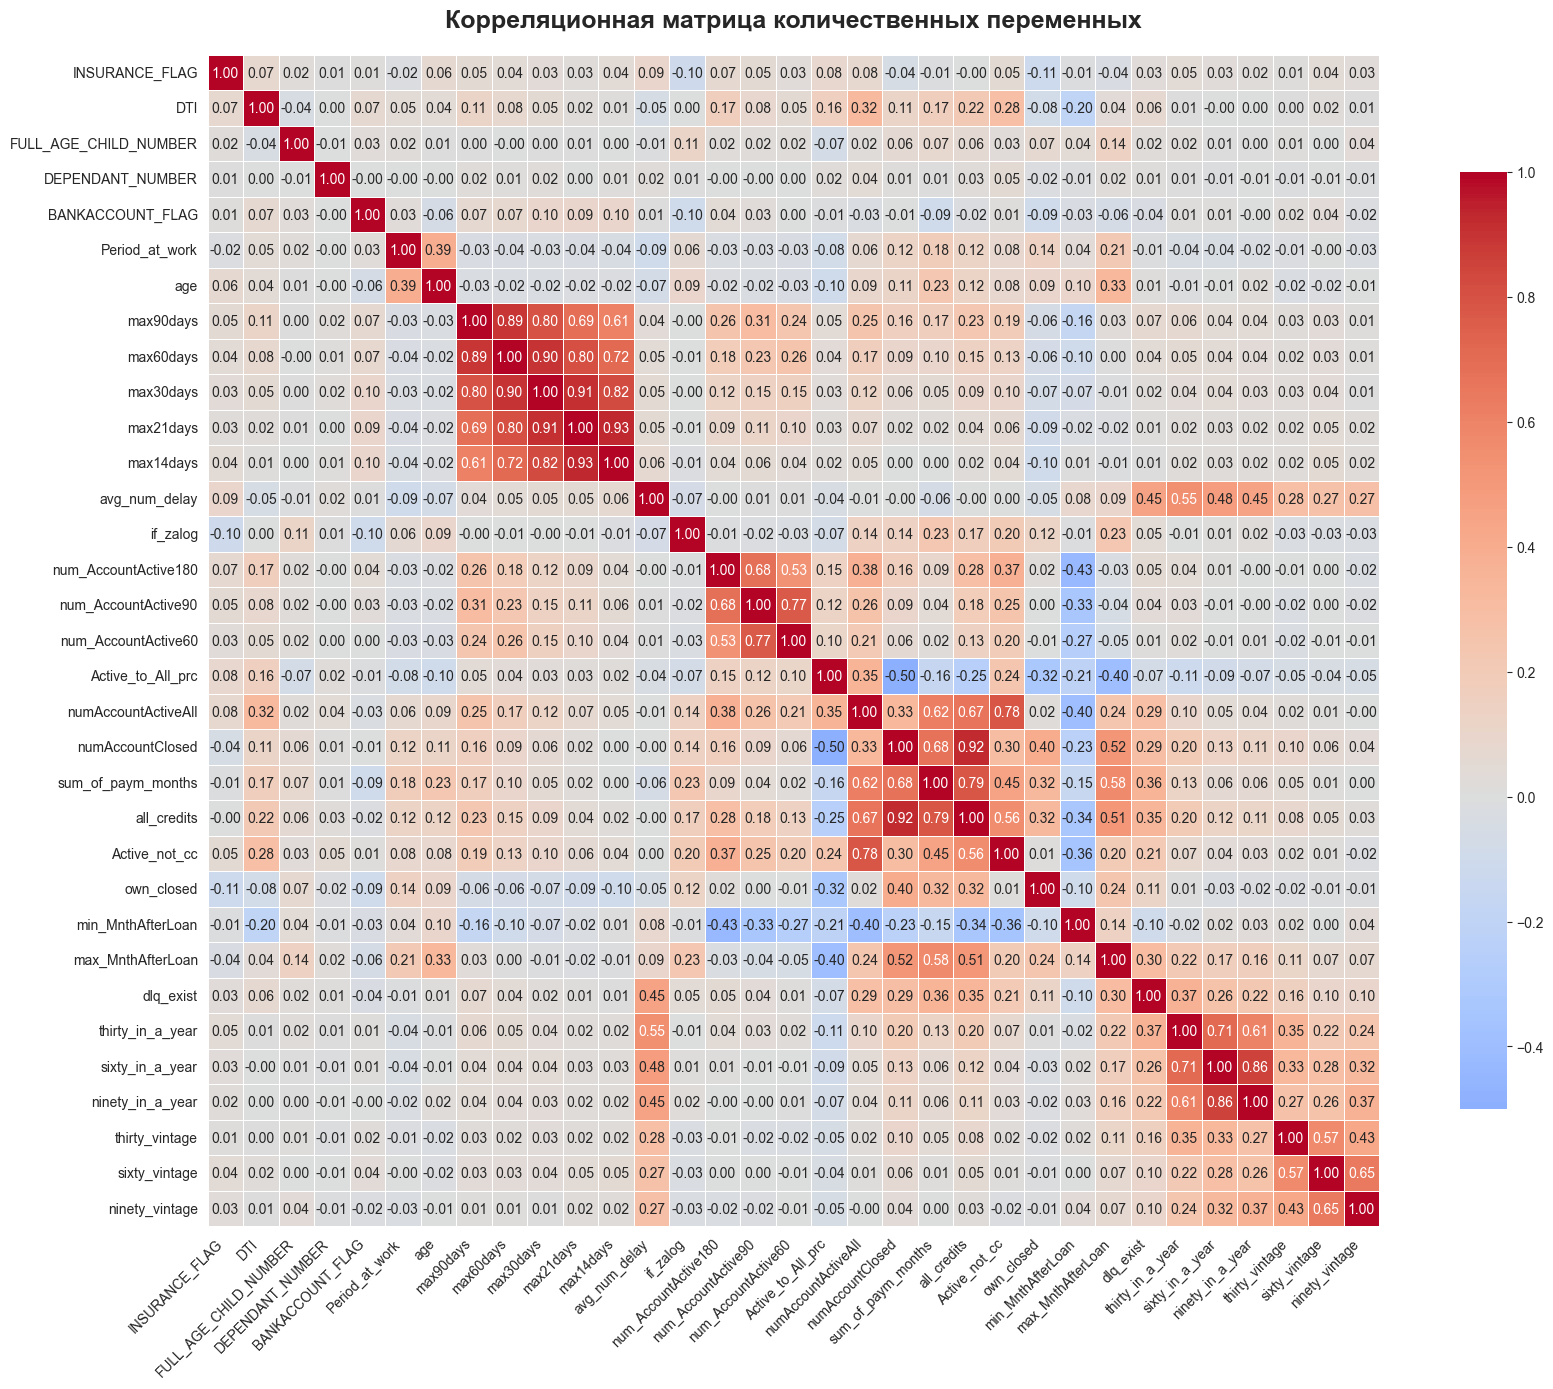

In [41]:
cols_to_exclude = ['ID', 'Номер варианта']
numeric_cols = df.select_dtypes(include=[np.number]).columns


numeric_cols_filtered = [col for col in numeric_cols if col not in cols_to_exclude]


correlation_matrix = df[numeric_cols_filtered].corr()

plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            cbar_kws={"shrink": .8},
            linewidths=0.5,
            linecolor='white')

plt.title('Корреляционная матрица количественных переменных', fontsize=18, pad=20, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Выводы по матрице корреляции:
- сильная корреляция платежей и количества кредитов (они тоже коррелируют между собой) с количеством открытых и закрытых счетов
- количество активных кредитных счетов коррелирует с общим количеством открытых счетов
- стаж работы зависит от возраста человека

Высокая корреляция между количеством запросов в бюро кредитных историй объяснима тем, что эти переменные характеризуют одно и то же, только за разные временные периоды. Аналогичная ситуация с количеством активных счетов и просрочкой. Средняя задержка оплаты, логично, коррелирует с просрочкой в этом году или вообще когда-либо. 

Отрицательная корреляция количества закрытых счетов и доли открытых счетов тоже имеет логическое объяснение, так как количество закрытых счетов заложено в знаменателе для расчета доли.
Также из матрицы видно, что чем больше месяцев прошло с момента последнего взятия кредита, тем больше активных счетов есть у клиента. Эта тенденция объяснима тем, что клиент дольше является клиентом банка и открывает счета под разные цели. 

### Замена значений
Во всех переменных заменяем значения '*n.a.*' на NaN. 

In [42]:
df = df.replace('*n.a.*', np.nan)

В переменной `EMPL_SIZE` есть пересекающиеся значения '>100' и '>=100' - объединим их в одну группу '>=100'.

In [43]:
df['EMPL_SIZE'] = df['EMPL_SIZE'].replace('>100', '>=100')

В переменной `EDUCATION` прописываем значение 'Неполное среднее' с маленькой буквы, чтобы все значения переменной были в одном формате. 

In [44]:
df['EDUCATION'] = df['EDUCATION'].replace('Неполное среднее', 'неполное среднее')

В переменной `EDUCATION` заменяем значение 'Высшее / Второе высшее / Ученая степень' на 'высшее', так как у клиентов из этой группы гарантировано есть хотя бы одно высшее образование.

In [45]:
df['EDUCATION'] = df['EDUCATION'].replace('Высшее/Второе высшее/Ученая степень', 'высшее')

В переменной `CREDIT_PURPOSE` добавляем пробел справа от слэша в значении 'Покупка недвижимости/ строительство', чтобы привести в соответствие с остальными значениями.

In [46]:
df['CREDIT_PURPOSE'] = df['CREDIT_PURPOSE'].replace('Покупка недвижимости/ строительство', 
                                                    'Покупка недвижимости / строительство')

В переменной `EMPL_FORM` переименуем значения 'Иная форма' в 'Другое', как в других переменных.

In [47]:
df['EMPL_FORM'] = df['EMPL_FORM'].replace('Иная форма', 'Другое') 

В переменной `BANKACCOUNT_FLAG` объединим значения 2-4, так как все значения >2 означают, что клиент заходил в онлайн кабинет с другого устройства )

In [48]:
df['BANKACCOUNT_FLAG'] = df['BANKACCOUNT_FLAG'].apply(lambda x: 2 if x > 1 else x)

### Очистка данных и обработка пропусков
Так как столбец 'Номер варианта' является техническими и никак не характеризует клиентов банка, то мы можем удалить его из датасета.

In [49]:
df_clean = df.copy()

In [50]:
df_clean.drop('Номер варианта', axis=1, inplace=True)

Больше 70% строк в источнике имеют пропущенные значения, поэтому для корректной сегментации необходимо обработать эти пропуски. 

In [51]:
def analyze_complete_missing_clients(df_clean, client_id_col=None):
    missing_by_row = df_clean.isna().sum(axis=1)

    print(f"Всего строк в датасете: {len(df_clean)}")
    print(f"Строк без пропусков: {(missing_by_row == 0).sum()} ({(missing_by_row == 0).sum()/len(df_clean)*100:.1f}%)\n")
    
    for threshold in [0.25, 0.5, 0.75, 1.0]:
        threshold_count = (missing_by_row / df_clean.shape[1] >= threshold).sum()
        print(f"Строк с ≥{threshold:.0%} пропусков: {threshold_count} ({threshold_count/len(df_clean)*100:.1f}%)")
    
    return missing_by_row

row_missing_counts = analyze_complete_missing_clients(df_clean)


Всего строк в датасете: 10243
Строк без пропусков: 3551 (34.7%)

Строк с ≥25% пропусков: 6663 (65.0%)
Строк с ≥50% пропусков: 6411 (62.6%)
Строк с ≥75% пропусков: 6 (0.1%)
Строк с ≥100% пропусков: 0 (0.0%)


Проверим характер пропусков в данных - совпадают ли пропущенные значения в разных переменных по строкам (например, по некоторым клиентам вообще нет информации)

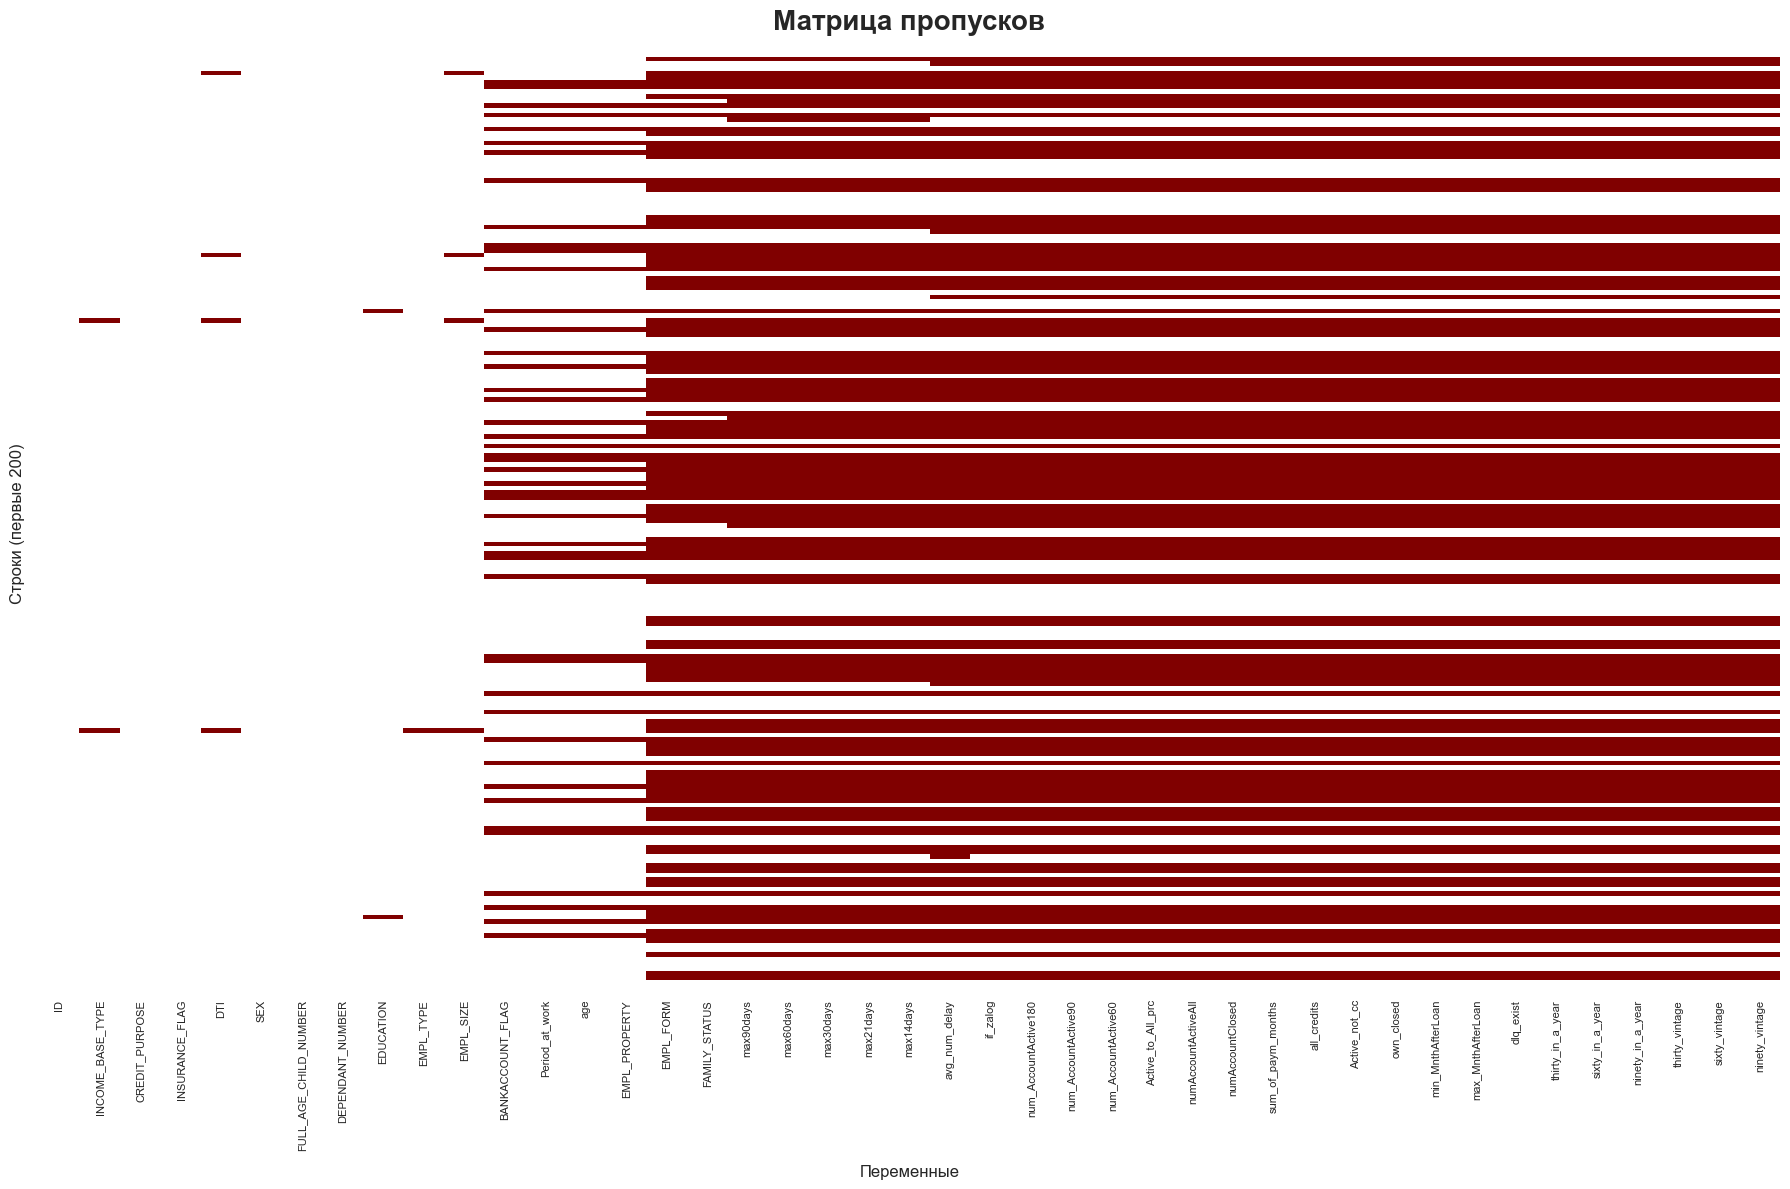

In [52]:
plt.figure(figsize=(18, 12))

sns.heatmap(df_clean.isna().iloc[:200], 
            cbar=False, 
            cmap=['white', '#800000'], 
            yticklabels=False,
            xticklabels=True)

plt.title('Матрица пропусков', fontsize=20, pad=20, fontweight='bold')
plt.xlabel('Переменные', fontsize=12, labelpad=10)
plt.ylabel('Строки (первые 200)', fontsize=12, labelpad=10)

plt.xticks(rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

#### Выводы по матрице пропусков:
- в данных есть систематические пропуски - у большинства клиентов не заполнена существенная часть информации
- у многих клиентов не указана форма компании, семейный статус и кредитная история 

В случае с пропусками в категориальных переменных (форма компании и семейный статус) мы не можем посчитать среднее значение, поэтому правильнее будет удалить эти строки из датасета. 

In [53]:
df_clean = df_clean.dropna(
    subset=['EMPL_FORM', 'FAMILY_STATUS']
)

In [54]:
df_clean.shape

(3883, 43)

После удаления строк, где обе категориальные переменные 'EMPL_FORM' и 'FAMILY_STATUS' пустые, в датасете осталось 3883 строки. Посмотрим, какие еще пропуски в данных остались.

In [55]:
def column_values(df_clean):
    nans_count = df_clean.isna().sum()
    nans_pct = round((nans_count / len(df_clean)) * 100, 1)

    return [nans_count, nans_pct, df_clean.dtypes]

data_with_nans = []
for column in df_clean.columns:
    nan_count = df_clean[column].isna().sum()
    if nan_count > 0: 
        values = column_values(df_clean[column])
        data_with_nans.append([column] + values)

print(tabulate(data_with_nans, 
                   headers=['Column', 'NaNs', '%NaNs', 'Type'], 
                   tablefmt='orgtbl'))

| Column               |   NaNs |   %NaNs | Type    |
|----------------------+--------+---------+---------|
| EDUCATION            |     14 |     0.4 | object  |
| EMPL_SIZE            |      1 |     0   | object  |
| max90days            |     54 |     1.4 | float64 |
| max60days            |     54 |     1.4 | float64 |
| max30days            |     54 |     1.4 | float64 |
| max21days            |     54 |     1.4 | float64 |
| max14days            |     54 |     1.4 | float64 |
| avg_num_delay        |    315 |     8.1 | float64 |
| if_zalog             |    303 |     7.8 | float64 |
| num_AccountActive180 |    303 |     7.8 | float64 |
| num_AccountActive90  |    303 |     7.8 | float64 |
| num_AccountActive60  |    303 |     7.8 | float64 |
| Active_to_All_prc    |    303 |     7.8 | float64 |
| numAccountActiveAll  |    303 |     7.8 | float64 |
| numAccountClosed     |    303 |     7.8 | float64 |
| sum_of_paym_months   |    303 |     7.8 | float64 |
| all_credits          |    

Удалим еще 14 строк, где значение в переменной 'EDUCATION' пустое, так как это категориальный признак.

In [56]:
df_clean = df_clean.dropna(subset=['EDUCATION'])

In [57]:
def column_values(df_clean):
    nans_count = df_clean.isna().sum()
    nans_pct = round((nans_count / len(df_clean)) * 100, 1)

    return [nans_count, nans_pct, df_clean.dtypes]

data_with_nans = []
for column in df_clean.columns:
    nan_count = df_clean[column].isna().sum()
    if nan_count > 0: 
        values = column_values(df_clean[column])
        data_with_nans.append([column] + values)

print(tabulate(data_with_nans, 
                   headers=['Column', 'NaNs', '%NaNs', 'Type'], 
                   tablefmt='orgtbl'))

| Column               |   NaNs |   %NaNs | Type    |
|----------------------+--------+---------+---------|
| max90days            |     54 |     1.4 | float64 |
| max60days            |     54 |     1.4 | float64 |
| max30days            |     54 |     1.4 | float64 |
| max21days            |     54 |     1.4 | float64 |
| max14days            |     54 |     1.4 | float64 |
| avg_num_delay        |    314 |     8.1 | float64 |
| if_zalog             |    302 |     7.8 | float64 |
| num_AccountActive180 |    302 |     7.8 | float64 |
| num_AccountActive90  |    302 |     7.8 | float64 |
| num_AccountActive60  |    302 |     7.8 | float64 |
| Active_to_All_prc    |    302 |     7.8 | float64 |
| numAccountActiveAll  |    302 |     7.8 | float64 |
| numAccountClosed     |    302 |     7.8 | float64 |
| sum_of_paym_months   |    302 |     7.8 | float64 |
| all_credits          |    302 |     7.8 | float64 |
| Active_not_cc        |    302 |     7.8 | float64 |
| own_closed           |    

Согласно обновленной статистике, в источнике остались только количественные переменные с пропущенными значениями. Проанализируем комбинации оставшихся пропусков.

In [58]:
from itertools import combinations

def analyze_missing_patterns(df_clean, top_n=10):
    missing_matrix = df_clean.isna()
    
    patterns = missing_matrix.apply(lambda row: ''.join(['1' if x else '0' for x in row]), axis=1)
    
    pattern_counts = patterns.value_counts()
    
    print(f"Всего уникальных паттернов пропусков: {len(pattern_counts)}")
    
    for i, (pattern, count) in enumerate(pattern_counts.head(top_n).items()):
        percentage = count / len(df_clean) * 100
        missing_cols = missing_matrix.columns[np.array(list(map(int, pattern))) == 1]
        print(f"\nПаттерн {i+1}: {pattern} ({count} строк, {percentage:.1f}%)")
        print(f"Пропуски в колонках: {list(missing_cols)}")
    
    return patterns

patterns = analyze_missing_patterns(df_clean)

Всего уникальных паттернов пропусков: 5

Паттерн 1: 0000000000000000000000000000000000000000000 (3551 строк, 91.8%)
Пропуски в колонках: []

Паттерн 2: 0000000000000000000000111111111111111111111 (252 строк, 6.5%)
Пропуски в колонках: ['avg_num_delay', 'if_zalog', 'num_AccountActive180', 'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months', 'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan', 'max_MnthAfterLoan', 'dlq_exist', 'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage']

Паттерн 3: 0000000000000000011111111111111111111111111 (50 строк, 1.3%)
Пропуски в колонках: ['max90days', 'max60days', 'max30days', 'max21days', 'max14days', 'avg_num_delay', 'if_zalog', 'num_AccountActive180', 'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months', 'all_credits', 'Activ

#### Выводы по анализу паттернов пропусков:
- есть паттерн, при котором все данные по клиенту заполнены
- есть два паттерна, при которых большое количество переменных не заполнены - удалим эти строки из датасета, так как по ним отсуствует большая часть информации
- есть два паттерна, при которых не заполненя отдельные столбцы - заполним их средним значением

In [59]:
pattern2_cols = ['avg_num_delay', 'if_zalog', 'num_AccountActive180', 'num_AccountActive90', 
                 'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll', 
                 'numAccountClosed', 'sum_of_paym_months', 'all_credits', 'Active_not_cc', 
                 'own_closed', 'min_MnthAfterLoan', 'max_MnthAfterLoan', 'dlq_exist', 
                 'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year', 
                 'thirty_vintage', 'sixty_vintage', 'ninety_vintage']

pattern3_cols = ['max90days', 'max60days', 'max30days', 'max21days', 'max14days', 
                 'avg_num_delay', 'if_zalog', 'num_AccountActive180', 'num_AccountActive90', 
                 'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll', 
                 'numAccountClosed', 'sum_of_paym_months', 'all_credits', 'Active_not_cc', 
                 'own_closed', 'min_MnthAfterLoan', 'max_MnthAfterLoan', 'dlq_exist', 
                 'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year', 
                 'thirty_vintage', 'sixty_vintage', 'ninety_vintage']


# Создаем маски для каждого паттерна (все указанные колонки должны быть NaN, остальные - не NaN)
def check_pattern(row, pattern_cols):
    pattern_condition = row[pattern_cols].isna().all()
    return pattern_condition

mask_pattern2 = df_clean.apply(lambda row: check_pattern(row, pattern2_cols), axis=1)
mask_pattern3 = df_clean.apply(lambda row: check_pattern(row, pattern3_cols), axis=1)

df_clean = df_clean[~mask_pattern2 | mask_pattern3]

После удаления строк, где выполняются паттерны 2 и 3, в датасете осталось 3617 строк с небольшим количеством пропусков в количестве запросов в бюро кредитных историй и средней задержке оплаты.

In [60]:
def column_values(df_clean):
    nans_count = df_clean.isna().sum()
    nans_pct = round((nans_count / len(df_clean)) * 100, 1)

    return [nans_count, nans_pct, df_clean.dtypes]

data_with_nans = []
for column in df_clean.columns:
    nan_count = df_clean[column].isna().sum()
    if nan_count > 0: 
        values = column_values(df_clean[column])
        data_with_nans.append([column] + values)

print(tabulate(data_with_nans, 
                   headers=['Column', 'NaNs', '%NaNs', 'Type'], 
                   tablefmt='orgtbl'))

| Column               |   NaNs |   %NaNs | Type    |
|----------------------+--------+---------+---------|
| max90days            |     54 |     1.5 | float64 |
| max60days            |     54 |     1.5 | float64 |
| max30days            |     54 |     1.5 | float64 |
| max21days            |     54 |     1.5 | float64 |
| max14days            |     54 |     1.5 | float64 |
| avg_num_delay        |     62 |     1.7 | float64 |
| if_zalog             |     50 |     1.4 | float64 |
| num_AccountActive180 |     50 |     1.4 | float64 |
| num_AccountActive90  |     50 |     1.4 | float64 |
| num_AccountActive60  |     50 |     1.4 | float64 |
| Active_to_All_prc    |     50 |     1.4 | float64 |
| numAccountActiveAll  |     50 |     1.4 | float64 |
| numAccountClosed     |     50 |     1.4 | float64 |
| sum_of_paym_months   |     50 |     1.4 | float64 |
| all_credits          |     50 |     1.4 | float64 |
| Active_not_cc        |     50 |     1.4 | float64 |
| own_closed           |    

Рассмотрим, какие есть методы обработки пропущенных значений:
- **игнорировать объект или запись**

В некоторых задачах процент пропущенных значений велик (>50%). Можно потерять важные объекты (например, опорные вектора) или «испортить» выборочное распределение. 


- **заполнение пропущенных значений «вручную»**

Нужен очень грамотный эксперт. Полностью «вручную» невозможно реализовать для больших объемов данных. Правила заполнения (импутации) трудно формулировать – проблема полноты, противоречивости, достоверности. 


- **использование глобальной специальной константы типа “unknown”**

Не всеми алгоритмами анализа реализуемо. 


- **импутация «среднего» или «наиболее ожидаемого» значения**

По всей выборке / по страту (срезу) / по классу / по кластеру и т.д. Наиболее популярный метод, но можно «испортить» выборочное распределение. 


- **импутация константным значением**

Все пропуски для переменной заменяются на математическое ожидание или пользовательскую константу или робастные оценки. 


- **импутация псевдослучайным значением в соответствии с распределением**

- **импутация прогнозом (оценкой)**

Только деревья решений (но можно делать свои модели). 


- **для неслучайных пропусков - индикаторные переменные** (одна на все наблюдение / своя для каждой переменной)

В источнике есть бинарные переменные, и заполнить их средним будет некорректно, так как оно даст дробные значения. Правильнее будет в таком случае взять наиболее частое значение переменной - моду. 

In [61]:
columns = ['if_zalog', 'dlq_exist',
               'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year',
               'thirty_vintage', 'sixty_vintage', 'ninety_vintage'
]
for col in columns:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

В датасете еще есть целочисленные переменные, например, количество счетов или обращений в бюро кредитных историй. Заполним пропуски в таких переменных медианой, отражающей типичное значение и менее подверженной выбросам.

In [62]:
columns = ['all_credits', 'Active_not_cc', 'own_closed',
           'max90days', 'max60days', 'max30days', 'max21days', 'max14days', 
           'num_AccountActive180', 'num_AccountActive90', 'num_AccountActive60',
           'numAccountActiveAll', 'numAccountClosed'
]

for col in columns:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

Для заполнения оставшихся пропусков в количественных переменных будем использовать метод импутации среднего значения.

In [63]:
variables = ['avg_num_delay', 'Active_to_All_prc', 'sum_of_paym_months', 
             'min_MnthAfterLoan', 'max_MnthAfterLoan']

for col in variables:
    if col in df_clean.columns:
        mean_val = df_clean[col].mean()
        df_clean[col] = df_clean[col].fillna(mean_val)

### Проверка отсуствия неклиентов банка
Считаем человека клиентом, если у него есть хотя бы один признак взаимодействия с банком, а именно:
- есть банковские счета (numAccountActiveAll > 0 или numAccountClosed > 0)
- есть кредитная история в банке (all_credits > 0 или Active_not_cc > 0 или own_closed > 0)
- есть онлайн-аккаунт (BANKACCOUNT_FLAG > 0)

Если у клиента нет ничего из эого, то он не является клиентов банка, и его следует исключить из датасета. Однако строк с таким пересечением нет, значит, все оставшиеся в источнике люди действительно являются его клиентами. 

In [64]:
filter_condition = (
    (df_clean['numAccountActiveAll'].fillna(0) == 0) &
    (df_clean['numAccountClosed'].fillna(0) == 0) &
    (df_clean['all_credits'].fillna(0) == 0) &
    (df_clean['Active_not_cc'].fillna(0) == 0) &
    (df_clean['own_closed'].fillna(0) == 0) &
    (df_clean['BANKACCOUNT_FLAG'].fillna(0) == 0)
)
filtered_rows = df_clean[filter_condition]
print(f"Найдено неклиентов банка: {len(filtered_rows)}")

Найдено неклиентов банка: 0


### Составление портрета клиента
Определим наиболее часто встречающиеся значения по каждой переменной и по этим модам составим портрет типичного клиента банка.

In [65]:
print(f"{'Переменная':30} | {'Мода':40}")
print("-" * 70)

for col in df_clean.columns:
    mode_value = df_clean[col].mode().iloc[0]
    
    if pd.isna(mode_value):
        display_value = "NaN"
    else:
        display_value = str(mode_value)
    
    print(f"{col:30} | {display_value:40}")

Переменная                     | Мода                                    
----------------------------------------------------------------------
ID                             | 1000050                                 
INCOME_BASE_TYPE               | Поступление зарплаты на счет            
CREDIT_PURPOSE                 | Ремонт                                  
INSURANCE_FLAG                 | 1                                       
DTI                            | 0.59                                    
SEX                            | мужской                                 
FULL_AGE_CHILD_NUMBER          | 0                                       
DEPENDANT_NUMBER               | 0                                       
EDUCATION                      | высшее                                  
EMPL_TYPE                      | специалист                              
EMPL_SIZE                      | >250                                    
BANKACCOUNT_FLAG               | 0.0     

Распределение категориальных переменных после очистки данных и заполнения пропусков существенно не изменилось, за исключением размера зарплаты клиентов: в датасете осталось только два значения (больше 250 тысяч рублей и меньше 50 тысяч рублей), которые итак вместе составляли в исходной выборке почти 80%.

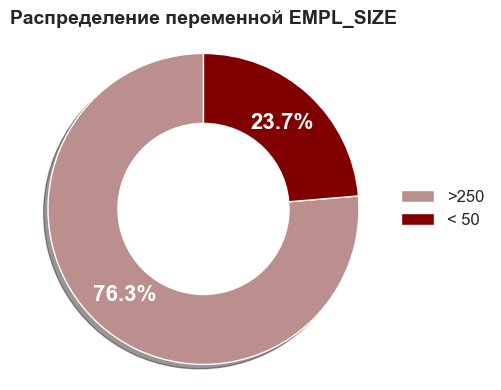

In [66]:
fig, ax = plt.subplots(figsize=(5, 4))

var = 'EMPL_SIZE'
colors = ['#BC8F8F', '#800000']

counts = df_clean[var].value_counts()

wedges, texts, autotexts = ax.pie(
    counts.values, 
    colors=colors[:len(counts)], 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=90,
    textprops={'color': 'white', 'fontsize': 16, 'fontweight': 'bold'},
    pctdistance=0.75
)

centre_circle = plt.Circle((0, 0), 0.55, fc='white')
ax.add_artist(centre_circle)

ax.set_title(f'Распределение переменной {var}', fontsize=14, pad=10, fontweight='bold')

ax.legend(counts.index, fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

ax.axis('equal')
plt.tight_layout()
plt.show()

### Преобразование категориальных признаков
Для дальнейшей работы с категориальными переменными необходимо привести их числовому виду. Для этого будем использовать три метода: 
- `бинарное преобразование` для переменной 'SEX'

Так как есть только два уникальных значения.

- `ordinal encoding` для переменной 'EDUCATION'

Так как нужно сохранить порядок значений.

- `one-hot encoding` для переменных 'INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'EMPL_TYPE', 'EMPL_SIZE', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS'

Так как для этих переменных неважен порядок.

In [67]:
df_clean['SEX'] = df_clean['SEX'].map({
    'женский': 0,
    'мужской': 1
})

In [68]:
education_map = {
    'Неполное среднее': 1,
    'среднее': 2,
    'среднее-специальное': 3,
    'незаконченное высшее': 4,
    'высшее': 5,
    'второе высшее': 6,
    'Высшее/Второе высшее/Ученая степень': 6,
    'ученая степень': 7
}

df_clean['EDUCATION'] = df_clean['EDUCATION'].map(education_map)

In [69]:
columns = ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'FAMILY_STATUS',
           'EMPL_TYPE', 'EMPL_SIZE', 'EMPL_PROPERTY', 'EMPL_FORM']

df_clean = pd.get_dummies(
    df_clean,
    columns=columns,
    drop_first=False
)

### Итоговая витрина данных
После обработки данных витрина для дальнейшей сегментации выглядит следующим образом.

In [70]:
df_clean.shape

(3617, 78)

In [71]:
df_clean.head(10)

ID  INSURANCE_FLAG   DTI  SEX  FULL_AGE_CHILD_NUMBER  \
2   1000050               1  0.31    0                      0   
7   1000150               0  0.47    1                      0   
9   1000190               1  0.43    0                      2   
11  1000230               1  0.49    0                      0   
13  1000270               1  0.45    1                      0   
14  1000290               1  0.25    1                      0   
17  1000350               1  0.23    1                      0   
22  1000450               1  0.22    0                      1   
23  1000470               1  0.36    0                      0   
24  1000490               1  0.59    0                      1   

    DEPENDANT_NUMBER  EDUCATION  BANKACCOUNT_FLAG  Period_at_work   age  \
2                  0        4.0               2.0            18.0  24.0   
7                  0        5.0               0.0            29.0  32.0   
9                  0        2.0               2.0            16.0  40.0   
11                 0        5.0               0.0            29.0  25.0   
13                 0        4.0               0.0           109.0  34.0   
14                 0        5.0               0.0             8.0  31.0   
17                 0        3.0               0.0           245.0  46.0   
22                 0        5.0               0.0           115.0  43.0   
23                 0        5.0               0.0             6.0  25.0   
24                 0        5.0               1.0            27.0  38.0   

    max90days  max60days  max30days  max21days  max14days  avg_num_delay  \
2         6.0        5.0        5.0        5.0        5.0       0.000000   
7         3.0        2.0        1.0        1.0        1.0       0.064748   
9         1.0        1.0        0.0        0.0        0.0       0.062406   
11        0.0        0.0        0.0        0.0        0.0       0.137255   
13        1.0        1.0        0.0        0.0        0.0       0.047619   
14        7.0        6.0        6.0        5.0        4.0       0.186441   
17        2.0        2.0        0.0        0.0        0.0       0.380783   
22        4.0        1.0        1.0        0.0        0.0       0.057692   
23        0.0        0.0        0.0        0.0        0.0       0.000000   
24        1.0        1.0        1.0        0.0        0.0       0.000000   

    if_zalog  num_AccountActive180  num_AccountActive90  num_AccountActive60  \
2        0.0                   1.0                  0.0                  0.0   
7        0.0                   0.0                  0.0                  0.0   
9        0.0                   0.0                  0.0                  0.0   
11       0.0                   2.0                  0.0                  0.0   
13       0.0                   0.0                  0.0                  0.0   
14       0.0                   0.0                  0.0                  0.0   
17       0.0                   0.0                  0.0                  0.0   
22       0.0                   1.0                  0.0                  0.0   
23       0.0                   0.0                  0.0                  0.0   
24       0.0                   0.0                  0.0                  0.0   

    Active_to_All_prc  numAccountActiveAll  numAccountClosed  \
2            1.000000                  1.0               0.0   
7            0.300000                  3.0               7.0   
9            0.427058                  2.0               3.0   
11           0.428571                  3.0               4.0   
13           0.000000                  0.0               2.0   
14           0.666667                  4.0               2.0   
17           0.066667                  1.0              14.0   
22           0.428571                  3.0               4.0   
23           0.500000                  1.0               1.0   
24           0.333333                  1.0               2.0   

    sum_of_paym_months  all_credits  Active_

## Часть 2. Сегментация клиентов банка

Для начала рассмотрим все способы сегментации и определим наиболее подходящие для решения нашей задачи:
- `Бизнес-правила`

Подойдет для сегментации по количеству кредитов, DTI, наличию залога или страховки. Будем использовать его для первичной сегментации, чтобы выделить базовые группы клиентов.


- `Квантили (RFM)`

Можно применить для числовых признаков, отражающих активность и платежеспособность клиентов (all_credits, sum_of_paym_months, Active_to_All_prc, avg_num_delay). Хорошо подходит для выделения реально ценных и рисковых клиентов исходя из их платежной активности. 


- `Кластеризация без учителя` (метод K-средних, EM алгоритм)

Позволит выделить однородные кластеры, минимизируя внутрикластерное расхождение и увеличивая различие между кластерами. 


- `Кластеризация с учителем` (дерево решений, градиентный бустинг)

Можно использовать бинарную переменную наличия просрочки, чтобы сегментировать клиентов с учетом риска дефолта и выделить сегменты, где вероятность просрочки разная (с учетом признаков возраста, DTI, кредитной нагрузки).

### Сегментация на основе метода 'Бизнес-правила'
**Цель:** выделить сегменты клиентов на основе очевидных и логически интерпретируемых признаков, по которым банк может различать клиентов.

**Шаги действий:**
- определить перечень бизнес-правил - категорий по ключевым переменным, характеризующим банковскую активность клиента
- создать для каждого логического правила новый столбец с выделенными категориями 
- посчитать долю клиентов в каждой выделенной группе
- составить комбинации бизнес-правил
- посчитать частоту каждого сегмента

**Признаки для сегментации:**
- `DTI` — ключевой показатель долговой нагрузки

Разделяем клиентов на группы по долговой нагрузке: низкая (квантиль 33%) / средняя () / высокая (квантиль 66%).


- `all_credits` — количество кредитов напрямую определяет кредитную нагрузку клиента

Разделяем клиентов на группы по количеству кредитов: 1–3 / 4–10 / >10.


- `sum_of_paym_months` — ежемесячный платеж отражает реальную нагрузку

Разделяем клиентов на группы по количеству кредитов: маленький (квантиль 33%) / средний / большой (квантиль 66%). 


- `age` — возраст клиента влияет на платежеспособность и склонность к кредитам

Разделяем клиентов на возрастные группы: <30 / 30–40 / >40.


- `INCOME_BASE_TYPE` — подтвержденный доход снижает вероятность возникновения риска

Категориальный признак, который мы объединяем обратно в один столбец со значениями: 2НДФЛ / Поступление зарплаты на счет / Свободная форма с печатью работодателя / Форма банка (без печати работодателя).


- `BANKACCOUNT_FLAG` - отражает активность клиента в банке

Числовой признак со значениями 0 / 1 / 2.


- `dlq_exists` - наличие текущей просрочки является основным критерием риска 

Бинарный признак со значениями 0 / 1.


- `INSURANCE_FLAG` — наличие страховки снижает риски для банка

Бинарный признак со значениями 0 / 1.

- `if_zalog` — наличие залога снижает кредитный риск 

Бинарный признак со значениями 0 / 1.

In [72]:
df_segments = df_clean.copy()

### Преобразование переменных в категории

In [73]:
# DTI
df_segments['DTI_group'] = pd.qcut(df_segments['DTI'], q=3,
                                   labels=['низкая нагрузка', 'средняя нагрузка', 'высокая нагрузка'])

# Количество кредитов
df_segments['all_credits_group'] = pd.cut(df_segments['all_credits'],
                                 bins=[0, 4, 10, np.inf],
                                 labels=['1-3', '4-10', '>10'])

# Ежемесячный платеж
df_segments['sum_of_paym_months_group'] = pd.qcut(df_segments['sum_of_paym_months'], 3,
                               labels=['маленький платеж', 'средний платеж', 'большой платеж'])

# Возраст
df_segments['age_group'] = pd.cut(df_segments['age'],
                             bins=[-np.inf, 30, 40, np.inf],
                             labels=['<30', '30-40', '>40'])

# Подтверждение дохода
income_cols = [col for col in df_segments.columns if col.startswith('INCOME_BASE_TYPE_')]

def get_income_base_type(row):
    for col in income_cols:
        if row[col] == 1:
            return col.replace('INCOME_BASE_TYPE_', '')

df_segments['INCOME_BASE_TYPE'] = df_segments.apply(get_income_base_type, axis=1)

# Бинарные и числовые признаки оставляем как есть
df_segments['dlq_exists'] = df_segments['dlq_exist']
df_segments['BANKACCOUNT_FLAG'] = df_segments['BANKACCOUNT_FLAG']
df_segments['INSURANCE_FLAG'] = df_segments['INSURANCE_FLAG']
df_segments['if_zalog'] = df_segments['if_zalog']

In [74]:
df_segments.head(5)

ID  INSURANCE_FLAG   DTI  SEX  FULL_AGE_CHILD_NUMBER  \
2   1000050               1  0.31    0                      0   
7   1000150               0  0.47    1                      0   
9   1000190               1  0.43    0                      2   
11  1000230               1  0.49    0                      0   
13  1000270               1  0.45    1                      0   

    DEPENDANT_NUMBER  EDUCATION  BANKACCOUNT_FLAG  Period_at_work   age  \
2                  0        4.0               2.0            18.0  24.0   
7                  0        5.0               0.0            29.0  32.0   
9                  0        2.0               2.0            16.0  40.0   
11                 0        5.0               0.0            29.0  25.0   
13                 0        4.0               0.0           109.0  34.0   

    max90days  max60days  max30days  max21days  max14days  avg_num_delay  \
2         6.0        5.0        5.0        5.0        5.0       0.000000   
7         3.0        2.0        1.0        1.0        1.0       0.064748   
9         1.0        1.0        0.0        0.0        0.0       0.062406   
11        0.0        0.0        0.0        0.0        0.0       0.137255   
13        1.0        1.0        0.0        0.0        0.0       0.047619   

    if_zalog  num_AccountActive180  num_AccountActive90  num_AccountActive60  \
2        0.0                   1.0                  0.0                  0.0   
7        0.0                   0.0                  0.0                  0.0   
9        0.0                   0.0                  0.0                  0.0   
11       0.0                   2.0                  0.0                  0.0   
13       0.0                   0.0                  0.0                  0.0   

    Active_to_All_prc  numAccountActiveAll  numAccountClosed  \
2            1.000000                  1.0               0.0   
7            0.300000                  3.0               7.0   
9            0.427058                  2.0               3.0   
11           0.428571                  3.0               4.0   
13           0.000000                  0.0               2.0   

    sum_of_paym_months  all_credits  Active_not_cc  own_closed  \
2             3.000000          1.0            1.0         0.0   
7           130.000000         10.0            1.0         1.0   
9            82.631904          5.0            1.0         0.0   
11           44.000000          7.0            2.0         0.0   
13           20.000000          2.0            0.0         1.0   

    min_MnthAfterLoan  max_MnthAfterLoan  dlq_exist  thirty_in_a_year  \
2            3.000000           3.000000        0.0               0.0   
7            9.000000          86.000000        1.0               1.0   
9           13.763947          61.633866        1.0               0.0   
11           3.000000          38.000000        1.0               1.0   
13          19.000000         101.000000        1.0               0.0   

    sixty_in_a_year  ninety_in_a_year  thirty_vintage  sixty_vintage  \
2               0.0               0.0             0.0            0.0   
7               0.0               0.0             0.0            0.0   
9               0.0               0.0             0.0            0.0   
11              0.0               0.0             0.0            0.0   
13              0.0               0.0             0.0            0.0   

    ninety_vintage  INCOME_BASE_TYPE_2НДФЛ  \
2              0.0                    True   
7              0.0                   False   
9              0.0                    True   
11             0.0                    True   
13             0.0                   False   

    INCOME_BASE_TYPE_Поступление зарплаты на счет  \
2                                           False   
7                                           False   
9                                           False   
11                                          False   
13                               

### Визуализация распределения клиентов по категориям

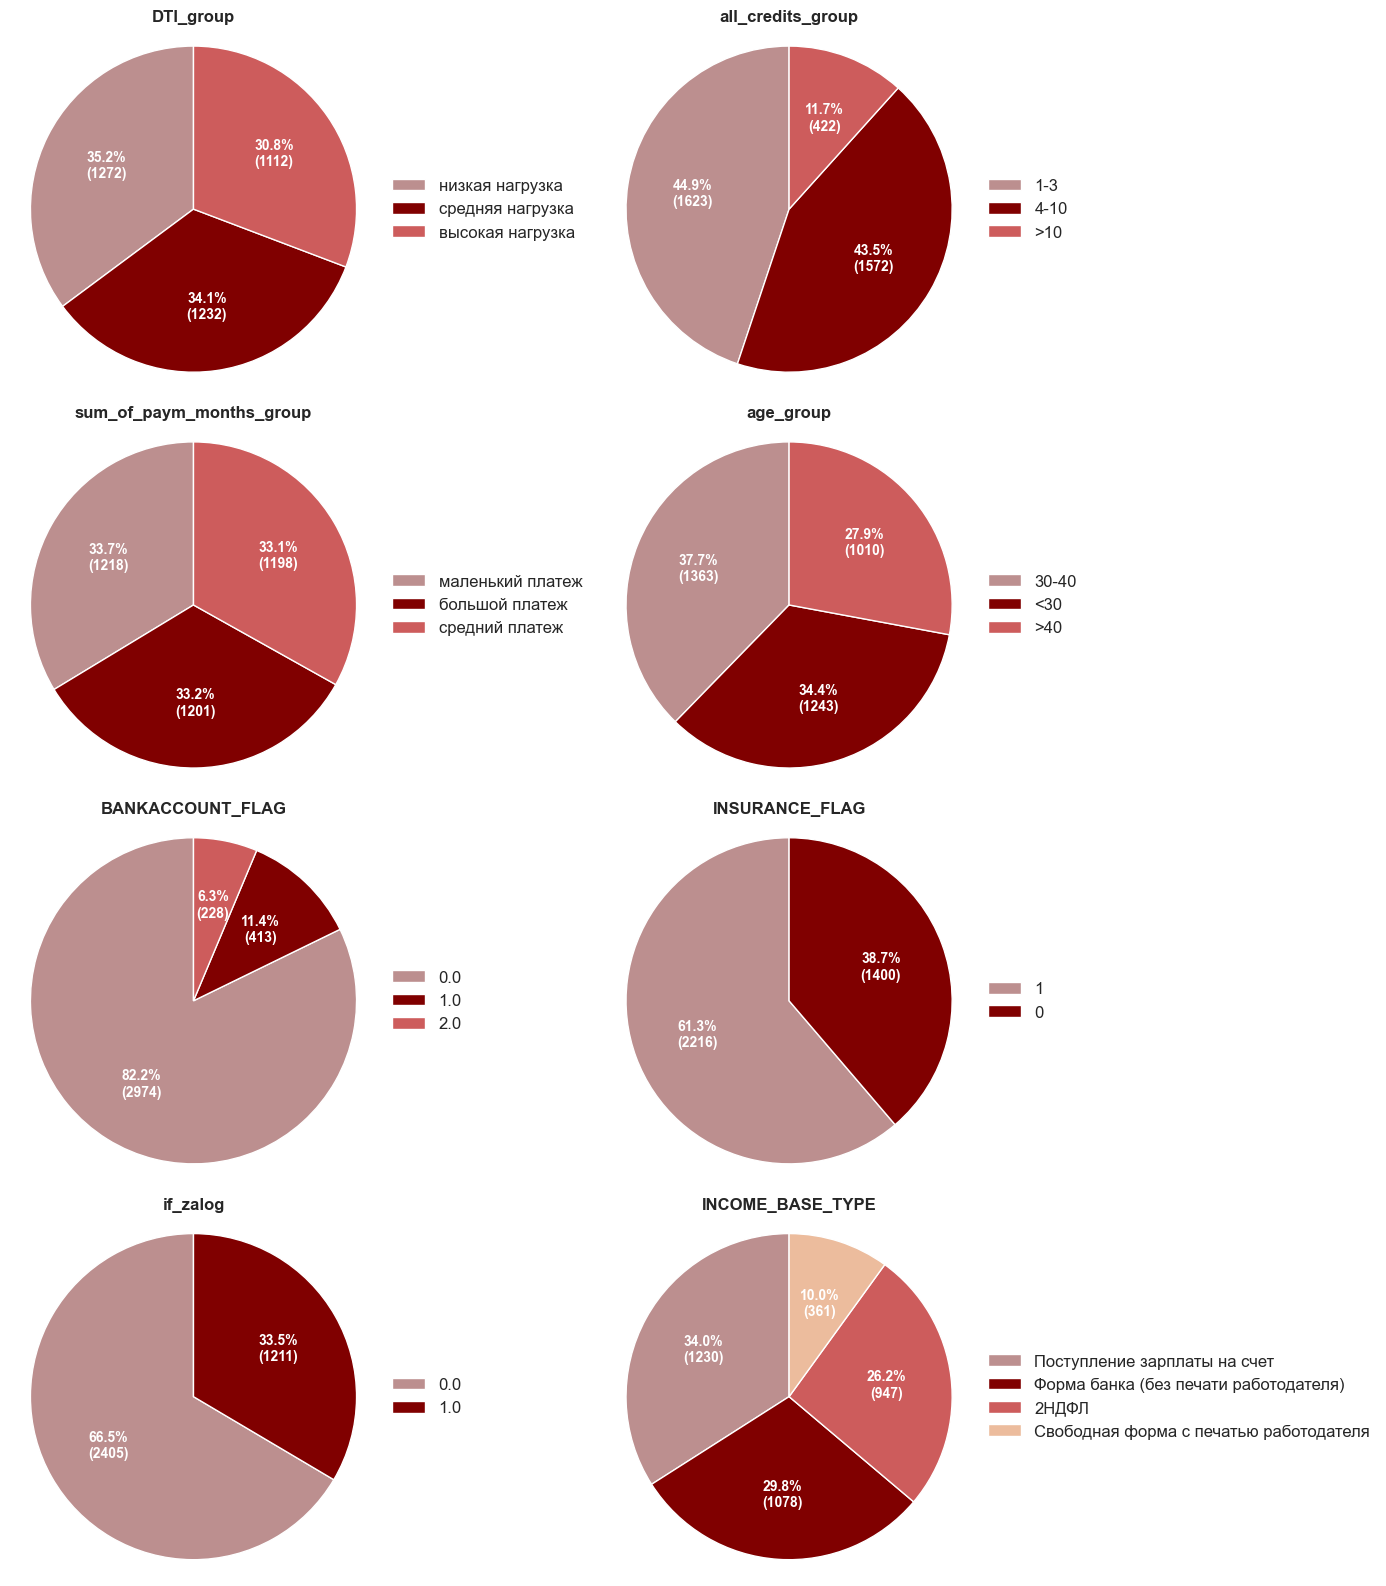

In [75]:
colors = ['#BC8F8F', '#800000', '#CD5C5C', '#ECBC9D']

columns = ['DTI_group', 'all_credits_group', 'sum_of_paym_months_group', 'age_group',
           'BANKACCOUNT_FLAG', 'INSURANCE_FLAG', 'if_zalog', 'INCOME_BASE_TYPE']

n = len(columns)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 4))
axes = axes.flatten()

for i, var in enumerate(columns):
    counts = df_segments[var].value_counts()

    wedges, texts, autotexts = axes[i].pie(
        counts.values,
        colors=colors[:len(counts)],
        autopct=lambda p: f'{p:.1f}%\n({int(p*counts.sum()/100)})',
        startangle=90,
        textprops={'color': 'white', 'fontsize': 10, 'fontweight': 'bold'}
    )

    axes[i].set_title(var, fontsize=12, fontweight='bold')
    axes[i].axis('equal')

    axes[i].legend(
        counts.index,
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        fontsize=12,
        frameon=False
    )

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=1.2)
plt.show()

Чтобы не получить слишком мелкие сегменты, мы выделим несколько ключевых признаков из созданных бизнес-правил. Для этого проверим, что признаки не описывают одно и то же поведение клиента, то есть не коррелируют между собой. Остальные категории будем использовать для описания сегментов, а не для их построения. 

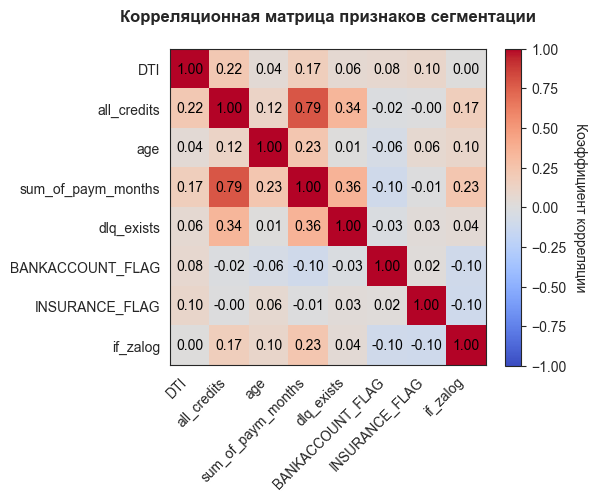

In [76]:
columns = [ 'DTI', 'all_credits', 'age', 'sum_of_paym_months', 'dlq_exists', 
           'BANKACCOUNT_FLAG', 'INSURANCE_FLAG', 'if_zalog']

corr_df_segments = df_segments[columns]
corr_matrix = corr_df_segments.corr()

fig, ax = plt.subplots(figsize=(6, 5))

im = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Коэффициент корреляции', rotation=270, labelpad=15)

ax.set_xticks(range(len(columns)))
ax.set_yticks(range(len(columns)))
ax.set_xticklabels(columns, rotation=45, ha='right')
ax.set_yticklabels(columns)

for i in range(len(columns)):
    for j in range(len(columns)):
        value = corr_matrix.iloc[i, j]
        ax.text(j, i, f"{value:.2f}", ha="center", va="center", fontsize=10, color='black')

ax.set_title('Корреляционная матрица признаков сегментации',
             fontsize=12, pad=20, fontweight='bold')

plt.tight_layout()
plt.show()

### Выводы по матрице корреляции:
- переменные количества кредитов и ежемесячного платежа сильно коррелируют между собой (коэффициент 0.79)
- остальные переменные коррелируют не так сильно (коэффициент 0.34 и ниже)

### Объединение групп для сегментации клиентов
Ядро сегментации будут составлять 3 признака: 
- DTI_group - долговая нагрузка
- all_credits_group - количество кредитов
- age - возраст

In [77]:
df_segments['business_segment'] = (
    df_segments['DTI_group'].astype(str) + ' / ' +
    df_segments['all_credits_group'].astype(str) + ' / ' +
    df_segments['age_group'].astype(str)
)

Смотрим, какие сегменты существуют для наших данных, и какие из них значимы (имеют большую долю клиентов).

In [78]:
segment_counts = (
    df_segments['business_segment']
    .value_counts()
    .reset_index()
)

segment_counts.columns = ['segment', 'clients_cnt']
segment_counts['share_%'] = (
    segment_counts['clients_cnt'] / segment_counts['clients_cnt'].sum() * 100
).round(1)

In [79]:
segment_counts.shape

(27, 3)

#### Выводы по сегментам:
- всего было выделено 27 сегментов
- доля клиентов в каждой группе не превышает 7,5% (270 человек)
- редкие сегменты (<4,7% клиентов) можно объединить в один общий сегмент - 'Другие'

In [80]:
segment_counts['share_%'] = (segment_counts['clients_cnt'] / segment_counts['clients_cnt'].sum() * 100).round(1)

threshold = 4.7

segment_counts['business_segment_grouped'] = segment_counts.apply(
    lambda row: row['segment'] if row['share_%'] >= threshold else 'Другие',
    axis=1
)

final_segments = (
    segment_counts
    .groupby('business_segment_grouped', as_index=False)
    .agg({'clients_cnt': 'sum'})
)

final_segments['share_%'] = (final_segments['clients_cnt'] / final_segments['clients_cnt'].sum() * 100).round(1)
final_segments = final_segments.sort_values(by='share_%', ascending=False).reset_index(drop=True)
final_segments


business_segment_grouped  clients_cnt  share_%
0                           Другие         1699     47.0
1      низкая нагрузка / 1-3 / <30          268      7.4
2    низкая нагрузка / 1-3 / 30-40          260      7.2
3     средняя нагрузка / 1-3 / <30          223      6.2
4  высокая нагрузка / 4-10 / 30-40          213      5.9
5   низкая нагрузка / 4-10 / 30-40          210      5.8
6  средняя нагрузка / 4-10 / 30-40          202      5.6
7    средняя нагрузка / 4-10 / <30          187      5.2
8      низкая нагрузка / 1-3 / >40          179      4.9
9   средняя нагрузка / 1-3 / 30-40          176      4.9

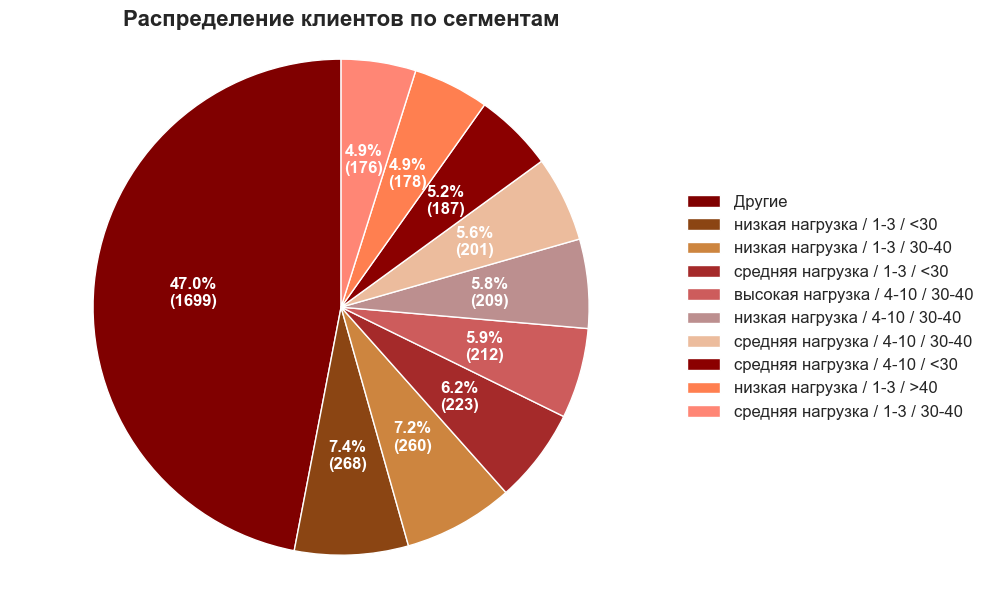

In [81]:
colors = ['#800000', '#8B4513', '#CD853F', '#A52A2A','#CD5C5C', 
          '#BC8F8F', '#ECBC9D', '#8B0000', '#FF7F50', '#FF8675']

fig, ax = plt.subplots(figsize=(10, 6))

wedges, texts, autotexts = ax.pie(
    final_segments['clients_cnt'],
    labels=None,
    colors=colors * (len(final_segments) // len(colors) + 1), 
    autopct=lambda p: f'{p:.1f}%\n({int(p*final_segments["clients_cnt"].sum()/100)})',
    startangle=90,
    textprops={'color': 'white', 'fontsize': 12, 'fontweight': 'bold'}
)

ax.set_title('Распределение клиентов по сегментам', fontsize=16, fontweight='bold')
ax.axis('equal')

ax.legend(
    final_segments['business_segment_grouped'],
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=12,
    frameon=False
)

plt.tight_layout()
plt.show()

#### Выводы по сегментации клиентов
- большинство клиентов относятся к сегменту 'Другие' (1700 человек), но их доля составляет меньше 50%
- наиболее популярным выступает сегмент с молодежью с низким DTI и количеством кредитов от 1 до 3 

### Профилирование сегментов
Для каждого сегмента рассчитаем медианные и средние значения по ключевым признакам:
- DTI
- all_credits
- sum_of_paym_months
- dlq_exists
- age
- BANKACCOUNT_FLAG
- INSURANCE_FLAG
- if_zalog
- INCOME_BASE_TYPE

In [82]:
columns = ['DTI', 'all_credits', 'sum_of_paym_months', 'age', 
                    'dlq_exists', 'BANKACCOUNT_FLAG', 'INSURANCE_FLAG', 'if_zalog']
    
df_segments = df_segments.merge(
    segment_counts[['segment', 'business_segment_grouped']],
    left_on='business_segment',
    right_on='segment',
    how='left'
)

segment_profile = df_segments.groupby('business_segment_grouped')[columns].agg(['median', 'mean']).reset_index()
segment_profile

business_segment_grouped    DTI           all_credits            \
                                   median      mean      median      mean   
0                           Другие  0.490  0.444956         6.0  7.367863   
1  высокая нагрузка / 4-10 / 30-40  0.550  0.546761         7.0  7.323944   
2    низкая нагрузка / 1-3 / 30-40  0.230  0.227000         3.0  2.546154   
3      низкая нагрузка / 1-3 / <30  0.245  0.236455         2.0  2.235075   
4      низкая нагрузка / 1-3 / >40  0.240  0.233966         3.0  2.703911   
5   низкая нагрузка / 4-10 / 30-40  0.250  0.238048         6.0  6.876190   
6   средняя нагрузка / 1-3 / 30-40  0.415  0.410398         3.0  2.636364   
7     средняя нагрузка / 1-3 / <30  0.410  0.410448         2.0  2.457399   
8  средняя нагрузка / 4-10 / 30-40  0.410  0.410891         7.0  7.202970   
9    средняя нагрузка / 4-10 / <30  0.430  0.422299         6.0  6.727273   

  sum_of_paym_months                age            dlq_exists            \
              median        mean median       mean     median      mean   
0               85.0  104.915436   39.0  38.481460        1.0  0.632137   
1              100.0  107.821596   35.0  35.197183        1.0  0.694836   
2               30.0   39.830769   35.0  35.257692        0.0  0.380769   
3               22.5   28.279851   27.0  26.973881        0.0  0.410448   
4               34.0   42.759777   46.0  47.044693        0.0  0.374302   
5               91.5  101.668682   35.0  35.128571        1.0  0.685714   
6               37.5   42.522727   34.0  34.738636        0.0  0.482955   
7               23.0   28.533632   27.0  26.973094        0.0  0.443946   
8              101.5  108.197504   34.0  34.876238        1.0  0.792079   
9               80.0   80.320593   27.0  27.422460        1.0  0.748663   

  BANKACCOUNT_FLAG           INSURANCE_FLAG           if_zalog            
            median      mean         median      mean   median      mean  
0              0.0  0.237198            1.0  0.640965      0.0  0.349617  
1              0.0  0.309859            1.0  0.746479      0.0  0.446009  
2              0.0  0.223077            1.0  0.546154      0.0  0.350000  
3              0.0  0.194030            1.0  0.555970      0.0  0.220149  
4              0.0  0.201117            1.0  0.659218      0.0  0.307263  
5              0.0  0.190476            1.0  0.519048      0.0  0.457143  
6              0.0  0.227273            1.0  0.625000      0.0  0.261364  
7              0.0  0.278027            1.0  0.569507      0.0  0.197309  
8              0.0  0.252475            1.0  0.564356      0.0  0.435644  
9              0.0  0.342246            1.0  0.529412      0.0  0.235294

#### Выводы по профилям клиентов
- в сегментах с высокой долговой нагрузкой (DTI ≥ 0.5) ежемесячные платежи выше 100 тысяч рублей
- в сегментах с низкой долговой нагрузкой (DTI ≤ 0.25) платежи ниже 50 тысяч рублей
- в сегментах с высокой долговой нагрузкой много кредитов (от 4 до 10 штук)
- в сегментах с низкой нагрузкой кредитов меньше (от 1 до 3 штук)
- молодые клиенты (младше 30 лет) чаще относятся к сегментам с низким DTI и маленькими платежами
- в сегментах с высокой нагрузкой и большим платежом чаще находятся люди в возрасте от 30 до 40 лет
- в сегментах с высокой долговой нагрузкой более 60% клиентов имеют просрочку (dlq_exists > 0.6)
- в сегментах с низкой нагрузкой клиентов с просрочкой меньше (dlq_exists ≤ 0.4)
- страховка и залог встречаются чаще в сегментах с высокой долговой нагрузкой

In [83]:
df_clean.head(2)

ID  INSURANCE_FLAG   DTI  SEX  FULL_AGE_CHILD_NUMBER  \
2  1000050               1  0.31    0                      0   
7  1000150               0  0.47    1                      0   

   DEPENDANT_NUMBER  EDUCATION  BANKACCOUNT_FLAG  Period_at_work   age  \
2                 0        4.0               2.0            18.0  24.0   
7                 0        5.0               0.0            29.0  32.0   

   max90days  max60days  max30days  max21days  max14days  avg_num_delay  \
2        6.0        5.0        5.0        5.0        5.0       0.000000   
7        3.0        2.0        1.0        1.0        1.0       0.064748   

   if_zalog  num_AccountActive180  num_AccountActive90  num_AccountActive60  \
2       0.0                   1.0                  0.0                  0.0   
7       0.0                   0.0                  0.0                  0.0   

   Active_to_All_prc  numAccountActiveAll  numAccountClosed  \
2                1.0                  1.0               0.0   
7                0.3                  3.0               7.0   

   sum_of_paym_months  all_credits  Active_not_cc  own_closed  \
2                 3.0          1.0            1.0         0.0   
7               130.0         10.0            1.0         1.0   

   min_MnthAfterLoan  max_MnthAfterLoan  dlq_exist  thirty_in_a_year  \
2                3.0                3.0        0.0               0.0   
7                9.0               86.0        1.0               1.0   

   sixty_in_a_year  ninety_in_a_year  thirty_vintage  sixty_vintage  \
2              0.0               0.0             0.0            0.0   
7              0.0               0.0             0.0            0.0   

   ninety_vintage  INCOME_BASE_TYPE_2НДФЛ  \
2             0.0                    True   
7             0.0                   False   

   INCOME_BASE_TYPE_Поступление зарплаты на счет  \
2                                          False   
7                                          False   

   INCOME_BASE_TYPE_Свободная форма с печатью работодателя  \
2                                              False         
7                                               True         

   INCOME_BASE_TYPE_Форма банка (без печати работодателя)  \
2                                              False        
7                                              False        

   CREDIT_PURPOSE_Другое  CREDIT_PURPOSE_Лечение  CREDIT_PURPOSE_Обучение  \
2                  False                   False                    False   
7                  False                   False                    False   

   CREDIT_PURPOSE_Отпуск  CREDIT_PURPOSE_Покупка автомобиля  \
2                  False                              False   
7                  False                              False   

   CREDIT_PURPOSE_Покупка бытовой техники  CREDIT_PURPOSE_Покупка земли  \
2                                   False                         False   
7                                   False                         False   

   CREDIT_PURPOSE_Покупка мебели  \
2                          False   
7                          False   

   CREDIT_PURPOSE_Покупка недвижимости / строительство  CREDIT_PURPOSE_Ремонт  \
2                                              False                     True   
7                                              False                     True   

   FAMILY_STATUS_вдовец / вдова  FAMILY_STATUS_гражданский брак  \
2                         False                           False   
7                         False                           False   

   FAMILY_STATUS_женат / замужем  FAMILY_STATUS_повторный брак  \
2                          False                          True   
7                           True                         False   

   FAMILY_STATUS_разведен / разведена  FAMILY_STATUS_холост / не замужем  \
2                               False                              False   
7                               False                              False   

   EMPL_TYPE_всп

In [84]:
# Делаем профилирование по всем переменным 
columns = [
    'INSURANCE_FLAG', 'DTI', 'SEX', 'FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER',
    'EDUCATION', 'BANKACCOUNT_FLAG', 'Period_at_work', 'age', 'max90days', 'max60days', 
    'max30days', 'max21days', 'max14days', 'avg_num_delay', 'if_zalog', 
    'num_AccountActive180', 'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc',
    'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months', 'all_credits', 
    'Active_not_cc', 'own_closed', 'min_MnthAfterLoan', 'max_MnthAfterLoan', 'dlq_exist',
    'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage',
    'sixty_vintage', 'ninety_vintage', 
    'INCOME_BASE_TYPE_2НДФЛ', 'INCOME_BASE_TYPE_Поступление зарплаты на счет',
    'INCOME_BASE_TYPE_Свободная форма с печатью работодателя', 'INCOME_BASE_TYPE_Форма банка (без печати работодателя)',
    'CREDIT_PURPOSE_Другое', 'CREDIT_PURPOSE_Лечение', 'CREDIT_PURPOSE_Обучение',
    'CREDIT_PURPOSE_Отпуск', 'CREDIT_PURPOSE_Покупка автомобиля', 'CREDIT_PURPOSE_Покупка бытовой техники',
    'CREDIT_PURPOSE_Покупка земли', 'CREDIT_PURPOSE_Покупка мебели', 'CREDIT_PURPOSE_Покупка недвижимости / строительство',
    'CREDIT_PURPOSE_Ремонт',
    'FAMILY_STATUS_вдовец / вдова', 'FAMILY_STATUS_гражданский брак', 'FAMILY_STATUS_женат / замужем',
    'FAMILY_STATUS_повторный брак', 'FAMILY_STATUS_разведен / разведена', 'FAMILY_STATUS_холост / не замужем',
    'EMPL_TYPE_вспомогательный персонал', 'EMPL_TYPE_другое', 'EMPL_TYPE_менеджер высшего звена',
    'EMPL_TYPE_менеджер по продажам', 'EMPL_TYPE_менеджер среднего звена', 'EMPL_TYPE_рабочий',
    'EMPL_TYPE_специалист', 'EMPL_TYPE_страховой агент', 'EMPL_TYPE_торговый представитель',
    'EMPL_SIZE_< 50', 'EMPL_SIZE_>250', 
    'EMPL_PROPERTY_Другое', 'EMPL_PROPERTY_Информационные технологии', 'EMPL_PROPERTY_Сельское и лесное хозяйство',
    'EMPL_PROPERTY_Торговля', 'EMPL_PROPERTY_Юридические услуги',
    'EMPL_FORM_Государственное предприятие', 'EMPL_FORM_Другое', 'EMPL_FORM_ЗАО',
    'EMPL_FORM_Индивидуальный предприниматель', 'EMPL_FORM_ОАО', 'EMPL_FORM_ООО'
]

# Группируем по бизнес-сегментам, считаем медиану и среднее
segment_profiles = (
    df_segments.groupby('business_segment_grouped')[columns]
    .agg(['median', 'mean'])
    .reset_index()
)

segment_profiles.columns = ['_'.join(col).strip('_') for col in segment_profiles.columns.values]
segment_profiles.head()

business_segment_grouped  INSURANCE_FLAG_median  \
0                           Другие                    1.0   
1  высокая нагрузка / 4-10 / 30-40                    1.0   
2    низкая нагрузка / 1-3 / 30-40                    1.0   
3      низкая нагрузка / 1-3 / <30                    1.0   
4      низкая нагрузка / 1-3 / >40                    1.0   

   INSURANCE_FLAG_mean  DTI_median  DTI_mean  SEX_median  SEX_mean  \
0             0.640965       0.490  0.444956         0.0  0.487345   
1             0.746479       0.550  0.546761         0.0  0.497653   
2             0.546154       0.230  0.227000         1.0  0.576923   
3             0.555970       0.245  0.236455         0.0  0.492537   
4             0.659218       0.240  0.233966         1.0  0.575419   

   FULL_AGE_CHILD_NUMBER_median  FULL_AGE_CHILD_NUMBER_mean  \
0                           0.0                    0.449088   
1                           1.0                    0.774648   
2                           1.0                    0.823077   
3                           0.0                    0.320896   
4                           0.0                    0.486034   

   DEPENDANT_NUMBER_median  DEPENDANT_NUMBER_mean  EDUCATION_median  \
0                      0.0               0.007652               5.0   
1                      0.0               0.018779               5.0   
2                      0.0               0.003846               5.0   
3                      0.0               0.003731               5.0   
4                      0.0               0.011173               5.0   

   EDUCATION_mean  BANKACCOUNT_FLAG_median  BANKACCOUNT_FLAG_mean  \
0        4.494408                      0.0               0.237198   
1        4.586854                      0.0               0.309859   
2        4.611538                      0.0               0.223077   
3        4.638060                      0.0               0.194030   
4        4.365169                      0.0               0.201117   

   Period_at_work_median  Period_at_work_mean  age_median   age_mean  \
0                   47.0            66.861683        39.0  38.481460   
1                   44.0            57.399061        35.0  35.197183   
2                   36.5            52.530769        35.0  35.257692   
3                   24.0            32.078358        27.0  26.973881   
4                   63.0            78.921788        46.0  47.044693   

   max90days_median  max90days_mean  max60days_median  max60days_mean  \
0               1.0        1.756327               1.0        1.200706   
1               1.0        2.042254               1.0        1.384977   
2               1.0        1.076923               0.0        0.819231   
3               1.0        1.257463               1.0        0.880597   
4               1.0        1.256983               1.0        1.044693   

   max30days_median  max30days_mean  max21days_median  max21days_mean  \
0               0.0        0.841672               0.0        0.584461   
1               1.0        0.985915               0.0        0.629108   
2               0.0        0.657692               0.0        0.515385   
3               0.0        0.608209               0.0        0.496269   
4               0.0        0.826816               0.0        0.731844   

   max14days_median  max14days_mean  avg_num_delay_median  avg_num_delay_mean  \
0               0.0        0.454974              0.018072            0.057962   
1               0.0        0.483568              0.026667            0.060298   
2               0.0        0.434615              0.000000            0.067613   
3               0.0        0.406716              0.000000            0.074024   
4               0.0        0.631285              0.000000            0.041762   

   if_zalog_median  if_zalog_mean  num_AccountActive180_median  \
0              0.0       0.349617                          0.0   
1              0.0       0.446009                          0.0   
2    

In [115]:
segment_profiles = segment_profiles.reset_index(drop=True)
segment_profiles['segment_number'] = segment_profiles.index + 1

def generate_segment_profile_with_number(row):
    text = f"Сегмент №{row['segment_number']} — {row['business_segment_grouped']}\n"
    
    # Количественные переменные
    text += f"{'Женщина' if row['SEX_median']==1 else 'Мужчина'}, " 
    text += f"{int(row['age_median'])} лет\n"
    text += f"{'Нет' if int(row['FULL_AGE_CHILD_NUMBER_median'])==0 else int(row['FULL_AGE_CHILD_NUMBER_median'])} детей, "
    text += f"{'нет' if int(row['DEPENDANT_NUMBER_median'])==0 else int(row['DEPENDANT_NUMBER_median'])} иждивенцев\n"
    text += f"Стаж на текущем месте работы: {int(row['Period_at_work_median'])} месяцев\n"
    text += f"Долговая нагрузка (DTI): {row['DTI_median']:.2f}\n"
    text += f"Количество кредитов: {int(row['all_credits_median'])}\n"
    text += f"Сумма ежемесячного платежа: {int(row['sum_of_paym_months_median'])} тысяч рублей\n"
    text += f"{'Нет просрочек' if int(row['dlq_exist_median'])==0 else 'Есть просрочка'} на данный момент\n"
    text += f"{'Нет страховки' if int(row['INSURANCE_FLAG_median'])==0 else 'Есть страховка'} по кредиту\n"
    text += f"{'Нет заложенного имущества' if int(row['if_zalog_median'])==0 else 'Есть заложенное имущество'}\n"

    # Категориальные переменные 
    income_cols = [c for c in row.index if 'INCOME_BASE_TYPE' in c and '_median' in c and row[c]>0]
    if income_cols:
        text += "Способ подтверждения дохода: " + ', '.join([c.replace('INCOME_BASE_TYPE_', '').replace('_median','') for c in income_cols]) + "\n"
    
    credit_purpose_cols = [c for c in row.index if 'CREDIT_PURPOSE' in c and '_median' in c and row[c]>0]
    if credit_purpose_cols:
        text += "Цель взятия кредита: " + ', '.join([c.replace('CREDIT_PURPOSE_', '').replace('_median','') for c in credit_purpose_cols]) + "\n"
    
    family_status_cols = [c for c in row.index if 'FAMILY_STATUS' in c and '_median' in c and row[c]>0]
    if family_status_cols:
        text += "Семейное положение: " + ', '.join([c.replace('FAMILY_STATUS_', '').replace('_median','') for c in family_status_cols]) + "\n"
    
    empl_type_cols = [c for c in row.index if 'EMPL_TYPE' in c and '_median' in c and row[c]>0]
    if empl_type_cols:
        text += "Должность: " + ', '.join([c.replace('EMPL_TYPE_', '').replace('_median','') for c in empl_type_cols]) + "\n"
    
    empl_size_cols = [c for c in row.index if 'EMPL_SIZE' in c and '_median' in c and row[c]>0]
    if empl_size_cols:
        text += "Зарплата: " + ', '.join([c.replace('EMPL_SIZE_', '').replace('_median','') for c in empl_size_cols]) + " тысяч рублей\n"
    
    empl_property_cols = [c for c in row.index if 'EMPL_PROPERTY' in c and '_median' in c and row[c]>0]
    if empl_property_cols:
        text += "Сфера деятельности организации: " + ', '.join([c.replace('EMPL_PROPERTY_', '').replace('_median','') for c in empl_property_cols]) + "\n"
    
    empl_form_cols = [c for c in row.index if 'EMPL_FORM' in c and '_median' in c and row[c]>0]
    if empl_form_cols:
        text += "Форма организации: " + ', '.join([c.replace('EMPL_FORM_', '').replace('_median','') for c in empl_form_cols]) + "\n"
    
    # Выводы по сегменту
    text += "\nВыводы по сегменту:\n"
    if row['dlq_exist_median'] > 0:
        text += "- есть вероятность просрочек по кредитам\n"
    else:
        text += "- склонны вовремя вносить платежи по кредитам (без просрочек)\n"
    
    if row['DTI_median'] > 0.4:
        text += "- высокая долговая нагрузка\n"
    else:
        text += "- средняя или низкая долговая нагрузка\n"
    
    return text

segment_profiles['description'] = segment_profiles.apply(generate_segment_profile_with_number, axis=1)

for desc in segment_profiles['description']:
    print(desc)
    print("\n")
    

Сегмент №1 — Другие
Мужчина, 39 лет
Нет детей, нет иждивенцев
Стаж на текущем месте работы: 47 месяцев
Долговая нагрузка (DTI): 0.49
Количество кредитов: 6
Сумма ежемесячного платежа: 85 тысяч рублей
Есть просрочка на данный момент
Есть страховка по кредиту
Нет заложенного имущества
Цель взятия кредита: Ремонт
Семейное положение: женат / замужем
Зарплата: >250 тысяч рублей
Сфера деятельности организации: Торговля
Форма организации: ООО

Выводы по сегменту:
- есть вероятность просрочек по кредитам
- высокая долговая нагрузка



Сегмент №2 — высокая нагрузка / 4-10 / 30-40
Мужчина, 35 лет
1 детей, нет иждивенцев
Стаж на текущем месте работы: 44 месяцев
Долговая нагрузка (DTI): 0.55
Количество кредитов: 7
Сумма ежемесячного платежа: 100 тысяч рублей
Есть просрочка на данный момент
Есть страховка по кредиту
Нет заложенного имущества
Цель взятия кредита: Ремонт
Семейное положение: женат / замужем
Зарплата: >250 тысяч рублей
Сфера деятельности организации: Торговля
Форма организации: ООО

Вы

### Сегментация на основе метода 'Квантили (RFM)'
**Цель:** сегментировать клиентов по их активности и ценности для банка.

**Признаки для сегментации:**
- `Recency` - переменная 'min_MnthAfterLoan' (чем меньше значение, тем активнее клиент, так как недавно брал кредит)
- `Frequency` - переменная 'all_credits' (частота взаимодействий - количество кредитов)
- `Monetary` -  переменная 'sum_of_paym_months' (сумма платежей за последний месяц)

**План действий:**
- рассчитать показатели Recency, Frequency и Monetary для каждого клиента
- проставить каждому показателю баллы от 1 до 5 с помощью квантилей
- отсортировать значения по одному из критериев и разделить всех клиентов на равные группы
- проанализировать сегменты и сделать выводы

Для начала выведем основную статистику по выбранным переменным:
- количество демонстрирует объем общей базы клиентов для расчета
- среднее значение показывает типичного клиента по каждой метрике
- медиана позволяет видеть центральное значение без влияния выбросов
- стандартное отклонение отражает вариативность клиентов
- минимум и максимум показывают разброс от самых слабых до самых сильных клиентов

In [170]:
rfm_vars = ['min_MnthAfterLoan', 'all_credits', 'sum_of_paym_months']

rfm_stats = rfm_data[rfm_vars].agg(['count', 'mean', 'median', 'std', 'min', 'max'])

rfm_stats = rfm_stats.rename(columns={
    'count': 'Количество',
    'mean': 'Среднее',
    'median': 'Медиана',
    'std': 'Стандартное отклонение',
    'min': 'Минимум',
    'max': 'Максимум'
})

rfm_stats = rfm_stats.round(1)
rfm_stats

min_MnthAfterLoan  all_credits  sum_of_paym_months
count              3617.0       3617.0              3617.0
mean                 13.8          5.8                82.6
median                9.0          5.0                66.0
std                  15.1          4.1                70.7
min                  -1.0          1.0                 0.0
max                 171.0         34.0               584.0

### Подготовка данных
Мы уже обращали внимание на то, что значение переменной 'min_MnthAfterLoan' может быть отрицательным, если клиент только собирается взять кредит в следующем месяце. Для правильной интерпретации нужно сдвинуть значения так, чтобы минимальным стало 0 вместо -1.

In [154]:
rfm_data = df_clean.copy()

In [155]:
rfm_data['Recency'] = rfm_data['min_MnthAfterLoan'].apply(lambda x: max(x, 0))
rfm_data['Frequency'] = rfm_data['all_credits']
rfm_data['Monetary'] = rfm_data['sum_of_paym_months']

### Проставление RFM-оценок по квартилям
Для показателя `Recency` чем меньше значение, тем лучше, поэтому нужно инвертировать шкалу.

In [156]:
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], 5, labels=[1,2,3,4,5]).astype(int)
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

rfm_data['RFM_Code'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)


### Определение сегментов
На основе RFM-кода разбиваем клиентов на 5 сегментов, чтобы учесть большой разброс значений переменных и не допустить превышение доли клиентов в каком-то из сегментов 50%. 

Присваиваем числовым идентификаторам сегментов названия:
- `VIP` - лучшие клиенты, которые недавно брали кредиты, часто совершают платежи и вносят крупные суммы)
- `Loyal` - хорошие постоянные клиенты, приносящие стабильную прибыль) 
- `Core` - основная клиентская база с умеренными показателями)
- `At Risk` - клиенты с признаками возможного оттока, их активность снижается)
- `Lost` - потерянные клиенты, которые давно не брали кредит и совершают минимальные платежи)

In [172]:
def rfm_segment(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'VIP' 
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'Loyal'  
    elif row['R_Score'] <= 3 and row['F_Score'] <= 3 and row['M_Score'] <= 3:
        return 'Lost' 
    elif row['R_Score'] >= 4:
        return 'Core'
    else:
        return 'At Risk' 

rfm_data['Сегмент'] = rfm_data.apply(rfm_segment, axis=1)

### Анализ по сегментам
Считаем средние показатели по сегментам.

In [173]:
rfm_summary = rfm_data.groupby('Сегмент').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean',
    'RFM_Code':'count'
}).rename(columns={'RFM_Code':'Количество клиентов'}).reset_index()

print(rfm_summary)

   Сегмент    Recency  Frequency    Monetary  Количество клиентов
0  At Risk  22.426641   6.859073  134.546332                  518
1     Core   3.495208   3.543131   30.255591                  626
2     Lost  23.842137   2.831442   36.931601                 1234
3    Loyal   6.887879   7.580303  105.066667                  660
4      VIP   3.502591  11.613126  164.640760                  579


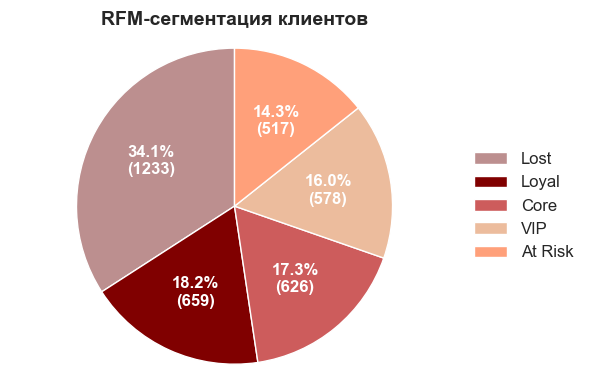

In [174]:
rfm_counts = rfm_data['Сегмент'].value_counts().reset_index()
rfm_counts.columns = ['Сегмент', 'Clients_cnt']
rfm_counts['Share_%'] = (rfm_counts['Clients_cnt'] / rfm_counts['Clients_cnt'].sum() * 100).round(1)

colors = ['#BC8F8F', '#800000', '#CD5C5C', '#ECBC9D', '#FFA07A'] 

fig, ax = plt.subplots(figsize=(6, 4))
wedges, texts, autotexts = ax.pie(
    rfm_counts['Clients_cnt'],
    labels=rfm_counts['Сегмент'],
    colors=colors[:len(rfm_counts)],
    autopct=lambda p: f'{p:.1f}%\n({int(p*rfm_counts["Clients_cnt"].sum()/100)})',
    startangle=90,
    textprops={'color': 'white', 'fontsize': 12, 'fontweight': 'bold'}
)

ax.set_title('RFM-сегментация клиентов', fontsize=14, fontweight='bold')
ax.axis('equal')

ax.legend(
    rfm_counts['Сегмент'],
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=12,
    frameon=False
)

plt.tight_layout()
plt.show()

#### Выводы по графику RFM-сегментации клиентов:
- в целом, сегменты распределены примерно поровну, большая часть клиентов стабильна и заинтересована в банковских продуктах
- наименее популярный сегмент - 'At Risk', что хорошо, поскольку небольшое количество клиентов подвержены оттоку
- большинство клиентов сконцентрированы в сегменте 'Lost', что, на самом деле, не очень хорошо, и требует более глубокого анализа и работы с данной категорией клиентов, чтобы выяснить причину снижения их активности и попытаться ее восстановить

### Профилирование клиентов
Составим аналогичные профили клиентов по сегментам и сформулируем выводы по работе с каждым сегментом.

In [190]:
def generate_rfm_profile(row):
    text = f"Сегмент {row['Сегмент']}\n"
    text += f"Средняя давность последнего кредита (Recency): {row['Recency']:.1f} месяцев\n"
    text += f"Среднее количество кредитов (Frequency): {row['Frequency']:.1f}\n"
    text += f"Средняя сумма последнего платежа (Monetary): {row['Monetary']:.1f} тысяч руб\n"
    text += f"Количество клиентов в сегменте: {row['Количество клиентов']}\n"
    
    # Краткий вывод по сегменту
    if row['Сегмент'] == 'VIP':
        text += "Лучшие клиенты: часто берут кредиты, вносят большие платежи. Основная цель — удержание и стимулирование.\n"
    elif row['Сегмент'] == 'Loyal':
        text += "Хорошие постоянные клиенты: стабильные и прибыльные. Необходимо поддерживать и поощрять их активность.\n"
    elif row['Сегмент'] == 'Core':
        text += "Основная клиентская база: средние показатели, требуется удержание и стимулирование к большим платежам/новым кредитам.\n"
    elif row['Сегмент'] == 'At Risk':
        text += "Клиенты с признаками возможного оттока: активность снижается, требуется анализ причин спада и попытка вернуть клиентов.\n"
    elif row['Сегмент'] == 'Lost':
        text += "Потерянные клиенты: давно не брали кредиты, минимальные платежи. Привлечение невыгодно.\n"
    
    return text

rfm_summary['description'] = rfm_summary.apply(generate_rfm_profile, axis=1)

for desc in rfm_summary['description']:
    print(desc)
    

Сегмент At Risk
Средняя давность последнего кредита (Recency): 22.4 месяцев
Среднее количество кредитов (Frequency): 6.9
Средняя сумма последнего платежа (Monetary): 134.5 тысяч руб
Количество клиентов в сегменте: 518
Клиенты с признаками возможного оттока: активность снижается, требуется анализ причин спада и попытка вернуть клиентов.

Сегмент Core
Средняя давность последнего кредита (Recency): 3.5 месяцев
Среднее количество кредитов (Frequency): 3.5
Средняя сумма последнего платежа (Monetary): 30.3 тысяч руб
Количество клиентов в сегменте: 626
Основная клиентская база: средние показатели, требуется удержание и стимулирование к большим платежам/новым кредитам.

Сегмент Lost
Средняя давность последнего кредита (Recency): 23.8 месяцев
Среднее количество кредитов (Frequency): 2.8
Средняя сумма последнего платежа (Monetary): 36.9 тысяч руб
Количество клиентов в сегменте: 1234
Потерянные клиенты: давно не брали кредиты, минимальные платежи. Привлечение невыгодно.

Сегмент Loyal
Средняя дав

### Сегментация на основе метода 'Кластеризация без учителя'
**Цель:** найти естественные группы клиентов на основе числовых и бинарных признаков.

**Признаки для кластеризации:**
- age
- DTI
- all_credits
- sum_of_paym_months
- Active_to_All_prc 
- avg_num_delay
- if_zalog
- INSURANCE_FLAG

**План действий:**
- масштабировать числовые признаки с помощью StandardScaler
- определить количество кластеров
- провести кластеризацию и добавить метку к каждому клиенту
- проанализировать средние характеристики каждого кластера и их риск

### Нормализация значений

In [198]:
from sklearn.preprocessing import StandardScaler

columns = ['age', 'DTI', 'all_credits', 'sum_of_paym_months', 
            'Active_to_All_prc', 'avg_num_delay', 'if_zalog', 'INSURANCE_FLAG']

X = df_clean[columns].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Использование метода локтя
Будем использовать несколько методов, чтобы максимально точно определить оптимальное количество кластеров.

Начнем с метода локтя. Визуально точка излома на графике находится на значении 9 кластеров - дальше снижение искажения становится почти линейным.

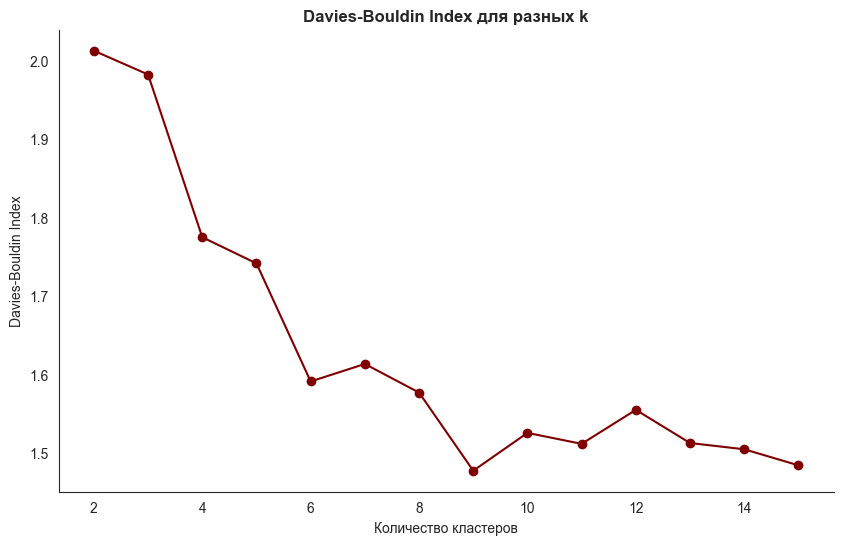

In [219]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

results_db_kmeans = {}
for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, max_iter=500, n_init=20, random_state=7)
    labels = kmeans.fit_predict(X_scaled)
    results_db_kmeans[i] = davies_bouldin_score(X_scaled, labels)

plt.figure(figsize=(10, 6))
plt.plot(list(results_db_kmeans.keys()), list(results_db_kmeans.values()), marker='o', color='#800000')
plt.xlabel('Количество кластеров')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index для разных k', fontweight='bold')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Индекс Дэвиса-Булдина
Этот индекс показывает плотность и разделимость кластеров. Он определяется как отношение между рассеянием кластеров и разделением кластеров, где более низкое значение означает, что кластеризация лучше.

На графике видно, что график достигает минимума в точке 9.

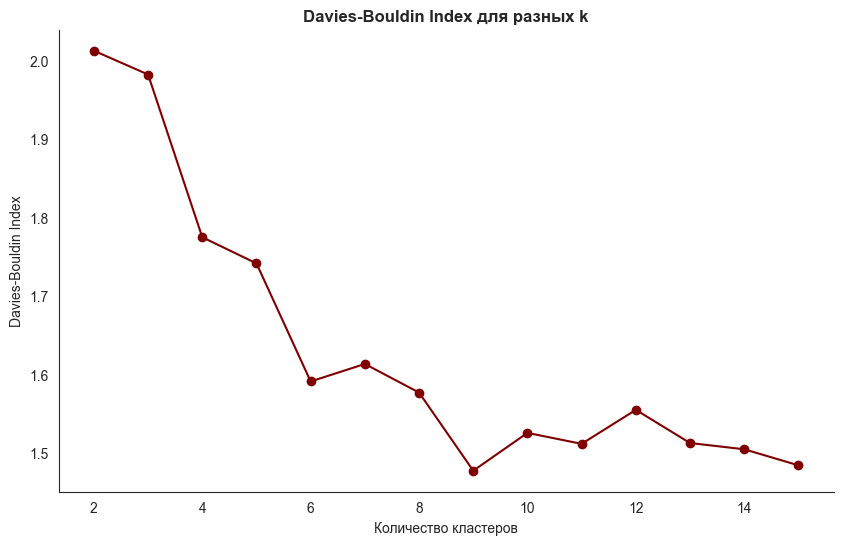

In [218]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

results_db_kmeans = {}
for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, max_iter=500, n_init=20, random_state=7)
    labels = kmeans.fit_predict(X_scaled)
    results_db_kmeans[i] = davies_bouldin_score(X_scaled, labels)

plt.figure(figsize=(10, 6))
plt.plot(list(results_db_kmeans.keys()), list(results_db_kmeans.values()), marker='o', color='#800000')
plt.xlabel('Количество кластеров')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index для разных k', fontweight='bold')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Силуэт
Показывает, насколько хорошо распределена каждая отдельная точка, то есть насколько каждый объект похож на свой кластер и отличается от других.

Классификация значений коэффициента:
- `1` - хорошо (точка правильно назначена и может быть интерпретирована как принадлежащая к соответствующему кластеру)
- `0` - нейтрально (прямо в точке перегиба между двумя кластерами)
- `-1` - объекты плохо классифицированы (лучше назначить его другому кластер)

Выбираем k с максимальным силуэтом - в точке 7. 

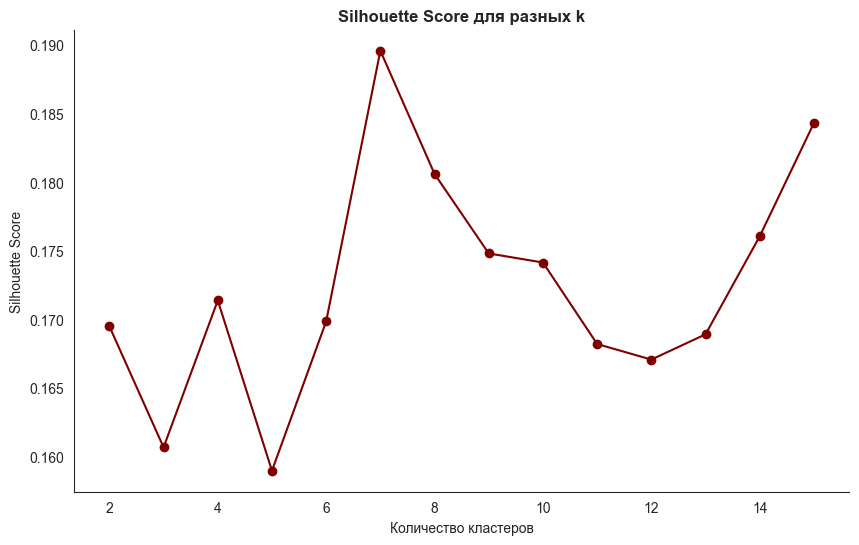

In [217]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

results_sil_kmeans = {}
for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, max_iter=500, n_init=20, random_state=7)
    labels = kmeans.fit_predict(X_scaled)
    results_sil_kmeans[i] = silhouette_score(X_scaled, labels)

plt.figure(figsize=(10, 6))
plt.plot(list(results_sil_kmeans.keys()), list(results_sil_kmeans.values()), marker='o', color='#800000')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score для разных k', fontweight='bold')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Индекс Калински-Харабаша
Индекс измеряет отношение дисперсии между кластерами к дисперсии внутри.
Чем выше индекс, тем лучше разделены кластеры и тем лучше производительность (кластеры плотные и хорошо разделены). 

Исходя из графика, индекс CH постепенно снижается, поэтому чем меньше значение, тем оптимальнее количество кластеров. Крутой изгиб на графике дает значение 6.

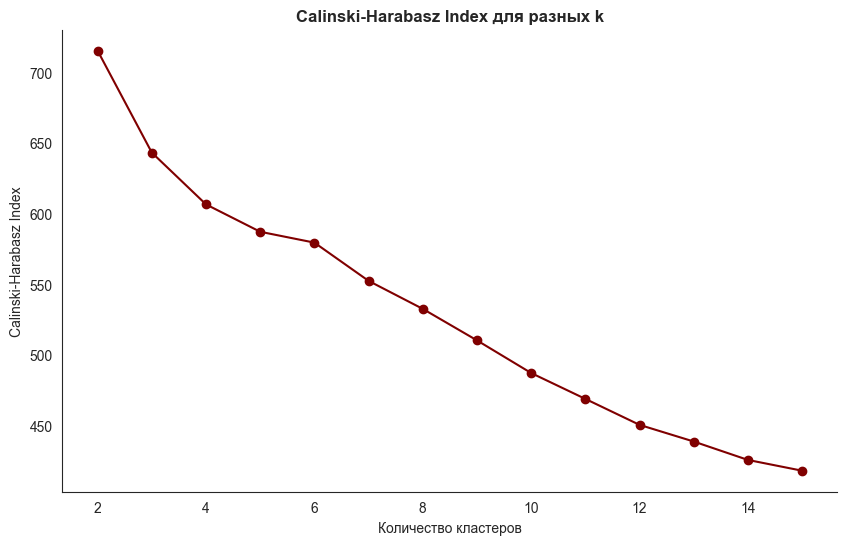

In [216]:
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

results_ch_kmeans = {}
for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, max_iter=500, n_init=20, random_state=7)
    labels = kmeans.fit_predict(X_scaled)
    results_ch_kmeans[i] = calinski_harabasz_score(X_scaled, labels)

plt.figure(figsize=(10, 6))
plt.plot(list(results_ch_kmeans.keys()), list(results_ch_kmeans.values()), marker='o', color='#800000')
plt.xlabel('Количество кластеров')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index для разных k', fontweight='bold')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Определение оптимального количества кластеров
Получившиеся по рассмотренным методам немного разнятся между собой, но все же находятся в пределах от 6 до 9. В качестве оптимального количества кластеров было выбрано значение 7, так как это хороший компромисс между плотностью, разделимостью и качеством кластеризации.

In [220]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Признаки для кластеризации
features = [
    'age', 'DTI', 'all_credits', 'sum_of_paym_months',
    'Active_to_All_prc', 'avg_num_delay', 'if_zalog', 'INSURANCE_FLAG'
]

X = df_clean[features]

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA и SVD
Y_pca = PCA(n_components=3).fit_transform(X_scaled)
Y_svd = TruncatedSVD(n_components=3).fit_transform(X_scaled)

# KMeans
K = 7
kmeanModel = KMeans(n_clusters=K, random_state=42, n_init=20, max_iter=500)
labels = kmeanModel.fit_predict(X_scaled)

np.random.seed(21)
colors = np.sqrt(np.random.randint(0, 255, size=(K, 3)) / 255)
c_arr = np.array([colors[label] for label in labels])

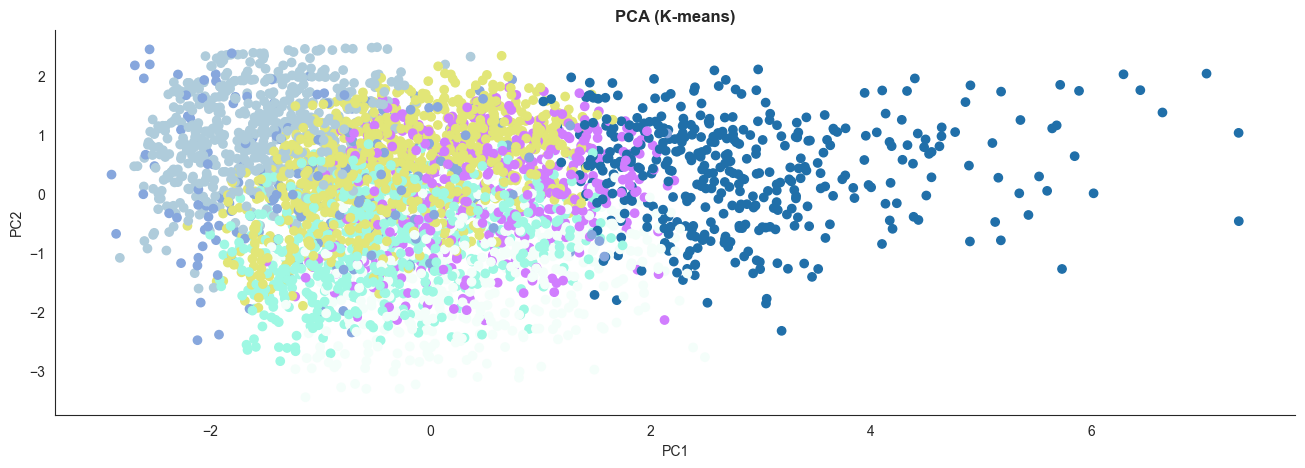

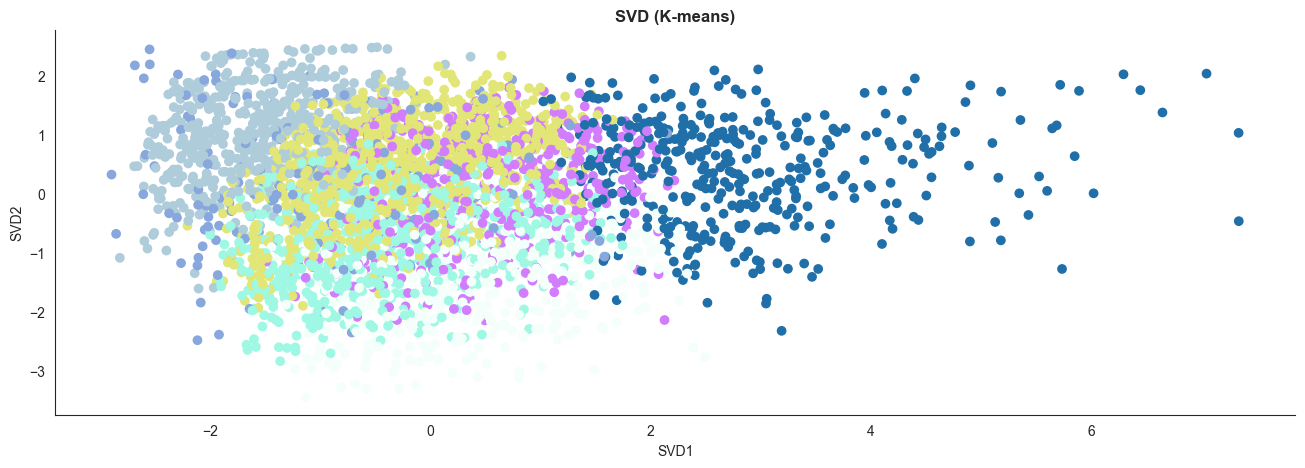

In [222]:
# График PCA
plt.figure(figsize=(16,5))
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr)
plt.title('PCA (K-means)', fontweight='bold')
plt.xlabel('PC1')
plt.ylabel('PC2')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# График SVD
plt.figure(figsize=(16,5))
plt.scatter(Y_svd[:, 0], Y_svd[:, 1], c=c_arr)
plt.title('SVD (K-means)', fontweight='bold')
plt.xlabel('SVD1')
plt.ylabel('SVD2')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Метрики кластеризации
- `Silhouette Score`
Значение от -1 до 1, где ближе к 1 означает, что объекты хорошо сгруппированы внутри своих кластеров, а кластеры хорошо разделены.

**0.19** - относительно низкий показатель, который свидетельствует о том, что кластеры сильно перекрываются, и между ними нет четкого разделения.


- `Davies-Bouldin Index`
Чем меньше значение, тем лучше, так как это указывает на то, что кластеры компактные и хорошо разделены.

 **1.614** - среднее значение: кластеры относительно разделены, но не идеально.


- `Calinski-Harabasz Index`
Чем больше значение, тем лучше: высокое значение говорит о том, что кластеры компактные и хорошо отделены друг от друга.

**552** - неплохой результат, подтверждает, что кластеризация имеет определенную структуру.

In [206]:
print(f'Silhouette Score (n={K}): {silhouette_score(X_scaled, labels):.3f}')
print(f'Davies-Bouldin Index (n={K}): {davies_bouldin_score(X_scaled, labels):.3f}')
print(f'Calinski-Harabasz Index (n={K}): {calinski_harabasz_score(X_scaled, labels):.3f}')

Silhouette Score (n=7): 0.190
Davies-Bouldin Index (n=7): 1.614
Calinski-Harabasz Index (n=7): 552.521


### Профилирование клиентов
Аналогично составим профили клиентов по выбранным показателям.

In [207]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

columns = ['age', 'DTI', 'all_credits', 'sum_of_paym_months',
            'Active_to_All_prc', 'avg_num_delay', 'if_zalog', 'INSURANCE_FLAG']

X = df_clean[columns]

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans
kmeans = KMeans(n_clusters=7, random_state=42, n_init=20, max_iter=500)
cluster_labels = kmeans.fit_predict(X_scaled)

df_clean['Cluster'] = cluster_labels + 1  

# Создаем сводную таблицу с медианными значениями по кластеру
cluster_profiles = df_clean.groupby('Cluster')[columns].median().reset_index()

# Считаем количество клиентов в каждом кластере
cluster_counts = df_clean['Cluster'].value_counts().sort_index()
cluster_profiles['Количество клиентов'] = cluster_counts.values

In [209]:
def generate_cluster_profile(row):
    text = f"Кластер №{int(row['Cluster'])}\n" 
    for col in columns:
        val = row[col]
        if isinstance(val, float):
            text += f"{col}: {val:.1f}\n"
        else:
            text += f"{col}: {val}\n"
    text += f"Количество клиентов: {row['Количество клиентов']}\n"
    return text

cluster_profiles['Описание'] = cluster_profiles.apply(generate_cluster_profile, axis=1)

for desc in cluster_profiles['Описание']:
    print(desc)

Кластер №1
age: 35.0
DTI: 0.4
all_credits: 5.0
sum_of_paym_months: 64.0
Active_to_All_prc: 0.3
avg_num_delay: 0.0
if_zalog: 0.0
INSURANCE_FLAG: 1.0
Количество клиентов: 932

Кластер №2
age: 39.0
DTI: 0.5
all_credits: 13.0
sum_of_paym_months: 206.0
Active_to_All_prc: 0.3
avg_num_delay: 0.0
if_zalog: 0.0
INSURANCE_FLAG: 1.0
Количество клиентов: 401

Кластер №3
age: 30.0
DTI: 0.4
all_credits: 2.0
sum_of_paym_months: 24.0
Active_to_All_prc: 1.0
avg_num_delay: 0.0
if_zalog: 0.0
INSURANCE_FLAG: 1.0
Количество клиентов: 524

Кластер №4
age: 32.0
DTI: 0.4
all_credits: 5.0
sum_of_paym_months: 60.0
Active_to_All_prc: 0.3
avg_num_delay: 0.0
if_zalog: 0.0
INSURANCE_FLAG: 0.0
Количество клиентов: 655

Кластер №5
age: 31.0
DTI: 0.4
all_credits: 4.0
sum_of_paym_months: 37.0
Active_to_All_prc: 0.4
avg_num_delay: 0.4
if_zalog: 0.0
INSURANCE_FLAG: 1.0
Количество клиентов: 183

Кластер №6
age: 36.0
DTI: 0.4
all_credits: 6.0
sum_of_paym_months: 80.0
Active_to_All_prc: 0.4
avg_num_delay: 0.0
if_zalog: 1.0
